# MGSC 404 Foundations of Decision Analytics

# Final Project Worksheet

## Team 1

## Team Members: Carol Shen, Vittoria Vecchioli, Iris Huang, Biyan Fan, Andrew Debay, Abhinav Mamidi

# 1. Introduction

Car2go is the largest car sharing company in the world with over 4 million registered members and a fleet of over 20,000 vehicles in 31 cities across North America and Europe. However, due to the high level of complexity arising from traffic conditions and demand fluctuations happening throughout the company’s daily operations, not all cities’ services are efficient or profitable. 

It is early July 2014 and the CEO of car2go, Juan Serpa, is sitting at his desk reflecting on another year for the EV sharing program. He has been experiencing difficulties in making accurate decisions about how to satisfy the daily demand of EVs in terms of what’s the optimal numbers of EVs to reposition every time after using by the customers. Furthermore, he’s also confused about the optimal number of charging stations to place and where to place them to serve more customers efficiently. 
As a result, Juan decided to hire a team of data scientists, who were experts in optimization and Python, to help him solve the strategic and operational challenges that car2go faces. In particular, they will be figuring out how to allocate the EVs to meet the demand and where to place charging stations to ensure all cars out of electricity can quickly be brought back to service while maintaining the lowest level of labor and transportation costs and reaching the maximum level of profit. 

Through forming 2 models in the later sections, our optimal solution for car2go without taking the issue of charging stations into account is 160,261,141.6 dollars, whereas the model with charging station generates an optimal profit of 106,901,510.1 dollars. Furthermore, several sensitivity analysis will be taken in order to analyze ways of improving the efficiency of company operations on different aspects.


# 2. Preliminary Data Analysis

In [1]:
from gurobipy import *
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import seaborn
import datetime
import pandas as pd
import seaborn.apionly as sns

/Users/carol_lav/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/carol_lav/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/carol_lav/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/carol_lav/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/carol_lav/opt/anaconda3/lib/python3.7/_collections_ab

## Datasets

In [2]:
# use pandas
trips = pd.read_csv("EVtripsInformation.csv")
trips

,car,Total_TravelTime,time_gap,ozip,dzip,origin,origin_address,origin_longitude,origin_latitude,destination,destination_address,destination_longitude,destination_latitude,origin_time,destination_time,origin_hr,dest_hr,SD_hr,travel.times
0,6NE H639,0.000000,40.134100,92102,92102,"[-117.14348,32.7168,0]","C St 2258, 92102 San Diego",-117.14348,32.71680,"[-117.14348,32.71683,0]","C St 2258, 92102 San Diego",-117.14348,32.71683,2014-03-27 5:55,2014-03-27 6:35,5.0,6.0,13.0,40.134100
1,6NE H639,0.004991,35.114433,92116,92116,"[-117.14639,32.76152,0]","Park Blvd 4628, 92116 San Diego",-117.14639,32.76152,"[-117.14636,32.76149,0]","Park Blvd 4626, 92116 San Diego",-117.14636,32.76149,2014-03-11 7:10,2014-03-11 7:46,7.0,7.0,15.0,35.114433
2,6NE H639,0.750497,10.061783,92110,92110,"[-117.20891,32.74301,0]","Barnett Ave 2946, 92110 San Diego",-117.20891,32.74301,"[-117.20968,32.74364,0]","Cadiz St 2719, 92110 San Diego",-117.20968,32.74364,2014-03-17 0:12,2014-03-17 0:23,0.0,0.0,8.0,10.061783
3,6NE H639,1.134267,30.116533,92101,92101,"[-117.16418,32.71254,0]","W G St 146, 92101 San Diego",-117.16418,32.71254,"[-117.16282,32.71494,0]",Broadway Cir at Horton Plaza,-117.16282,32.71494,2014-03-25 22:18,2014-03-25 22:48,22.0,22.0,6.0,30.116533
4,6NE H639,1.356214,15.050433,92106,92106,"[-117.21876,32.72785,0]","Laning Rd 2601, 92106 San Diego",-117.21876,32.72785,"[-117.21785,32.73316,0]","Decatur Rd 2216, 92106 San Diego",-117.21785,32.73316,2014-03-21 8:42,2014-03-21 8:57,8.0,8.0,16.0,15.050433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25868,7CU X127,8.895591,647.436517,92107,92106,"[-117.25049,32.74659,0]","Newport Ave 4970, 92107 San Diego",-117.25049,32.74659,"[-117.21211,32.7391,0]","Decatur Rd 2756, 92106 San Diego",-117.21211,32.73910,2014-03-23 21:26,2014-03-24 8:14,21.0,8.0,5.0,647.436517
25869,7CU X127,8.988795,25.088650,92101,92116,"[-117.15747,32.71315,0]","8th Ave 750, 92101 San Diego",-117.15747,32.71315,"[-117.1343,32.76284,0]","Adams Ave 2764, 92116 San Diego",-117.13430,32.76284,2014-03-22 2:57,2014-03-22 3:22,2.0,3.0,10.0,25.088650
25870,7CU X127,9.011944,25.081667,92101,92101,"[-117.21118,32.7244,0]","Harbor Island Dr 2075, 92101 San Diego",-117.21118,32.72440,"[-117.16107,32.7134,0]","4th Ave 778, 92101 San Diego",-117.16107,32.71340,2014-03-28 6:50,2014-03-28 7:15,6.0,7.0,14.0,25.081667
25871,7CU X127,9.028744,531.863800,92103,92106,"[-117.14619,32.75317,0]","Park Blvd 4151, 92103 San Diego",-117.14619,32.75317,"[-117.21595,32.7382,0]","Roosevelt Rd, 92106 San Diego",-117.21595,32.73820,2014-03-25 5:54,2014-03-25 14:46,5.0,14.0,13.0,531.863800


### Descriptive Statistics

In [3]:
# Basic statistics for each column
trips.describe()

,Total_TravelTime,time_gap,ozip,dzip,origin_longitude,origin_latitude,destination_longitude,destination_latitude,origin_hr,dest_hr,SD_hr,travel.times
count,25873.000000,25873.000000,25873.000000,25873.000000,25873.000000,25873.000000,25873.000000,25873.000000,25814.000000,25818.000000,25814.000000,25873.000000
mean,6.196243,74.735015,92102.656515,92102.585127,-117.168578,32.740013,-117.168835,32.739987,9.077090,8.845999,12.950957,74.735015
std,3.732285,185.005595,20.902349,21.205559,0.040594,0.027073,0.040665,0.027188,6.698447,6.405806,5.271963,185.005595
min,0.000000,5.008300,91910.000000,91910.000000,-117.263730,32.594680,-117.263730,32.594530,0.000000,0.000000,0.000000,5.008300
25%,3.323871,15.091933,92101.000000,92101.000000,-117.178880,32.718250,-117.179670,32.718230,4.000000,4.000000,9.000000,15.091933
50%,5.769067,25.100667,92103.000000,92103.000000,-117.160590,32.741440,-117.160720,32.741420,8.000000,8.000000,13.000000,25.100667
75%,8.525029,40.150667,92108.000000,92108.000000,-117.146220,32.754460,-117.146380,32.754380,12.000000,12.000000,17.000000,40.150667
max,23.093854,1435.487017,92123.000000,92123.000000,-117.037610,32.812200,-117.037320,32.812200,23.000000,23.000000,23.000000,1435.487017


key findings:

In [4]:
# Distinct Zip Codes
# we append the new zipcode to our zipcode array
zipcode = trips.ozip.unique()
zipcode = np.append(zipcode, 92114)
zipcode


array([92102, 92116, 92110, 92101, 92106, 92103, 92104, 92107, 92105,
       92108, 92109, 92115, 91911, 91910, 92111, 92120, 92113, 92123,
       92114])

In [5]:
# total number of EVs
car = trips.car.unique()
total_EV = len(car)
total_EV

379

In [6]:
# time span
# from 2014-03-06 to 2014-04-01
trips.sort_values(by='origin_time')

,car,Total_TravelTime,time_gap,ozip,dzip,origin,origin_address,origin_longitude,origin_latitude,destination,destination_address,destination_longitude,destination_latitude,origin_time,destination_time,origin_hr,dest_hr,SD_hr,travel.times
12943,6UK C967,13.474164,40.161367,92109,92101,"[-117.23963,32.79245,0]","Promontory St 4018, 92109 San Diego",-117.23963,32.79245,"[-117.13512,32.73664,0]","Pershing Dr, 92101 San Diego",-117.13512,32.73664,2014-03-06 20:46,2014-03-06 21:26,20.0,21.0,4.0,40.161367
3649,6RF N745,7.313869,15.059833,92106,92110,"[-117.22709,32.72849,0]","Keats St 3079, 92106 San Diego",-117.22709,32.72849,"[-117.18938,32.74375,0]","Wright St, 92110 San Diego",-117.18938,32.74375,2014-03-06 20:46,2014-03-06 21:01,20.0,21.0,4.0,15.059833
23438,6UK F977,8.449827,35.141533,92102,92103,"[-117.1321,32.72612,0]","29th St 1956, 92102 San Diego",-117.13210,32.72612,"[-117.15943,32.74719,0]","6th Ave 3819, 92103 San Diego",-117.15943,32.74719,2014-03-06 20:56,2014-03-06 21:31,20.0,21.0,4.0,35.141533
10682,6UK C935,3.348989,15.060433,92102,92101,"[-117.14039,32.71544,0]","25th St 962, 92102 San Diego",-117.14039,32.71544,"[-117.1602,32.7123,0]","5th Ave 672, 92101 San Diego",-117.16020,32.71230,2014-03-06 20:56,2014-03-06 21:11,20.0,21.0,4.0,15.060433
931,6RF N701,5.175357,90.371150,92101,92110,"[-117.16389,32.7278,0]","1st Ave 2160, 92101 San Diego",-117.16389,32.72780,"[-117.19782,32.75337,0]","Congress St 2725, 92110 San Diego",-117.19782,32.75337,2014-03-06 21:01,2014-03-06 22:31,21.0,22.0,5.0,90.371150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12780,6UK C965,12.287828,25.064317,92104,92101,"[-117.12532,32.72683,0]","32nd St 2031, 92104 San Diego",-117.12532,32.72683,"[-117.20458,32.72889,0]","Spanish Lndg, 92101 San Diego",-117.20458,32.72889,2014-04-01 9:50,2014-04-01 10:15,9.0,10.0,17.0,25.064317
21827,6UK F953,14.485337,60.181333,92109,92104,"[-117.23551,32.80295,0]","Emerald St 1918, 92109 San Diego",-117.23551,32.80295,"[-117.13151,32.75679,0]","Kansas St 4374, 92104 San Diego",-117.13151,32.75679,2014-04-01 9:50,2014-04-01 10:50,9.0,10.0,17.0,60.181333
24240,6UK F993,5.408077,15.033000,92101,92101,"[-117.16034,32.73088,0]","5th Ave 2448, 92101 San Diego",-117.16034,32.73088,"[-117.16658,32.71292,0]","State St 736, 92101 San Diego",-117.16658,32.71292,2014-04-01 9:50,2014-04-01 10:05,9.0,10.0,17.0,15.033000
12853,6UK C966,2.221792,20.054783,92116,92116,"[-117.14254,32.76209,0]","Alabama St 4663, 92116 San Diego",-117.14254,32.76209,"[-117.13025,32.76211,0]","30th St 4658, 92116 San Diego",-117.13025,32.76211,2014-04-01 9:55,2014-04-01 10:15,9.0,10.0,17.0,20.054783


In [7]:
# divide one day into 6 periods
# assign starting rental hour into these periods
# into a new column time_period
conditions = [
    (trips['SD_hr'] >= 0) & (trips['SD_hr'] <= 3),
    (trips['SD_hr'] >= 4) & (trips['SD_hr'] <= 7),
    (trips['SD_hr'] >= 8) & (trips['SD_hr'] <= 11),
    (trips['SD_hr'] >= 12) & (trips['SD_hr'] <= 15),
    (trips['SD_hr'] >= 16) & (trips['SD_hr'] <= 19),
    (trips['SD_hr'] >= 20) & (trips['SD_hr'] <= 23) ]
choices = ['0am-4am', '4am-8am', '8am-12pm', '12pm-16pm', '16pm-20pm', '20pm-0am']
trips['time_period'] = np.select(conditions, choices)

In [68]:
# count the number of trips from one location to another for every hour in a day
# which is the demand for each period
trips['demand_period'] = trips.groupby(['ozip','dzip','time_period'])['travel.times'].transform('count')
trips.groupby('time_period')['demand_period'].mean()

# table of time period demand
trips_vs = {'Time Period':['0am-4am','4am-8am','8am-12pm','12pm-16pm','16pm-20pm','20pm-0am'],
            'Demand': [26.013472,156.458105,335.055262,297.551724,190.143992,94.129624]}
trips_vs = pd.DataFrame(trips_vs)
trips_vs

,Time Period,Demand
0,0am-4am,26.013472
1,4am-8am,156.458105
2,8am-12pm,335.055262
3,12pm-16pm,297.551724
4,16pm-20pm,190.143992
5,20pm-0am,94.129624


In [8]:
# average travel time of each hour in a day
travel_time = trips.groupby(['SD_hr'])['travel.times'].mean()

In [9]:
# count the number of trips from one location to another in a day
# which is the demand for each origin-destination pair
zipcode_freq = trips.groupby(['ozip','dzip'], as_index=False)['travel.times'].count()

### Unusual Observations

In [10]:
# Null values exists under origin_hr, dest_hr, and SD_hr
trips[pd.isnull(trips['SD_hr'])]

,car,Total_TravelTime,time_gap,ozip,dzip,origin,origin_address,origin_longitude,origin_latitude,destination,destination_address,destination_longitude,destination_latitude,origin_time,destination_time,origin_hr,dest_hr,SD_hr,travel.times,time_period
426,6NE H644,6.359877,30.123383,92110,92103,"[-117.20351,32.74454,0]","Tuscaloosa St 2641, 92110 San Diego",-117.20351,32.74454,"[-117.15961,32.74591,0]","6th Ave 3744, 92103 San Diego",-117.15961,32.74591,2014-03-09 2:59,2014-03-09 3:29,NaN,3.0,NaN,30.123383,0
755,6NE H649,12.052508,30.124983,92101,92109,"[-117.15046,32.71432,0]","15th St 860, 92101 San Diego",-117.15046,32.71432,"[-117.25129,32.76612,0]","Devon Ct 783, 92109 San Diego",-117.25129,32.76612,2014-03-09 2:04,2014-03-09 2:34,NaN,NaN,NaN,30.124983,0
934,6RF N701,5.373050,35.144000,92101,92103,"[-117.1618,32.71993,0]","Ash St 320, 92101 San Diego",-117.16180,32.71993,"[-117.16158,32.74751,0]","4th Ave 3840, 92103 San Diego",-117.16158,32.74751,2014-03-09 2:54,2014-03-09 3:29,NaN,3.0,NaN,35.144000,0
982,6RF N702,3.574096,15.062050,92101,92101,"[-117.16917,32.72179,0]","Kettner Blvd 1582, 92101 San Diego",-117.16917,32.72179,"[-117.16561,32.71317,0]","Union St 756, 92101 San Diego",-117.16561,32.71317,2014-03-09 2:34,2014-03-09 2:49,NaN,NaN,NaN,15.062050,0
1023,6RF N703,11.282800,25.103317,92109,92101,"[-117.25198,32.77485,0]","Mission Blvd 3328, 92109 San Diego",-117.25198,32.77485,"[-117.15658,32.71544,0]","9th Ave 970, 92101 San Diego",-117.15658,32.71544,2014-03-09 2:54,2014-03-09 3:19,NaN,3.0,NaN,25.103317,0
1133,6RF N704,9.929010,20.082467,92103,92107,"[-117.16925,32.74432,0]","Torrance St 626, 92103 San Diego",-117.16925,32.74432,"[-117.24902,32.74616,0]","Cable St 1918, 92107 San Diego",-117.24902,32.74616,2014-03-09 2:29,2014-03-09 2:49,NaN,NaN,NaN,20.082467,0
3406,6RF N740,5.523782,35.145783,92108,92108,"[-117.15191,32.77768,0]","Mission Valley Rd, 92108 San Diego",-117.15191,32.77768,"[-117.14396,32.77053,0]","Camino del Este 2015, 92108 San Diego",-117.14396,32.77053,2014-03-09 2:14,2014-03-09 2:49,NaN,NaN,NaN,35.145783,0
4572,6RF N760,3.502200,15.060650,92101,92101,"[-117.16848,32.72092,0]","W Beech St 620, 92101 San Diego",-117.16848,32.72092,"[-117.16653,32.71356,0]","State St 800, 92101 San Diego",-117.16653,32.71356,2014-03-09 2:39,2014-03-09 2:54,NaN,NaN,NaN,15.060650,0
5048,6RF N767,6.177950,45.185433,92109,92110,"[-117.23709,32.78766,0]","Ingraham St 3727, 92109 San Diego",-117.23709,32.78766,"[-117.20934,32.75459,0]","Kurtz St 3459, 92110 San Diego",-117.20934,32.75459,2014-03-09 2:34,2014-03-09 3:19,NaN,3.0,NaN,45.185433,0
5635,6RF N780,7.399273,25.102550,92106,92101,"[-117.22715,32.73037,0]","Macaulay St 3188, 92106 San Diego",-117.22715,32.73037,"[-117.16987,32.7272,0]","India St 2180, 92101 San Diego",-117.16987,32.72720,2014-03-09 2:24,2014-03-09 2:49,NaN,NaN,NaN,25.102550,0


## Outliers

In [71]:
# outlier detection
def outliers_iqr(total_travel_time):
    quartile_1, quartile_3 = np.percentile(total_travel_time, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((total_travel_time > upper_bound) | (ys < lower_bound))

#outliers:travel times
dataset = trips['travel.times']

outliers = [ ]
def detect_outliers (data):

    threshold = 3
    mean = np.mean (data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs (z_score) > threshold:
            outliers.append(i)
    return outliers

outlier_pt = detect_outliers(dataset)
make_array(outlier_pt)

array([[1059.153083 , 1103.776917 ,  737.82095  ,  969.0360333,
        1340.26045  ,  697.5282833, 1089.220817 ,  808.2429167,
        1299.479217 ,  697.3483833,  848.28965  , 1290.291333 ,
        1250.16195  ,  727.48115  ,  672.6014333, 1315.084133 ,
         707.5850167, 1059.496617 ,  868.0865667,  642.53575  ,
        1239.282417 ,  883.2328   , 1124.476767 ,  637.2849   ,
        1164.7312   ,  637.2309833,  647.1829833,  808.179    ,
         632.1219167,  782.8769333, 1335.123733 ,  802.8038667,
        1059.371383 , 1234.262767 , 1008.979733 ,  697.48745  ,
         793.2772667,  687.631    ,  963.2610167, 1083.813033 ,
         722.6485167,  928.53295  ,  737.9820667, 1139.730217 ,
        1058.574767 , 1023.907933 , 1239.826    ,  737.5096667,
         853.1991   ,  722.9269   , 1314.991883 ,  808.3413167,
         878.0496167, 1229.674133 , 1209.125367 ,  702.8001   ,
         753.0989   ,  868.0569333, 1184.258717 , 1249.9495   ,
        1014.022633 ,  667.7833667,  722

In [70]:
len(outlier_pt)

893

## Visualization of Data

### Temporal Asymmetry of trip demands

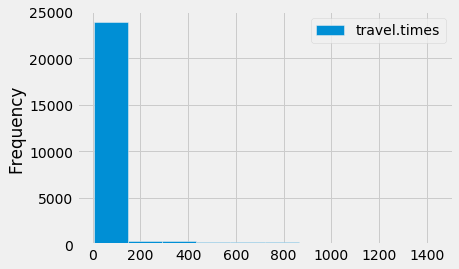

In [11]:
# by research, there are some people rent car2go by day
# travel times can be large
# distribution of travel times
trips[['travel.times']].plot.hist()

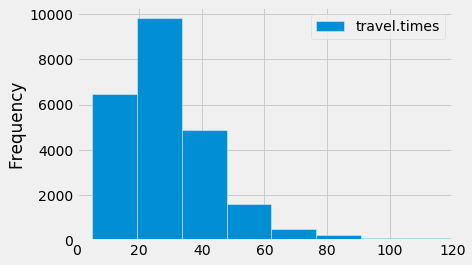

In [12]:
# zoom in the distribution of travel times
trips[['travel.times']].plot.hist(bins=100, xlim=(0,120))

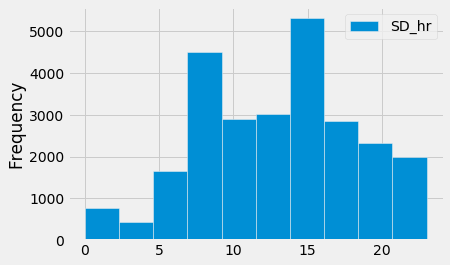

In [13]:
# demand for each hour
trips[['SD_hr']].plot(kind='hist')

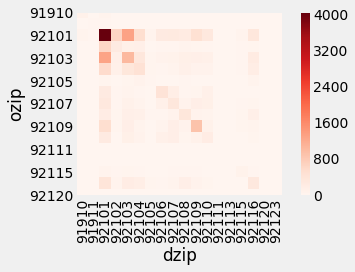

In [61]:
# density of demand for each origin-destination pair
piv = pd.pivot_table(zipcode_freq, values="travel.times",index=["ozip"], columns=["dzip"], fill_value=0)
# plot pivot table as heatmap using seaborn
ax = sns.heatmap(piv, square=True, cmap="Reds")
plots.setp(ax.xaxis.get_majorticklabels(), rotation=90 )
plots.tight_layout()
plots.show()

### Spatial Asymmetry of trip demands

In [62]:
# Count the trips in each zip code
# Combine two tables
trips_v = Table.read_table("EVtripsInformation.csv")
trips_vis = trips_v.select('origin_latitude', 'origin_longitude', 'travel.times','ozip')
zip_count = trips_v.group('ozip')
trips_vis = trips_vis.join('ozip', zip_count, 'ozip')

# Take the average of latitude and longtitude to find the centre of each zip code
# count mean is just the count of trips in each zip code
trips_vis = trips_vis.group('ozip', np.mean)
trips_vis

ozip,origin_latitude mean,origin_longitude mean,travel.times mean,count mean
91910,32.6387,-117.081,69.0711,206
91911,32.6047,-117.074,110.365,83
92101,32.7183,-117.162,77.6643,8685
92102,32.7164,-117.137,79.391,1448
92103,32.7458,-117.161,65.0392,3744
92104,32.7472,-117.131,64.6324,2124
92105,32.7534,-117.109,67.6529,292
92106,32.7304,-117.223,61.3834,1193
92107,32.7463,-117.245,84.822,1410
92108,32.7713,-117.151,79.7763,1319


In [63]:
import folium

In [64]:
traffic_map = folium.Map(location=[32.74, -117.16], zoom_start=12)

for lat, lon, num in zip(trips_vis.column(1), trips_vis.column(2), trips_vis.column(4)):
    folium.CircleMarker(
        [lat, lon],
        color='green',
        radius=float(num/400),
        fill_color='yellow',
        ).add_to(traffic_map)
traffic_map

In [65]:
## Morning demand
from folium.plugins import HeatMap
df = pd.read_csv('EVtripsInformation.csv')
df_copy = df[df.SD_hr<12].copy()
df_copy['count'] = 1
base_map = folium.Map(location=[32.8, -117])
HeatMap(data=df_copy[['origin_latitude', 'origin_longitude', 'count']].groupby(['origin_latitude', 'origin_longitude']).sum().reset_index().values.tolist(), radius=9, max_zoom=13).add_to(base_map)
base_map

In [67]:
## Afternoon demand
from folium.plugins import HeatMap
df = pd.read_csv('EVtripsInformation.csv')
df_copy = df[df.SD_hr>12].copy()
df_copy['count'] = 1
base_map_dep = folium.Map(location=[32.8, -117])
HeatMap(data=df_copy[[ 'destination_latitude','destination_longitude', 'count']].groupby(['destination_latitude','destination_longitude']).sum().reset_index().values.tolist(), radius=9, max_zoom=13).add_to(base_map_dep)
base_map_dep

## Summary of descriptive data insights

#### Histogram (Travel Time & Data Frequency)
Throughout exploring the data, we’ve observed that there are two interchangeable variables, “time_gap” and “travel.times”, therefore we chose to proceed with only “travel.times”. Another interesting aspect is distinguishing between variables  “origin_hr” and “SD_hr”. We’ve made an assumption that since car2go is originated in Germany, “origin_hr” might refer to the German time whereas “SD_hr” is the one that should be used for this case. To confirm the assumption, we’ve created a histogram of both hours and observed a trend of a higher distribution during rush hours (e.g. 7.5am-9pm) in “SD_hr”, thus deciding it being the variable we want to use in particular for car2go analysis in San Diego.

By doing a histogram to investigate the demand for each hour, it can be seen that the peak times of the day are between 7:30 am to 9am and 2pm to 4pm. With that being said, during these two time periods, there’s the highest demands for EVs.

#### Histogram (Travel Time Distribution)
The histogram shows that the most popular travel time with car2go EVs is around 30 minute as the bar shape indicates the highest frequency. Therefore, we suggest the management of car2go to implementing new pricing strategies, such as charging a premium for the “30 minutes usage” customer segment and charge less for customer segments with lower frequency of demand.

#### Outliers
We’ve identified around 900 outliers in variable “travel.times”. The outliers all indicate a time gap above 600 minutes. However, after researching on car2go’s official website, we’ve found packages with 1-3 days of renting length, meaning that it’s possible for a passenger to have a time gap beyond 600 minutes. Moreover, considering the size of our daraset, the outliers don’t demonstrate a meaningful impact for data visualization and model creation.

#### Map
We’ve also observed that areas with the highest demand of car2go’s service on a regular day are around the radius of Civic Center Plaza, households near Robinson Avenue and 4th Avenue, households around the Pacific Beach and the Ocean Beach Drive, and the others spread around Mission Valley, Normal Heights and North Park. This scatter of car2go demand indicates where most of the customer activities are happening and the importance of placing the limited public chargers around these areas. 

The map also demonstrates information about our customer demographics. For example, students and business people living around Civic Center Plaza are the most frequent users for car2go’s EV services, followed by outdoor activity enthusiasts that order the service around Pacific Beach and Ocean Beach Drive. As a result, car2go’s management should implement more marketing strategies cater to these customer demographics around these popular regions.


# 3.1 Linear Program Model 1

## Assumptions

Our model relies on the following assumptions:

1. This model optimizes the yearly accounting profit, which incorporates revenue earned from trips and membership and deducts reposition labour costs, charging cost, and EV maintenance cost.
2. EV sharing system only operates in 18 regions in San Diego as data suggests.
3. We assume all the users are already members and we ignore the new customer membership fee earned every year. And Car2go only charges for the registration fee once.
4. We assume customers can pick up EVs in any region among the 18 (zipcodes) and drop it off in any region among the 18 (zipcodes) without any parking fee charged.
5. We do not consider and parking related costs and issues. We assume customers can park anywhere.
6. The estimates from the data are accurate. When the demand is 0, we don't give any values. However, we use the median travel time estimated from the dataset to replace 0 for reposition duration.
7. The reposition travel time is shorter than the average travel time of customers so we use median travel time and we replace any large travel time with a more realistic value obtained from the data.
8. We can hire as many as wokerss as we want.
9. There is no depreciation of EVs.
10. We assume all the trips satisfied have travel time less than an hour, which does not violate with our constraints.
11. We assume there is no difference of demand everyday, which means trips satisfied are the same for every day in a year.


## Sets

1. $Z =\{0,1,2,3,...,17\}$: Zip code areas
2. $T =\{0,1,2,3,...,23\}$: Hours of the day

## Decision Variables

We define the following decision variables:

1. $R_{ijt}$: number of EVs to move from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
2. $X_{ijt}$: number of trips to satisfy from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
3. $W_{it}$: number of EVs available at zipcode $i\in Z$ at time $t\in T$

## Parameters

1. **avg_demand**: the average demand for EVs to go from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
2. **duration_reposition**: time to reposition EVs from zipcode $i\in Z$ to zipcode $j\in Z$ 
3. **price**: price of using EVs based on the duration of the trip
4. **labour_cost_per_hr**: average wage per hour in San Diego
5. **total_EV**: total number of EVs in San Diego
6. **price_min**: cost of repositioning the car
7. **avg_time**: average travel time in total when no data from one position to another is available

## Objective Function

Maximize profit

number of trips satisfied times the price paid adjusted to average travel times from each i to j at each h
number of repositioning times the average travel times from each i to j at each h then times wage per minute


$$\max_{X,R,W } \tau( \sum_{i\in Z}\sum_{j\in Z}\sum_{t\in T}X_{ijt}\phi_{ijt} - c\sum_{i\in Z}\sum_{j\in Z}\sum_{t\in T}R_{ijt}\lambda_{ijt} ) - mN$$

$\tau = $ days in a year

$\phi_{ijt} = $ revenue received from customers adjusted for travel times 

$\lambda_{ijt} = $ reposition time

$c =$ labour cost per minute

$m =$ maintenance cost of a EV per year

$N =$ total number of EVs/size of the fleet

## Constraints


*1. The total number of EVs moved at time $t$ has to be less than 379:*
$$\sum_{i\in Z}\sum_{j\in Z}R_{ijt} = 379,\quad \forall t\in T$$


*2. The customers' trips satisfied should be less than the demand estimated from the data. The demand boundary is set to have a range of 20% of the demand estimated:*

$$0.7\times avg\_demand_{ijt}\leq X_{ijt}\leq 1.3\times avg\_demand_{ijt},\quad \forall i\in Z \quad \forall j\in Z\quad \forall t\in T$$

*3. The EVs available of this period should be equal to last period's avaiable EV minus the EVs customers 
take from this region, plus drop off to this region, minus the EVs repositioned from this region, and EVs
repositioned to this region:*
$$W_{it} = W_{it-1} - \sum_{j\in Z}X_{ijt} + \sum_{j\in Z}X_{jit} - \sum_{j\in Z}R_{ijt} + \sum_{j\in Z}R_{jit},\quad \forall i\in Z \quad \forall t\in T$$




*For the first model, we are more conservative, so the following one constraint is added:*

*4. The number of EVs available should be larger than the EVs repositioned/moved from this region:*
$$\sum_{i\in Z}\sum_{j\in Z}W_{it} > R_{ijt},\quad \forall t\in T$$


## Parameters calculated from the given data set

### 1. Demand

In [74]:
# estimate demand (count of trips) from each ozip to another in each hour
# in order to loop when modeling, ozip and dzip need to be changed to 0-17
trips_simple = trips.loc[:,['ozip','dzip','SD_hr','travel.times']]

for i in np.arange(18):
    trips_simple.loc[trips_simple['ozip'] == zipcode[i], ['ozip']] = i
    trips_simple.loc[trips_simple['dzip'] == zipcode[i], ['dzip']] = i

trips_simple

,ozip,dzip,SD_hr,travel.times
0,0,0,13.0,40.134100
1,1,1,15.0,35.114433
2,2,2,8.0,10.061783
3,3,3,6.0,30.116533
4,4,4,16.0,15.050433
...,...,...,...,...
25868,7,4,5.0,647.436517
25869,3,1,10.0,25.088650
25870,3,3,14.0,25.081667
25871,5,4,13.0,531.863800


In [75]:
# estimate demand (count of trips) from each ozip to another in each hour using group
demand = trips_simple.groupby(['ozip','dzip','SD_hr'],as_index = False)['travel.times'].count()
demand

,ozip,dzip,SD_hr,travel.times
0,0,0,0.0,7
1,0,0,1.0,10
2,0,0,2.0,6
3,0,0,3.0,7
4,0,0,4.0,7
...,...,...,...,...
2776,16,11,8.0,1
2777,16,11,19.0,1
2778,17,3,13.0,1
2779,17,5,11.0,1


In [76]:
# extract the arrays from the table
ori = demand['ozip'].to_numpy()
dest = demand['dzip'].to_numpy()
hr = demand['SD_hr'].to_numpy()
count = demand['travel.times'].to_numpy()

In [77]:
# store demand in a dictionary for better loop when modeling
avg_demand = {}
for i in np.arange(len(ori)):
    avg_demand[(ori[i],dest[i],hr[i])] = count[i]
avg_demand

{(0, 0, 0.0): 7,
 (0, 0, 1.0): 10,
 (0, 0, 2.0): 6,
 (0, 0, 3.0): 7,
 (0, 0, 4.0): 7,
 (0, 0, 5.0): 1,
 (0, 0, 6.0): 7,
 (0, 0, 7.0): 13,
 (0, 0, 8.0): 12,
 (0, 0, 9.0): 12,
 (0, 0, 10.0): 5,
 (0, 0, 11.0): 13,
 (0, 0, 12.0): 15,
 (0, 0, 13.0): 14,
 (0, 0, 14.0): 11,
 (0, 0, 15.0): 22,
 (0, 0, 16.0): 19,
 (0, 0, 17.0): 16,
 (0, 0, 18.0): 18,
 (0, 0, 19.0): 11,
 (0, 0, 20.0): 14,
 (0, 0, 21.0): 6,
 (0, 0, 22.0): 7,
 (0, 0, 23.0): 8,
 (0, 1, 0.0): 1,
 (0, 1, 1.0): 2,
 (0, 1, 2.0): 1,
 (0, 1, 4.0): 1,
 (0, 1, 7.0): 1,
 (0, 1, 8.0): 3,
 (0, 1, 10.0): 1,
 (0, 1, 11.0): 1,
 (0, 1, 12.0): 1,
 (0, 1, 13.0): 3,
 (0, 1, 14.0): 2,
 (0, 1, 15.0): 2,
 (0, 1, 16.0): 3,
 (0, 1, 17.0): 4,
 (0, 1, 18.0): 10,
 (0, 1, 19.0): 1,
 (0, 1, 20.0): 2,
 (0, 1, 21.0): 4,
 (0, 1, 22.0): 1,
 (0, 1, 23.0): 2,
 (0, 2, 1.0): 1,
 (0, 2, 3.0): 1,
 (0, 2, 5.0): 1,
 (0, 2, 6.0): 8,
 (0, 2, 7.0): 2,
 (0, 2, 12.0): 1,
 (0, 2, 13.0): 1,
 (0, 2, 14.0): 2,
 (0, 2, 15.0): 2,
 (0, 2, 16.0): 2,
 (0, 2, 17.0): 2,
 (0, 2, 18.0): 3

### 2. Travel Cost of Customers (with Travel Time)

In [78]:
# travel time estimate
# average travel time from one position to another position every hour using group
travel_times = trips_simple.groupby(['ozip','dzip','SD_hr'],as_index = False)['travel.times'].mean()
travel_times[travel_times['travel.times']>60]

,ozip,dzip,SD_hr,travel.times
2,0,0,2.0,70.249900
6,0,0,6.0,202.156276
7,0,0,7.0,79.898359
11,0,0,11.0,62.527213
12,0,0,12.0,71.915164
...,...,...,...,...
2759,16,3,10.0,587.308967
2761,16,3,13.0,537.104984
2763,16,3,17.0,848.150300
2775,16,10,15.0,60.205317


In [79]:
# extract the mean travel times array
t_mean = travel_times['travel.times'].to_numpy()
t_mean

array([14.34269762, 28.11584334, 70.24989999, ..., 20.06578333,
       35.12486667, 35.12015   ])

In [80]:
# estimate the package bought by the customers based on the travel time
# different price/package depending on the travel time
# in the assumption, we stated that all the trips are within 60 minutes. We don't consider trips with long time.
def cost(travel_times):
    cost = []
    for i in np.arange(len(travel_times)):
        if travel_times[i]<40:
            cost.append(0.41*travel_times[i])
        # price of an hour is 14.99, we assume customers choose hour package if they want it more than an hour
        else:
            cost.append(14.99)
    return cost
            

In [81]:
# estimate the price paid in total by the customers based on the travel time
pricing_rate = cost(t_mean)
pricing_rate

[5.880506023848572,
 11.52749576858,
 14.99,
 4.40928154722857,
 4.704915951307142,
 4.1177529999999996,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.866332257904999,
 14.99,
 12.600789666325,
 14.99,
 14.99,
 9.405537155542858,
 14.99,
 8.233617072014285,
 14.99,
 14.99,
 9.26456158265,
 10.290528499999999,
 8.2343101653,
 14.99,
 10.974110111566667,
 14.399063330599999,
 14.99,
 14.3991453347,
 13.715520444900001,
 11.31330766735,
 14.99,
 12.342751610199999,
 12.34287233265,
 13.16680833429,
 6.1704384999999995,
 10.291860999999999,
 9.772426874999999,
 10.292599,
 10.291748249999998,
 14.99,
 12.353990165299999,
 14.99,
 11.8298043119875,
 14.99,
 6.1711355,
 14.99,
 9.252452917349999,
 14.99,
 14.99,
 12.34404425,
 11.658491221766665,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 11.07302151168276,
 14.99,
 14.99,
 14.99,
 14.99,
 11.658055312841663,
 14.99,
 11.001780753860869,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.99,
 14.9

In [82]:
# store price paid in a dictionary for better loop when modeling
price = {}
for i in np.arange(len(ori)):
    price[(ori[i],dest[i],hr[i])] = pricing_rate[i]
price

{(0, 0, 0.0): 5.880506023848572,
 (0, 0, 1.0): 11.52749576858,
 (0, 0, 2.0): 14.99,
 (0, 0, 3.0): 4.40928154722857,
 (0, 0, 4.0): 4.704915951307142,
 (0, 0, 5.0): 4.1177529999999996,
 (0, 0, 6.0): 14.99,
 (0, 0, 7.0): 14.99,
 (0, 0, 8.0): 14.99,
 (0, 0, 9.0): 14.99,
 (0, 0, 10.0): 14.99,
 (0, 0, 11.0): 14.99,
 (0, 0, 12.0): 14.99,
 (0, 0, 13.0): 14.99,
 (0, 0, 14.0): 14.99,
 (0, 0, 15.0): 14.866332257904999,
 (0, 0, 16.0): 14.99,
 (0, 0, 17.0): 12.600789666325,
 (0, 0, 18.0): 14.99,
 (0, 0, 19.0): 14.99,
 (0, 0, 20.0): 9.405537155542858,
 (0, 0, 21.0): 14.99,
 (0, 0, 22.0): 8.233617072014285,
 (0, 0, 23.0): 14.99,
 (0, 1, 0.0): 14.99,
 (0, 1, 1.0): 9.26456158265,
 (0, 1, 2.0): 10.290528499999999,
 (0, 1, 4.0): 8.2343101653,
 (0, 1, 7.0): 14.99,
 (0, 1, 8.0): 10.974110111566667,
 (0, 1, 10.0): 14.399063330599999,
 (0, 1, 11.0): 14.99,
 (0, 1, 12.0): 14.3991453347,
 (0, 1, 13.0): 13.715520444900001,
 (0, 1, 14.0): 11.31330766735,
 (0, 1, 15.0): 14.99,
 (0, 1, 16.0): 12.342751610199999,
 

### 3. Reposition Time

In [83]:
# reposition time should include the extra charging station code (92114)
# because workers will be asked to move from each region to that charging station
# driving time from ozip (92114) to each dzip from GOOGLE MAPS and stored it in the 'travel.times' 
# here we assume the driving time does not change with the hour in a day

trips_simple = trips.loc[:,['ozip','dzip','SD_hr','travel.times']]
trips_simple2 = Table().from_df(trips_simple)
for t in np.arange(23):
    trips_simple2 = trips_simple2.with_rows(make_array(make_array(92102,92114,t,13),
                                                   make_array(92116,92114,t,18),
                                                   make_array(92110,92114,t,20),
                                                   make_array(92101,92114,t,16),
                                                   make_array(92106,92114,t,27),
                                                   make_array(92103,92114,t,19),
                                                   make_array(92104,92114,t,16),
                                                   make_array(92107,92114,t,25),
                                                   make_array(92105,92114,t,13),
                                                   make_array(92108,92114,t,19),
                                                   make_array(92109,92114,t,24),
                                                   make_array(92115,92114,t,18),
                                                   make_array(91911,92114,t,16),
                                                   make_array(91910,92114,t,11),
                                                   make_array(92111,92114,t,20),
                                                   make_array(92120,92114,t,21),
                                                   make_array(92113,92114,t,15),
                                                   make_array(92123,92114,t,19)))
trips_simple2 = trips_simple2.to_df()



for i in np.arange(19):
    trips_simple2.loc[trips_simple2['ozip'] == zipcode[i], ['ozip']] = i
    trips_simple2.loc[trips_simple2['dzip'] == zipcode[i], ['dzip']] = i
    
trips_simple2


,ozip,dzip,SD_hr,travel.times
0,0,0,13.0,40.134100
1,1,1,15.0,35.114433
2,2,2,8.0,10.061783
3,3,3,6.0,30.116533
4,4,4,16.0,15.050433
...,...,...,...,...
26282,13,18,22.0,11.000000
26283,14,18,22.0,20.000000
26284,15,18,22.0,21.000000
26285,16,18,22.0,15.000000


In [84]:
# time to reposition from one position to another position using group
# the travel time should be smaller since repositioning takes the shortest path
# if it's the same zipcode, make the travel time be the 25th percentile of the data
duration = trips_simple2.groupby(['ozip','dzip','SD_hr'],as_index = False)['travel.times'].median()
duration.loc[duration.ozip==duration.dzip, 'travel.times'] = trips['travel.times'].quantile(0.25)
duration

,ozip,dzip,SD_hr,travel.times
0,0,0,0.0,15.091933
1,0,0,1.0,15.091933
2,0,0,2.0,15.091933
3,0,0,3.0,15.091933
4,0,0,4.0,15.091933
...,...,...,...,...
3190,17,18,18.0,19.000000
3191,17,18,19.0,19.000000
3192,17,18,20.0,19.000000
3193,17,18,21.0,19.000000


In [85]:
ori1 = duration['ozip'].to_numpy()
dest1 = duration['dzip'].to_numpy()
hr1 = duration['SD_hr'].to_numpy()

In [86]:
# extract the arrays
# if the travel time median is to big, make it to the 75th percentile of the data to make it more realistic
# since repositioning doesn't take very long time, but we remain conservative for big values, that's why we use 75th
# percentile for large median
t_median = duration['travel.times'].to_numpy()
for i in np.arange(len(t_median)):
    if t_median[i] > trips['travel.times'].quantile(0.75):
        t_median[i] = trips['travel.times'].quantile(0.75)

In [87]:
# store median travel time in a dictionary for better loop when modeling
duration_reposition = {}
for i in np.arange(len(ori1)):
    duration_reposition[(ori1[i],dest1[i],hr1[i])] = t_median[i]
duration_reposition

{(0, 0, 0.0): 15.09193333,
 (0, 0, 1.0): 15.09193333,
 (0, 0, 2.0): 15.09193333,
 (0, 0, 3.0): 15.09193333,
 (0, 0, 4.0): 15.09193333,
 (0, 0, 5.0): 15.09193333,
 (0, 0, 6.0): 15.09193333,
 (0, 0, 7.0): 15.09193333,
 (0, 0, 8.0): 15.09193333,
 (0, 0, 9.0): 15.09193333,
 (0, 0, 10.0): 15.09193333,
 (0, 0, 11.0): 15.09193333,
 (0, 0, 12.0): 15.09193333,
 (0, 0, 13.0): 15.09193333,
 (0, 0, 14.0): 15.09193333,
 (0, 0, 15.0): 15.09193333,
 (0, 0, 16.0): 15.09193333,
 (0, 0, 17.0): 15.09193333,
 (0, 0, 18.0): 15.09193333,
 (0, 0, 19.0): 15.09193333,
 (0, 0, 20.0): 15.09193333,
 (0, 0, 21.0): 15.09193333,
 (0, 0, 22.0): 15.09193333,
 (0, 0, 23.0): 15.09193333,
 (0, 1, 0.0): 40.15066667,
 (0, 1, 1.0): 22.596491665000002,
 (0, 1, 2.0): 25.09885,
 (0, 1, 4.0): 20.08368333,
 (0, 1, 7.0): 40.15066667,
 (0, 1, 8.0): 20.0817,
 (0, 1, 10.0): 35.11966666,
 (0, 1, 11.0): 40.13383333,
 (0, 1, 12.0): 35.11986667,
 (0, 1, 13.0): 30.10376667,
 (0, 1, 14.0): 27.593433335,
 (0, 1, 15.0): 40.15066667,
 (0, 1,

## Other parameters

In [88]:
# Parameters

# average wage per minute in San Diego
labour_cost_per_min = 18/60
# total EVs estimated from dataset
total_EV = total_EV
# average travel time in total (use it when no data to reposition from i to j)
avg_time = trips['travel.times'].median()
# cost of charging a car, estimated at $2.64 full charge
cost_charging = 2.64
# cost of maintaining charging site per year
site_maintenance = 500
# cost of maintaining an EV per day
EV_maintenance = 180

## Linear Program

In [89]:
# Decision Variables
R = {} 
X = {}
W = {}

model_1 = Model('Car2go_1')

# number of EVs to reposition
# number of customer trips satisfied
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            R[(i,j,t)] = model_1.addVar(lb = 0)
            X[(i,j,t)] = model_1.addVar(lb = 0)

# number of EVs available
for i in np.arange(18):
    for t in np.arange(24):
        W[(i,t)] = model_1.addVar(lb = 0)

In [90]:
# constraints 

# demand constraint
demand_upper = {}
demand_lower = {}
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            demand_upper[(i,j,t)] = model_1.addConstr(X[(i,j,t)] <= 1.3*avg_demand.get((i,j,t),0))
            demand_lower[(i,j,t)] = model_1.addConstr(X[(i,j,t)] >= 0.7*avg_demand.get((i,j,t),0))
            
            
# availability of EVs constraint
availability = {}
for i in np.arange(18):
    for t in np.arange(23):
        availability[(i,t+1)] = model_1.addConstr(W[(i,t+1)] == W[(i,t)] 
                                              - quicksum(X[(i,j,t)] for j in range(18)) 
                                              + quicksum(X[(j,i,t)] for j in range(18))
                                              - quicksum(R[(i,j,t)] for j in range(18))
                                              + quicksum(R[(j,i,t)] for j in range(18)) )
        
# availability of EVs at midnight constraint
for i in np.arange(18):
    availability[(i,0)] = model_1.addConstr(W[(i,0)] == W[(i,23)] 
                                              - quicksum(X[(i,j,23)] for j in range(18)) 
                                              + quicksum(X[(j,i,23)] for j in range(18))
                                              - quicksum(R[(i,j,23)] for j in range(18))
                                              + quicksum(R[(j,i,23)] for j in range(18)) )

# total number of EVs constraint
max_EV = {}
for t in np.arange(24):
    max_EV[t] = model_1.addConstr(quicksum(W[(i,t)] for i in range(18)) == total_EV)
    


# the availability for reposition constraint
reposition_availability = {}
for i in np.arange(18):
    for t in np.arange(24):
        reposition_availability[(i,t)] = model_1.addConstr(W[(i,t)] >= quicksum(R[(i,j,t)] for j in range(18))) 



In [91]:
# objective function
# number of trips satisfied times the price paid adjusted to average travel times from each i to j at each h
# number of repositioning times the average travel times from each i to j at each h then times wage per minute 
obj = 365*(quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
- quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))*labour_cost_per_min)
- EV_maintenance * total_EV


model_1.setObjective(obj, GRB.MAXIMIZE)

In [92]:
model_1.optimize()

Optimize a model with 16440 rows, 15984 columns and 54432 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15576 rows and 5732 columns
Presolve time: 0.04s
Presolved: 864 rows, 10252 columns, 28249 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.233e+04
 Factor NZ  : 2.765e+04 (roughly 5 MBytes of memory)
 Factor Ops : 1.041e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.32661483e+09  2.43773540e+08  9.44e+02 3.64e-12  2.96e+06     0s
   1   2.47618764e+08  8.92468431e+08  5.27e+01 1.89e-09  2.12e+05     0s
   2   1.79442134e+08  5.75335628e+08  2.44e+01 1.54e-09  9.07e+04     0s
   3   1.39195185e+08  3.9910027

In [93]:
base_model_1 = model_1.ObjVal
print("The optimal solution will result in a profit of:", "$", base_model_1) 

The optimal solution will result in a profit of: $ 160261141.64091006


In [94]:
for i in range(18):
    for j in range(18):
        for t in range(24):
            print('X',i,j,t, '=', X[(i,j,t)].x)

X 0 0 0 = 9.1
X 0 0 1 = 13.0
X 0 0 2 = 7.800000000000001
X 0 0 3 = 9.1
X 0 0 4 = 9.1
X 0 0 5 = 1.3
X 0 0 6 = 9.1
X 0 0 7 = 16.900000000000002
X 0 0 8 = 15.600000000000001
X 0 0 9 = 15.600000000000001
X 0 0 10 = 6.5
X 0 0 11 = 16.900000000000002
X 0 0 12 = 19.5
X 0 0 13 = 18.2
X 0 0 14 = 14.3
X 0 0 15 = 28.6
X 0 0 16 = 24.7
X 0 0 17 = 20.8
X 0 0 18 = 23.400000000000002
X 0 0 19 = 14.3
X 0 0 20 = 18.2
X 0 0 21 = 7.800000000000001
X 0 0 22 = 9.1
X 0 0 23 = 10.4
X 0 1 0 = 1.3
X 0 1 1 = 2.6
X 0 1 2 = 1.3
X 0 1 3 = 0.0
X 0 1 4 = 1.3
X 0 1 5 = 0.0
X 0 1 6 = 0.0
X 0 1 7 = 1.3
X 0 1 8 = 3.9000000000000004
X 0 1 9 = 0.0
X 0 1 10 = 1.3
X 0 1 11 = 1.3
X 0 1 12 = 1.3
X 0 1 13 = 3.9000000000000004
X 0 1 14 = 2.6
X 0 1 15 = 2.6
X 0 1 16 = 3.9000000000000004
X 0 1 17 = 5.2
X 0 1 18 = 13.0
X 0 1 19 = 1.3
X 0 1 20 = 2.6
X 0 1 21 = 5.2
X 0 1 22 = 1.3
X 0 1 23 = 2.6
X 0 2 0 = 0.0
X 0 2 1 = 1.3
X 0 2 2 = 0.0
X 0 2 3 = 1.3
X 0 2 4 = 0.0
X 0 2 5 = 1.3
X 0 2 6 = 5.6
X 0 2 7 = 2.6
X 0 2 8 = 0.0
X 0 2 9 = 0.0
X

X 1 4 1 = 1.3
X 1 4 2 = 1.3
X 1 4 3 = 0.0
X 1 4 4 = 0.0
X 1 4 5 = 5.2
X 1 4 6 = 1.3
X 1 4 7 = 6.5
X 1 4 8 = 0.0
X 1 4 9 = 2.6
X 1 4 10 = 1.3
X 1 4 11 = 1.3
X 1 4 12 = 1.3
X 1 4 13 = 2.6
X 1 4 14 = 0.0
X 1 4 15 = 1.3
X 1 4 16 = 0.0
X 1 4 17 = 0.0
X 1 4 18 = 0.0
X 1 4 19 = 0.0
X 1 4 20 = 1.3
X 1 4 21 = 0.0
X 1 4 22 = 1.3
X 1 4 23 = 0.0
X 1 5 0 = 5.2
X 1 5 1 = 3.9000000000000004
X 1 5 2 = 0.0
X 1 5 3 = 0.0
X 1 5 4 = 0.0
X 1 5 5 = 9.1
X 1 5 6 = 9.1
X 1 5 7 = 18.2
X 1 5 8 = 6.5
X 1 5 9 = 9.1
X 1 5 10 = 22.1
X 1 5 11 = 13.0
X 1 5 12 = 13.0
X 1 5 13 = 15.600000000000001
X 1 5 14 = 14.3
X 1 5 15 = 19.5
X 1 5 16 = 16.900000000000002
X 1 5 17 = 24.7
X 1 5 18 = 11.700000000000001
X 1 5 19 = 16.900000000000002
X 1 5 20 = 18.2
X 1 5 21 = 13.0
X 1 5 22 = 6.5
X 1 5 23 = 5.2
X 1 6 0 = 7.800000000000001
X 1 6 1 = 0.0
X 1 6 2 = 0.0
X 1 6 3 = 2.6
X 1 6 4 = 3.9000000000000004
X 1 6 5 = 1.3
X 1 6 6 = 2.6
X 1 6 7 = 10.4
X 1 6 8 = 5.2
X 1 6 9 = 5.2
X 1 6 10 = 7.800000000000001
X 1 6 11 = 14.3
X 1 6 12 = 11.7

X 2 10 8 = 7.800000000000001
X 2 10 9 = 13.0
X 2 10 10 = 11.700000000000001
X 2 10 11 = 6.5
X 2 10 12 = 6.5
X 2 10 13 = 7.800000000000001
X 2 10 14 = 2.6
X 2 10 15 = 10.4
X 2 10 16 = 9.1
X 2 10 17 = 7.800000000000001
X 2 10 18 = 3.9000000000000004
X 2 10 19 = 14.3
X 2 10 20 = 7.800000000000001
X 2 10 21 = 3.9000000000000004
X 2 10 22 = 3.9000000000000004
X 2 10 23 = 6.5
X 2 11 0 = 0.0
X 2 11 1 = 0.0
X 2 11 2 = 0.0
X 2 11 3 = 0.0
X 2 11 4 = 0.0
X 2 11 5 = 0.0
X 2 11 6 = 1.3
X 2 11 7 = 0.0
X 2 11 8 = 2.6
X 2 11 9 = 2.6
X 2 11 10 = 2.6
X 2 11 11 = 0.0
X 2 11 12 = 0.0
X 2 11 13 = 1.3
X 2 11 14 = 0.0
X 2 11 15 = 1.3
X 2 11 16 = 0.0
X 2 11 17 = 0.0
X 2 11 18 = 0.0
X 2 11 19 = 0.0
X 2 11 20 = 0.0
X 2 11 21 = 0.0
X 2 11 22 = 0.0
X 2 11 23 = 0.0
X 2 12 0 = 0.0
X 2 12 1 = 0.0
X 2 12 2 = 0.0
X 2 12 3 = 0.0
X 2 12 4 = 0.0
X 2 12 5 = 0.0
X 2 12 6 = 0.0
X 2 12 7 = 0.0
X 2 12 8 = 0.0
X 2 12 9 = 0.0
X 2 12 10 = 0.0
X 2 12 11 = 0.0
X 2 12 12 = 0.0
X 2 12 13 = 0.0
X 2 12 14 = 0.0
X 2 12 15 = 0.0
X 2 12 

X 3 16 15 = 0.0
X 3 16 16 = 0.0
X 3 16 17 = 0.0
X 3 16 18 = 0.0
X 3 16 19 = 0.0
X 3 16 20 = 0.0
X 3 16 21 = 0.0
X 3 16 22 = 0.0
X 3 16 23 = 0.0
X 3 17 0 = 0.0
X 3 17 1 = 0.0
X 3 17 2 = 0.0
X 3 17 3 = 0.0
X 3 17 4 = 0.0
X 3 17 5 = 0.0
X 3 17 6 = 0.0
X 3 17 7 = 0.0
X 3 17 8 = 0.0
X 3 17 9 = 0.0
X 3 17 10 = 0.0
X 3 17 11 = 0.0
X 3 17 12 = 0.0
X 3 17 13 = 0.0
X 3 17 14 = 0.0
X 3 17 15 = 0.0
X 3 17 16 = 0.0
X 3 17 17 = 0.0
X 3 17 18 = 0.0
X 3 17 19 = 0.0
X 3 17 20 = 0.0
X 3 17 21 = 0.0
X 3 17 22 = 0.0
X 3 17 23 = 0.0
X 4 0 0 = 0.0
X 4 0 1 = 0.0
X 4 0 2 = 0.0
X 4 0 3 = 0.0
X 4 0 4 = 0.0
X 4 0 5 = 0.0
X 4 0 6 = 0.0
X 4 0 7 = 0.0
X 4 0 8 = 0.0
X 4 0 9 = 0.0
X 4 0 10 = 1.3
X 4 0 11 = 3.9000000000000004
X 4 0 12 = 3.9000000000000004
X 4 0 13 = 0.0
X 4 0 14 = 6.5
X 4 0 15 = 3.9000000000000004
X 4 0 16 = 0.0
X 4 0 17 = 0.0
X 4 0 18 = 1.3
X 4 0 19 = 0.0
X 4 0 20 = 0.0
X 4 0 21 = 1.3
X 4 0 22 = 1.3
X 4 0 23 = 0.0
X 4 1 0 = 0.0
X 4 1 1 = 0.0
X 4 1 2 = 0.0
X 4 1 3 = 0.0
X 4 1 4 = 0.0
X 4 1 5 = 0.0
X 4

X 5 4 5 = 0.0
X 5 4 6 = 13.0
X 5 4 7 = 10.4
X 5 4 8 = 18.2
X 5 4 9 = 5.2
X 5 4 10 = 3.9000000000000004
X 5 4 11 = 5.2
X 5 4 12 = 5.2
X 5 4 13 = 1.3
X 5 4 14 = 1.3
X 5 4 15 = 5.2
X 5 4 16 = 7.800000000000001
X 5 4 17 = 7.800000000000001
X 5 4 18 = 2.6
X 5 4 19 = 0.0
X 5 4 20 = 0.0
X 5 4 21 = 2.6
X 5 4 22 = 0.0
X 5 4 23 = 0.0
X 5 5 0 = 15.600000000000001
X 5 5 1 = 13.0
X 5 5 2 = 1.3
X 5 5 3 = 2.6
X 5 5 4 = 1.3
X 5 5 5 = 10.4
X 5 5 6 = 31.200000000000003
X 5 5 7 = 50.7
X 5 5 8 = 68.9
X 5 5 9 = 78.0
X 5 5 10 = 62.400000000000006
X 5 5 11 = 74.10000000000001
X 5 5 12 = 74.10000000000001
X 5 5 13 = 78.0
X 5 5 14 = 96.2
X 5 5 15 = 126.10000000000001
X 5 5 16 = 92.3
X 5 5 17 = 113.10000000000001
X 5 5 18 = 78.0
X 5 5 19 = 81.9
X 5 5 20 = 76.7
X 5 5 21 = 42.9
X 5 5 22 = 49.4
X 5 5 23 = 33.800000000000004
X 5 6 0 = 9.1
X 5 6 1 = 7.800000000000001
X 5 6 2 = 3.9000000000000004
X 5 6 3 = 0.0
X 5 6 4 = 0.0
X 5 6 5 = 5.2
X 5 6 6 = 16.900000000000002
X 5 6 7 = 13.0
X 5 6 8 = 18.2
X 5 6 9 = 7.800000000

X 6 11 6 = 0.7
X 6 11 7 = 0.0
X 6 11 8 = 3.9000000000000004
X 6 11 9 = 7.800000000000001
X 6 11 10 = 2.6
X 6 11 11 = 0.0
X 6 11 12 = 2.6
X 6 11 13 = 1.3
X 6 11 14 = 3.9000000000000004
X 6 11 15 = 1.3
X 6 11 16 = 1.3
X 6 11 17 = 2.6
X 6 11 18 = 0.0
X 6 11 19 = 0.0
X 6 11 20 = 0.0
X 6 11 21 = 1.3
X 6 11 22 = 0.0
X 6 11 23 = 2.6
X 6 12 0 = 0.0
X 6 12 1 = 0.0
X 6 12 2 = 0.0
X 6 12 3 = 0.0
X 6 12 4 = 0.0
X 6 12 5 = 0.0
X 6 12 6 = 0.0
X 6 12 7 = 1.3
X 6 12 8 = 0.0
X 6 12 9 = 0.0
X 6 12 10 = 0.0
X 6 12 11 = 0.0
X 6 12 12 = 0.0
X 6 12 13 = 0.0
X 6 12 14 = 0.0
X 6 12 15 = 0.0
X 6 12 16 = 0.0
X 6 12 17 = 0.0
X 6 12 18 = 0.0
X 6 12 19 = 0.0
X 6 12 20 = 0.0
X 6 12 21 = 0.0
X 6 12 22 = 0.0
X 6 12 23 = 0.0
X 6 13 0 = 0.0
X 6 13 1 = 1.3
X 6 13 2 = 0.0
X 6 13 3 = 0.0
X 6 13 4 = 0.0
X 6 13 5 = 0.0
X 6 13 6 = 0.0
X 6 13 7 = 1.3
X 6 13 8 = 1.3
X 6 13 9 = 0.0
X 6 13 10 = 0.0
X 6 13 11 = 1.3
X 6 13 12 = 0.0
X 6 13 13 = 1.3
X 6 13 14 = 0.0
X 6 13 15 = 1.3
X 6 13 16 = 0.0
X 6 13 17 = 0.0
X 6 13 18 = 0.0
X 6 

X 8 3 0 = 0.0
X 8 3 1 = 0.0
X 8 3 2 = 0.0
X 8 3 3 = 0.0
X 8 3 4 = 0.0
X 8 3 5 = 0.0
X 8 3 6 = 4.8999999999999995
X 8 3 7 = 1.3
X 8 3 8 = 6.5
X 8 3 9 = 1.3
X 8 3 10 = 5.2
X 8 3 11 = 5.2
X 8 3 12 = 2.6
X 8 3 13 = 3.9000000000000004
X 8 3 14 = 1.3
X 8 3 15 = 3.9000000000000004
X 8 3 16 = 0.0
X 8 3 17 = 1.3
X 8 3 18 = 6.5
X 8 3 19 = 3.9000000000000004
X 8 3 20 = 0.0
X 8 3 21 = 0.0
X 8 3 22 = 0.0
X 8 3 23 = 0.0
X 8 4 0 = 1.3
X 8 4 1 = 0.0
X 8 4 2 = 0.0
X 8 4 3 = 0.0
X 8 4 4 = 0.0
X 8 4 5 = 0.0
X 8 4 6 = 0.0
X 8 4 7 = 1.3
X 8 4 8 = 0.0
X 8 4 9 = 0.0
X 8 4 10 = 0.0
X 8 4 11 = 0.0
X 8 4 12 = 0.0
X 8 4 13 = 0.0
X 8 4 14 = 1.3
X 8 4 15 = 0.0
X 8 4 16 = 1.3
X 8 4 17 = 1.3
X 8 4 18 = 1.3
X 8 4 19 = 1.3
X 8 4 20 = 0.0
X 8 4 21 = 0.0
X 8 4 22 = 0.0
X 8 4 23 = 0.0
X 8 5 0 = 1.3
X 8 5 1 = 2.6
X 8 5 2 = 0.0
X 8 5 3 = 0.0
X 8 5 4 = 0.0
X 8 5 5 = 0.0
X 8 5 6 = 2.6
X 8 5 7 = 5.2
X 8 5 8 = 3.9000000000000004
X 8 5 9 = 6.5
X 8 5 10 = 3.9000000000000004
X 8 5 11 = 2.6
X 8 5 12 = 5.2
X 8 5 13 = 5.2
X 8 5 14 =

X 9 12 19 = 0.0
X 9 12 20 = 0.0
X 9 12 21 = 0.0
X 9 12 22 = 0.0
X 9 12 23 = 0.0
X 9 13 0 = 0.0
X 9 13 1 = 0.0
X 9 13 2 = 0.0
X 9 13 3 = 0.0
X 9 13 4 = 0.0
X 9 13 5 = 0.0
X 9 13 6 = 0.0
X 9 13 7 = 0.0
X 9 13 8 = 0.0
X 9 13 9 = 0.0
X 9 13 10 = 2.6
X 9 13 11 = 0.0
X 9 13 12 = 0.0
X 9 13 13 = 0.0
X 9 13 14 = 0.0
X 9 13 15 = 0.0
X 9 13 16 = 0.0
X 9 13 17 = 0.0
X 9 13 18 = 0.0
X 9 13 19 = 1.3
X 9 13 20 = 0.0
X 9 13 21 = 0.0
X 9 13 22 = 0.0
X 9 13 23 = 0.0
X 9 14 0 = 0.0
X 9 14 1 = 0.0
X 9 14 2 = 0.0
X 9 14 3 = 0.0
X 9 14 4 = 0.0
X 9 14 5 = 0.0
X 9 14 6 = 0.0
X 9 14 7 = 0.0
X 9 14 8 = 0.0
X 9 14 9 = 0.0
X 9 14 10 = 0.0
X 9 14 11 = 0.0
X 9 14 12 = 0.0
X 9 14 13 = 0.0
X 9 14 14 = 0.0
X 9 14 15 = 0.0
X 9 14 16 = 0.0
X 9 14 17 = 0.0
X 9 14 18 = 0.0
X 9 14 19 = 0.0
X 9 14 20 = 0.0
X 9 14 21 = 0.0
X 9 14 22 = 0.0
X 9 14 23 = 0.0
X 9 15 0 = 0.0
X 9 15 1 = 0.0
X 9 15 2 = 0.0
X 9 15 3 = 0.0
X 9 15 4 = 0.0
X 9 15 5 = 0.0
X 9 15 6 = 0.0
X 9 15 7 = 0.0
X 9 15 8 = 0.0
X 9 15 9 = 0.0
X 9 15 10 = 0.0
X 9 15

X 11 4 13 = 1.3
X 11 4 14 = 1.3
X 11 4 15 = 0.0
X 11 4 16 = 1.3
X 11 4 17 = 0.0
X 11 4 18 = 0.0
X 11 4 19 = 0.0
X 11 4 20 = 1.3
X 11 4 21 = 0.0
X 11 4 22 = 0.0
X 11 4 23 = 0.0
X 11 5 0 = 3.9000000000000004
X 11 5 1 = 0.0
X 11 5 2 = 0.0
X 11 5 3 = 0.0
X 11 5 4 = 0.0
X 11 5 5 = 0.0
X 11 5 6 = 0.0
X 11 5 7 = 0.0
X 11 5 8 = 1.3
X 11 5 9 = 1.3
X 11 5 10 = 0.0
X 11 5 11 = 7.800000000000001
X 11 5 12 = 1.3
X 11 5 13 = 5.2
X 11 5 14 = 3.9000000000000004
X 11 5 15 = 0.0
X 11 5 16 = 2.6
X 11 5 17 = 1.3
X 11 5 18 = 2.6
X 11 5 19 = 0.0
X 11 5 20 = 3.9000000000000004
X 11 5 21 = 1.3
X 11 5 22 = 5.2
X 11 5 23 = 9.1
X 11 6 0 = 0.0
X 11 6 1 = 0.0
X 11 6 2 = 0.0
X 11 6 3 = 0.0
X 11 6 4 = 0.0
X 11 6 5 = 0.0
X 11 6 6 = 0.0
X 11 6 7 = 0.0
X 11 6 8 = 1.3
X 11 6 9 = 1.3
X 11 6 10 = 2.6
X 11 6 11 = 0.0
X 11 6 12 = 5.2
X 11 6 13 = 2.6
X 11 6 14 = 1.3
X 11 6 15 = 1.3
X 11 6 16 = 2.6
X 11 6 17 = 2.6
X 11 6 18 = 2.6
X 11 6 19 = 3.9000000000000004
X 11 6 20 = 6.5
X 11 6 21 = 5.2
X 11 6 22 = 1.3
X 11 6 23 = 0.0
X 

X 12 14 3 = 0.0
X 12 14 4 = 0.0
X 12 14 5 = 0.0
X 12 14 6 = 0.0
X 12 14 7 = 0.0
X 12 14 8 = 0.0
X 12 14 9 = 0.0
X 12 14 10 = 0.0
X 12 14 11 = 0.0
X 12 14 12 = 0.0
X 12 14 13 = 0.0
X 12 14 14 = 0.0
X 12 14 15 = 0.0
X 12 14 16 = 0.0
X 12 14 17 = 0.0
X 12 14 18 = 0.0
X 12 14 19 = 0.0
X 12 14 20 = 0.0
X 12 14 21 = 0.0
X 12 14 22 = 0.0
X 12 14 23 = 0.0
X 12 15 0 = 0.0
X 12 15 1 = 0.0
X 12 15 2 = 0.0
X 12 15 3 = 0.0
X 12 15 4 = 0.0
X 12 15 5 = 0.0
X 12 15 6 = 0.0
X 12 15 7 = 0.0
X 12 15 8 = 0.0
X 12 15 9 = 0.0
X 12 15 10 = 0.0
X 12 15 11 = 0.0
X 12 15 12 = 0.0
X 12 15 13 = 0.0
X 12 15 14 = 0.0
X 12 15 15 = 1.3
X 12 15 16 = 0.0
X 12 15 17 = 0.0
X 12 15 18 = 0.0
X 12 15 19 = 0.0
X 12 15 20 = 0.0
X 12 15 21 = 0.0
X 12 15 22 = 0.0
X 12 15 23 = 0.0
X 12 16 0 = 0.0
X 12 16 1 = 0.0
X 12 16 2 = 0.0
X 12 16 3 = 0.0
X 12 16 4 = 0.0
X 12 16 5 = 0.0
X 12 16 6 = 0.0
X 12 16 7 = 0.0
X 12 16 8 = 0.0
X 12 16 9 = 0.0
X 12 16 10 = 0.0
X 12 16 11 = 0.0
X 12 16 12 = 0.0
X 12 16 13 = 0.0
X 12 16 14 = 0.0
X 12 16

X 14 9 1 = 0.0
X 14 9 2 = 0.0
X 14 9 3 = 0.0
X 14 9 4 = 0.0
X 14 9 5 = 1.3
X 14 9 6 = 0.0
X 14 9 7 = 0.0
X 14 9 8 = 0.0
X 14 9 9 = 0.0
X 14 9 10 = 0.0
X 14 9 11 = 0.0
X 14 9 12 = 0.0
X 14 9 13 = 0.0
X 14 9 14 = 0.0
X 14 9 15 = 0.0
X 14 9 16 = 0.0
X 14 9 17 = 0.0
X 14 9 18 = 0.0
X 14 9 19 = 0.0
X 14 9 20 = 0.0
X 14 9 21 = 0.0
X 14 9 22 = 0.0
X 14 9 23 = 0.0
X 14 10 0 = 0.0
X 14 10 1 = 0.0
X 14 10 2 = 0.0
X 14 10 3 = 0.0
X 14 10 4 = 0.0
X 14 10 5 = 0.0
X 14 10 6 = 0.0
X 14 10 7 = 0.0
X 14 10 8 = 0.0
X 14 10 9 = 0.0
X 14 10 10 = 0.0
X 14 10 11 = 0.0
X 14 10 12 = 0.0
X 14 10 13 = 0.0
X 14 10 14 = 0.0
X 14 10 15 = 0.0
X 14 10 16 = 1.3
X 14 10 17 = 1.3
X 14 10 18 = 0.0
X 14 10 19 = 0.0
X 14 10 20 = 0.0
X 14 10 21 = 0.0
X 14 10 22 = 0.0
X 14 10 23 = 0.0
X 14 11 0 = 0.0
X 14 11 1 = 0.0
X 14 11 2 = 0.0
X 14 11 3 = 0.0
X 14 11 4 = 0.0
X 14 11 5 = 0.0
X 14 11 6 = 0.0
X 14 11 7 = 0.0
X 14 11 8 = 0.0
X 14 11 9 = 0.0
X 14 11 10 = 0.0
X 14 11 11 = 0.0
X 14 11 12 = 0.0
X 14 11 13 = 0.0
X 14 11 14 = 0.

X 15 14 1 = 0.0
X 15 14 2 = 0.0
X 15 14 3 = 0.0
X 15 14 4 = 0.0
X 15 14 5 = 0.0
X 15 14 6 = 0.0
X 15 14 7 = 0.0
X 15 14 8 = 0.0
X 15 14 9 = 0.0
X 15 14 10 = 0.0
X 15 14 11 = 0.0
X 15 14 12 = 0.0
X 15 14 13 = 0.0
X 15 14 14 = 0.0
X 15 14 15 = 0.0
X 15 14 16 = 0.0
X 15 14 17 = 0.0
X 15 14 18 = 0.0
X 15 14 19 = 0.0
X 15 14 20 = 0.0
X 15 14 21 = 0.0
X 15 14 22 = 0.0
X 15 14 23 = 0.0
X 15 15 0 = 0.0
X 15 15 1 = 0.0
X 15 15 2 = 0.0
X 15 15 3 = 0.0
X 15 15 4 = 0.0
X 15 15 5 = 0.0
X 15 15 6 = 0.0
X 15 15 7 = 0.0
X 15 15 8 = 1.3
X 15 15 9 = 0.0
X 15 15 10 = 0.0
X 15 15 11 = 0.0
X 15 15 12 = 0.0
X 15 15 13 = 1.3
X 15 15 14 = 0.0
X 15 15 15 = 0.0
X 15 15 16 = 0.0
X 15 15 17 = 1.3
X 15 15 18 = 0.0
X 15 15 19 = 0.0
X 15 15 20 = 1.3
X 15 15 21 = 0.0
X 15 15 22 = 0.0
X 15 15 23 = 0.0
X 15 16 0 = 0.0
X 15 16 1 = 0.0
X 15 16 2 = 0.0
X 15 16 3 = 0.0
X 15 16 4 = 0.0
X 15 16 5 = 0.0
X 15 16 6 = 0.0
X 15 16 7 = 0.0
X 15 16 8 = 0.0
X 15 16 9 = 0.0
X 15 16 10 = 0.0
X 15 16 11 = 0.0
X 15 16 12 = 0.0
X 15 16 1

X 17 6 11 = 0.0
X 17 6 12 = 0.0
X 17 6 13 = 0.0
X 17 6 14 = 0.0
X 17 6 15 = 0.0
X 17 6 16 = 0.0
X 17 6 17 = 0.0
X 17 6 18 = 0.0
X 17 6 19 = 0.0
X 17 6 20 = 0.0
X 17 6 21 = 0.0
X 17 6 22 = 0.0
X 17 6 23 = 0.0
X 17 7 0 = 0.0
X 17 7 1 = 0.0
X 17 7 2 = 0.0
X 17 7 3 = 0.0
X 17 7 4 = 0.0
X 17 7 5 = 0.0
X 17 7 6 = 0.0
X 17 7 7 = 0.0
X 17 7 8 = 0.0
X 17 7 9 = 0.0
X 17 7 10 = 0.0
X 17 7 11 = 0.0
X 17 7 12 = 0.0
X 17 7 13 = 0.0
X 17 7 14 = 0.0
X 17 7 15 = 0.0
X 17 7 16 = 0.0
X 17 7 17 = 0.0
X 17 7 18 = 0.0
X 17 7 19 = 0.0
X 17 7 20 = 0.0
X 17 7 21 = 0.0
X 17 7 22 = 0.0
X 17 7 23 = 0.0
X 17 8 0 = 0.0
X 17 8 1 = 0.0
X 17 8 2 = 0.0
X 17 8 3 = 0.0
X 17 8 4 = 0.0
X 17 8 5 = 0.0
X 17 8 6 = 0.0
X 17 8 7 = 0.0
X 17 8 8 = 0.0
X 17 8 9 = 0.0
X 17 8 10 = 0.0
X 17 8 11 = 0.0
X 17 8 12 = 0.0
X 17 8 13 = 0.0
X 17 8 14 = 0.0
X 17 8 15 = 0.0
X 17 8 16 = 0.0
X 17 8 17 = 0.0
X 17 8 18 = 0.0
X 17 8 19 = 0.0
X 17 8 20 = 0.0
X 17 8 21 = 0.0
X 17 8 22 = 0.0
X 17 8 23 = 0.0
X 17 9 0 = 0.0
X 17 9 1 = 0.0
X 17 9 2 = 0.0

In [95]:
for i in range(18):
    for j in range(18):
        for t in range(24):
            print('R',i,j,t, '=', R[(i,j,t)].x)

R 0 0 0 = 0.0
R 0 0 1 = 0.0
R 0 0 2 = 0.0
R 0 0 3 = 0.0
R 0 0 4 = 0.0
R 0 0 5 = 0.0
R 0 0 6 = 0.0
R 0 0 7 = 0.0
R 0 0 8 = 0.0
R 0 0 9 = 0.0
R 0 0 10 = 0.0
R 0 0 11 = 0.0
R 0 0 12 = 0.0
R 0 0 13 = 0.0
R 0 0 14 = 0.0
R 0 0 15 = 0.0
R 0 0 16 = 0.0
R 0 0 17 = 0.0
R 0 0 18 = 0.0
R 0 0 19 = 0.0
R 0 0 20 = 0.0
R 0 0 21 = 0.0
R 0 0 22 = 0.0
R 0 0 23 = 0.0
R 0 1 0 = 0.0
R 0 1 1 = 0.0
R 0 1 2 = 0.0
R 0 1 3 = 0.0
R 0 1 4 = 0.0
R 0 1 5 = 0.0
R 0 1 6 = 0.0
R 0 1 7 = 0.0
R 0 1 8 = 0.0
R 0 1 9 = 0.0
R 0 1 10 = 0.0
R 0 1 11 = 0.0
R 0 1 12 = 0.0
R 0 1 13 = 0.0
R 0 1 14 = 0.0
R 0 1 15 = 0.0
R 0 1 16 = 0.0
R 0 1 17 = 0.0
R 0 1 18 = 0.0
R 0 1 19 = 0.0
R 0 1 20 = 0.0
R 0 1 21 = 0.0
R 0 1 22 = 0.0
R 0 1 23 = 0.0
R 0 2 0 = 0.0
R 0 2 1 = 0.0
R 0 2 2 = 0.0
R 0 2 3 = 0.0
R 0 2 4 = 0.0
R 0 2 5 = 0.0
R 0 2 6 = 0.0
R 0 2 7 = 0.0
R 0 2 8 = 0.0
R 0 2 9 = 0.0
R 0 2 10 = 0.0
R 0 2 11 = 0.0
R 0 2 12 = 16.900000000000016
R 0 2 13 = 0.0
R 0 2 14 = 0.0
R 0 2 15 = 0.0
R 0 2 16 = 0.0
R 0 2 17 = 0.0
R 0 2 18 = 0.0
R 0 2 19 =

R 1 6 7 = 0.0
R 1 6 8 = 0.0
R 1 6 9 = 0.0
R 1 6 10 = 0.0
R 1 6 11 = 0.0
R 1 6 12 = 0.0
R 1 6 13 = 0.0
R 1 6 14 = 0.0
R 1 6 15 = 0.0
R 1 6 16 = 0.0
R 1 6 17 = 0.0
R 1 6 18 = 0.0
R 1 6 19 = 0.0
R 1 6 20 = 0.0
R 1 6 21 = 0.0
R 1 6 22 = 0.0
R 1 6 23 = 0.0
R 1 7 0 = 0.0
R 1 7 1 = 0.0
R 1 7 2 = 0.0
R 1 7 3 = 0.0
R 1 7 4 = 0.0
R 1 7 5 = 0.0
R 1 7 6 = 0.0
R 1 7 7 = 0.0
R 1 7 8 = 0.0
R 1 7 9 = 0.0
R 1 7 10 = 0.0
R 1 7 11 = 0.0
R 1 7 12 = 0.0
R 1 7 13 = 0.0
R 1 7 14 = 0.0
R 1 7 15 = 0.0
R 1 7 16 = 0.0
R 1 7 17 = 0.0
R 1 7 18 = 0.0
R 1 7 19 = 0.0
R 1 7 20 = 0.0
R 1 7 21 = 0.0
R 1 7 22 = 0.0
R 1 7 23 = 0.0
R 1 8 0 = 0.0
R 1 8 1 = 0.0
R 1 8 2 = 0.0
R 1 8 3 = 0.0
R 1 8 4 = 0.0
R 1 8 5 = 0.0
R 1 8 6 = 0.0
R 1 8 7 = 0.0
R 1 8 8 = 0.0
R 1 8 9 = 0.0
R 1 8 10 = 0.0
R 1 8 11 = 0.0
R 1 8 12 = 0.0
R 1 8 13 = 0.0
R 1 8 14 = 0.0
R 1 8 15 = 0.0
R 1 8 16 = 0.0
R 1 8 17 = 0.0
R 1 8 18 = 0.0
R 1 8 19 = 0.0
R 1 8 20 = 0.0
R 1 8 21 = 0.0
R 1 8 22 = 0.0
R 1 8 23 = 0.0
R 1 9 0 = 0.0
R 1 9 1 = 0.0
R 1 9 2 = 0.0
R 1 9 

R 3 4 6 = 0.0
R 3 4 7 = 0.0
R 3 4 8 = 0.0
R 3 4 9 = 0.0
R 3 4 10 = 0.0
R 3 4 11 = 0.0
R 3 4 12 = 0.0
R 3 4 13 = 0.0
R 3 4 14 = 0.0
R 3 4 15 = 0.0
R 3 4 16 = 0.0
R 3 4 17 = 0.0
R 3 4 18 = 0.0
R 3 4 19 = 0.0
R 3 4 20 = 0.0
R 3 4 21 = 0.0
R 3 4 22 = 0.0
R 3 4 23 = 0.0
R 3 5 0 = 0.0
R 3 5 1 = 0.0
R 3 5 2 = 0.0
R 3 5 3 = 0.0
R 3 5 4 = 0.0
R 3 5 5 = 0.0
R 3 5 6 = 127.7
R 3 5 7 = 122.20000000000002
R 3 5 8 = 67.60000000000005
R 3 5 9 = 19.50000000000002
R 3 5 10 = 0.0
R 3 5 11 = 0.0
R 3 5 12 = 0.0
R 3 5 13 = 0.0
R 3 5 14 = 0.0
R 3 5 15 = 0.0
R 3 5 16 = 0.0
R 3 5 17 = 0.0
R 3 5 18 = 0.0
R 3 5 19 = 0.0
R 3 5 20 = 0.0
R 3 5 21 = 0.0
R 3 5 22 = 0.0
R 3 5 23 = 0.0
R 3 6 0 = 0.0
R 3 6 1 = 0.0
R 3 6 2 = 0.0
R 3 6 3 = 0.0
R 3 6 4 = 0.0
R 3 6 5 = 0.0
R 3 6 6 = 0.0
R 3 6 7 = 56.39999999999998
R 3 6 8 = 0.0
R 3 6 9 = 0.0
R 3 6 10 = 0.0
R 3 6 11 = 0.0
R 3 6 12 = 0.0
R 3 6 13 = 0.0
R 3 6 14 = 0.0
R 3 6 15 = 0.0
R 3 6 16 = 0.0
R 3 6 17 = 0.0
R 3 6 18 = 0.0
R 3 6 19 = 0.0
R 3 6 20 = 0.0
R 3 6 21 = 0.0
R 3 6

R 5 0 6 = 0.0
R 5 0 7 = 0.0
R 5 0 8 = 0.0
R 5 0 9 = 0.0
R 5 0 10 = 0.0
R 5 0 11 = 0.0
R 5 0 12 = 0.0
R 5 0 13 = 0.0
R 5 0 14 = 0.0
R 5 0 15 = 0.0
R 5 0 16 = 0.0
R 5 0 17 = 0.0
R 5 0 18 = 0.0
R 5 0 19 = 0.0
R 5 0 20 = 0.0
R 5 0 21 = 0.0
R 5 0 22 = 0.0
R 5 0 23 = 0.0
R 5 1 0 = 0.0
R 5 1 1 = 0.0
R 5 1 2 = 0.0
R 5 1 3 = 0.0
R 5 1 4 = 0.0
R 5 1 5 = 0.0
R 5 1 6 = 0.0
R 5 1 7 = 0.0
R 5 1 8 = 0.0
R 5 1 9 = 0.0
R 5 1 10 = 0.0
R 5 1 11 = 26.7
R 5 1 12 = 0.0
R 5 1 13 = 0.0
R 5 1 14 = 0.0
R 5 1 15 = 0.0
R 5 1 16 = 0.0
R 5 1 17 = 0.0
R 5 1 18 = 0.0
R 5 1 19 = 0.0
R 5 1 20 = 0.0
R 5 1 21 = 0.0
R 5 1 22 = 0.0
R 5 1 23 = 0.0
R 5 2 0 = 0.0
R 5 2 1 = 0.0
R 5 2 2 = 0.0
R 5 2 3 = 0.0
R 5 2 4 = 0.0
R 5 2 5 = 0.0
R 5 2 6 = 0.0
R 5 2 7 = 0.0
R 5 2 8 = 0.0
R 5 2 9 = 0.0
R 5 2 10 = 0.0
R 5 2 11 = 0.6000000000000085
R 5 2 12 = 3.200000000000035
R 5 2 13 = 0.0
R 5 2 14 = 0.0
R 5 2 15 = 0.0
R 5 2 16 = 0.0
R 5 2 17 = 0.0
R 5 2 18 = 0.0
R 5 2 19 = 0.0
R 5 2 20 = 0.0
R 5 2 21 = 0.0
R 5 2 22 = 0.0
R 5 2 23 = 0.0
R 5 

R 6 13 12 = 0.0
R 6 13 13 = 0.0
R 6 13 14 = 0.0
R 6 13 15 = 0.0
R 6 13 16 = 0.0
R 6 13 17 = 0.0
R 6 13 18 = 0.0
R 6 13 19 = 0.0
R 6 13 20 = 0.0
R 6 13 21 = 0.0
R 6 13 22 = 0.0
R 6 13 23 = 0.0
R 6 14 0 = 0.0
R 6 14 1 = 0.0
R 6 14 2 = 0.0
R 6 14 3 = 0.0
R 6 14 4 = 0.0
R 6 14 5 = 0.0
R 6 14 6 = 0.0
R 6 14 7 = 0.0
R 6 14 8 = 0.0
R 6 14 9 = 0.0
R 6 14 10 = 0.0
R 6 14 11 = 0.0
R 6 14 12 = 0.0
R 6 14 13 = 0.0
R 6 14 14 = 0.0
R 6 14 15 = 0.0
R 6 14 16 = 0.0
R 6 14 17 = 0.0
R 6 14 18 = 0.0
R 6 14 19 = 0.0
R 6 14 20 = 0.0
R 6 14 21 = 0.0
R 6 14 22 = 0.0
R 6 14 23 = 0.0
R 6 15 0 = 0.0
R 6 15 1 = 0.0
R 6 15 2 = 0.0
R 6 15 3 = 0.0
R 6 15 4 = 0.0
R 6 15 5 = 0.0
R 6 15 6 = 0.0
R 6 15 7 = 0.0
R 6 15 8 = 0.0
R 6 15 9 = 0.0
R 6 15 10 = 0.0
R 6 15 11 = 0.0
R 6 15 12 = 0.0
R 6 15 13 = 0.0
R 6 15 14 = 0.0
R 6 15 15 = 0.0
R 6 15 16 = 0.0
R 6 15 17 = 0.0
R 6 15 18 = 0.0
R 6 15 19 = 0.0
R 6 15 20 = 0.0
R 6 15 21 = 0.0
R 6 15 22 = 0.0
R 6 15 23 = 0.0
R 6 16 0 = 0.0
R 6 16 1 = 0.0
R 6 16 2 = 0.0
R 6 16 3 = 0.0


R 8 1 19 = 0.0
R 8 1 20 = 0.0
R 8 1 21 = 0.0
R 8 1 22 = 0.0
R 8 1 23 = 0.0
R 8 2 0 = 0.0
R 8 2 1 = 0.0
R 8 2 2 = 0.0
R 8 2 3 = 0.0
R 8 2 4 = 0.0
R 8 2 5 = 0.0
R 8 2 6 = 0.0
R 8 2 7 = 0.0
R 8 2 8 = 0.0
R 8 2 9 = 0.0
R 8 2 10 = 0.0
R 8 2 11 = 0.0
R 8 2 12 = 0.0
R 8 2 13 = 0.0
R 8 2 14 = 0.0
R 8 2 15 = 0.0
R 8 2 16 = 0.0
R 8 2 17 = 0.0
R 8 2 18 = 0.0
R 8 2 19 = 0.0
R 8 2 20 = 0.0
R 8 2 21 = 0.0
R 8 2 22 = 0.0
R 8 2 23 = 0.0
R 8 3 0 = 0.0
R 8 3 1 = 0.0
R 8 3 2 = 0.0
R 8 3 3 = 0.0
R 8 3 4 = 0.0
R 8 3 5 = 0.0
R 8 3 6 = 0.0
R 8 3 7 = 0.0
R 8 3 8 = 0.0
R 8 3 9 = 0.0
R 8 3 10 = 0.0
R 8 3 11 = 0.0
R 8 3 12 = 0.0
R 8 3 13 = 0.0
R 8 3 14 = 0.0
R 8 3 15 = 0.0
R 8 3 16 = 0.0
R 8 3 17 = 0.0
R 8 3 18 = 0.0
R 8 3 19 = 0.0
R 8 3 20 = 0.0
R 8 3 21 = 11.7
R 8 3 22 = 5.199999999999999
R 8 3 23 = 3.8999999999999986
R 8 4 0 = 0.0
R 8 4 1 = 0.0
R 8 4 2 = 0.0
R 8 4 3 = 0.0
R 8 4 4 = 0.0
R 8 4 5 = 0.0
R 8 4 6 = 0.0
R 8 4 7 = 0.0
R 8 4 8 = 0.0
R 8 4 9 = 0.0
R 8 4 10 = 0.0
R 8 4 11 = 0.0
R 8 4 12 = 0.0
R 8 4 13 =

R 9 7 23 = 0.0
R 9 8 0 = 0.0
R 9 8 1 = 0.0
R 9 8 2 = 0.0
R 9 8 3 = 0.0
R 9 8 4 = 0.0
R 9 8 5 = 0.0
R 9 8 6 = 0.0
R 9 8 7 = 0.0
R 9 8 8 = 0.0
R 9 8 9 = 0.0
R 9 8 10 = 0.0
R 9 8 11 = 0.0
R 9 8 12 = 0.0
R 9 8 13 = 0.0
R 9 8 14 = 0.0
R 9 8 15 = 0.0
R 9 8 16 = 0.0
R 9 8 17 = 0.0
R 9 8 18 = 0.0
R 9 8 19 = 0.0
R 9 8 20 = 0.0
R 9 8 21 = 0.0
R 9 8 22 = 0.0
R 9 8 23 = 0.0
R 9 9 0 = 0.0
R 9 9 1 = 0.0
R 9 9 2 = 0.0
R 9 9 3 = 0.0
R 9 9 4 = 0.0
R 9 9 5 = 0.0
R 9 9 6 = 0.0
R 9 9 7 = 0.0
R 9 9 8 = 0.0
R 9 9 9 = 0.0
R 9 9 10 = 0.0
R 9 9 11 = 0.0
R 9 9 12 = 0.0
R 9 9 13 = 0.0
R 9 9 14 = 0.0
R 9 9 15 = 0.0
R 9 9 16 = 0.0
R 9 9 17 = 0.0
R 9 9 18 = 0.0
R 9 9 19 = 0.0
R 9 9 20 = 0.0
R 9 9 21 = 0.0
R 9 9 22 = 0.0
R 9 9 23 = 0.0
R 9 10 0 = 0.0
R 9 10 1 = 0.0
R 9 10 2 = 0.0
R 9 10 3 = 0.0
R 9 10 4 = 0.0
R 9 10 5 = 0.0
R 9 10 6 = 0.0
R 9 10 7 = 0.0
R 9 10 8 = 0.0
R 9 10 9 = 23.399999999999984
R 9 10 10 = 0.0
R 9 10 11 = 0.0
R 9 10 12 = 0.0
R 9 10 13 = 0.0
R 9 10 14 = 0.0
R 9 10 15 = 0.0
R 9 10 16 = 0.0
R 9 10 1

R 10 12 11 = 0.0
R 10 12 12 = 3.8999999999999835
R 10 12 13 = 0.0
R 10 12 14 = 0.0
R 10 12 15 = 0.0
R 10 12 16 = 1.3
R 10 12 17 = 0.0
R 10 12 18 = 0.0
R 10 12 19 = 0.0
R 10 12 20 = 6.499999999999993
R 10 12 21 = 0.0
R 10 12 22 = 0.0
R 10 12 23 = 0.0
R 10 13 0 = 0.0
R 10 13 1 = 0.0
R 10 13 2 = 0.0
R 10 13 3 = 0.0
R 10 13 4 = 0.0
R 10 13 5 = 0.0
R 10 13 6 = 0.0
R 10 13 7 = 0.0
R 10 13 8 = 0.0
R 10 13 9 = 0.0
R 10 13 10 = 0.0
R 10 13 11 = 0.0
R 10 13 12 = 0.0
R 10 13 13 = 0.0
R 10 13 14 = 0.0
R 10 13 15 = 0.0
R 10 13 16 = 0.0
R 10 13 17 = 0.0
R 10 13 18 = 0.0
R 10 13 19 = 0.0
R 10 13 20 = 0.0
R 10 13 21 = 2.600000000000003
R 10 13 22 = 0.0
R 10 13 23 = 0.0
R 10 14 0 = 0.0
R 10 14 1 = 0.0
R 10 14 2 = 0.0
R 10 14 3 = 0.0
R 10 14 4 = 0.0
R 10 14 5 = 0.0
R 10 14 6 = 0.0
R 10 14 7 = 0.0
R 10 14 8 = 0.0
R 10 14 9 = 0.0
R 10 14 10 = 0.0
R 10 14 11 = 0.0
R 10 14 12 = 0.0
R 10 14 13 = 0.0
R 10 14 14 = 0.0
R 10 14 15 = 0.0
R 10 14 16 = 0.0
R 10 14 17 = 0.0
R 10 14 18 = 0.0
R 10 14 19 = 0.0
R 10 14 

R 12 2 2 = 0.0
R 12 2 3 = 0.0
R 12 2 4 = 0.0
R 12 2 5 = 0.0
R 12 2 6 = 0.0
R 12 2 7 = 0.0
R 12 2 8 = 0.0
R 12 2 9 = 0.0
R 12 2 10 = 0.0
R 12 2 11 = 0.0
R 12 2 12 = 0.0
R 12 2 13 = 0.0
R 12 2 14 = 0.0
R 12 2 15 = 0.0
R 12 2 16 = 0.0
R 12 2 17 = 0.0
R 12 2 18 = 0.0
R 12 2 19 = 0.0
R 12 2 20 = 0.0
R 12 2 21 = 0.0
R 12 2 22 = 0.0
R 12 2 23 = 0.0
R 12 3 0 = 11.699999999999996
R 12 3 1 = 0.0
R 12 3 2 = 0.0
R 12 3 3 = 0.0
R 12 3 4 = 0.0
R 12 3 5 = 0.0
R 12 3 6 = 0.0
R 12 3 7 = 0.0
R 12 3 8 = 0.0
R 12 3 9 = 0.0
R 12 3 10 = 0.0
R 12 3 11 = 0.0
R 12 3 12 = 0.0
R 12 3 13 = 0.0
R 12 3 14 = 0.0
R 12 3 15 = 0.0
R 12 3 16 = 0.0
R 12 3 17 = 0.0
R 12 3 18 = 0.0
R 12 3 19 = 0.0
R 12 3 20 = 0.0
R 12 3 21 = 0.0
R 12 3 22 = 0.0
R 12 3 23 = 0.0
R 12 4 0 = 0.0
R 12 4 1 = 0.0
R 12 4 2 = 0.0
R 12 4 3 = 0.0
R 12 4 4 = 0.0
R 12 4 5 = 0.0
R 12 4 6 = 0.0
R 12 4 7 = 0.0
R 12 4 8 = 0.0
R 12 4 9 = 0.0
R 12 4 10 = 0.0
R 12 4 11 = 0.0
R 12 4 12 = 0.0
R 12 4 13 = 0.0
R 12 4 14 = 0.0
R 12 4 15 = 0.0
R 12 4 16 = 0.0
R 12 

R 13 7 20 = 0.0
R 13 7 21 = 0.0
R 13 7 22 = 0.0
R 13 7 23 = 0.0
R 13 8 0 = 0.0
R 13 8 1 = 0.0
R 13 8 2 = 0.0
R 13 8 3 = 0.0
R 13 8 4 = 0.0
R 13 8 5 = 0.0
R 13 8 6 = 0.0
R 13 8 7 = 0.0
R 13 8 8 = 0.0
R 13 8 9 = 0.0
R 13 8 10 = 0.0
R 13 8 11 = 0.0
R 13 8 12 = 0.0
R 13 8 13 = 0.0
R 13 8 14 = 0.0
R 13 8 15 = 0.0
R 13 8 16 = 0.0
R 13 8 17 = 0.0
R 13 8 18 = 0.0
R 13 8 19 = 0.0
R 13 8 20 = 0.0
R 13 8 21 = 0.0
R 13 8 22 = 0.0
R 13 8 23 = 0.0
R 13 9 0 = 0.0
R 13 9 1 = 0.0
R 13 9 2 = 0.0
R 13 9 3 = 0.0
R 13 9 4 = 0.0
R 13 9 5 = 0.0
R 13 9 6 = 0.0
R 13 9 7 = 0.0
R 13 9 8 = 0.0
R 13 9 9 = 0.0
R 13 9 10 = 0.0
R 13 9 11 = 0.0
R 13 9 12 = 0.0
R 13 9 13 = 0.0
R 13 9 14 = 0.0
R 13 9 15 = 0.0
R 13 9 16 = 0.0
R 13 9 17 = 0.0
R 13 9 18 = 0.0
R 13 9 19 = 0.0
R 13 9 20 = 0.0
R 13 9 21 = 0.0
R 13 9 22 = 0.0
R 13 9 23 = 0.0
R 13 10 0 = 0.0
R 13 10 1 = 0.0
R 13 10 2 = 0.0
R 13 10 3 = 0.0
R 13 10 4 = 0.0
R 13 10 5 = 0.0
R 13 10 6 = 0.0
R 13 10 7 = 0.0
R 13 10 8 = 0.0
R 13 10 9 = 0.0
R 13 10 10 = 0.0
R 13 10 11 

R 14 14 0 = 0.0
R 14 14 1 = 0.0
R 14 14 2 = 0.0
R 14 14 3 = 0.0
R 14 14 4 = 0.0
R 14 14 5 = 0.0
R 14 14 6 = 0.0
R 14 14 7 = 0.0
R 14 14 8 = 0.0
R 14 14 9 = 0.0
R 14 14 10 = 0.0
R 14 14 11 = 0.0
R 14 14 12 = 0.0
R 14 14 13 = 0.0
R 14 14 14 = 0.0
R 14 14 15 = 0.0
R 14 14 16 = 0.0
R 14 14 17 = 0.0
R 14 14 18 = 0.0
R 14 14 19 = 0.0
R 14 14 20 = 0.0
R 14 14 21 = 0.0
R 14 14 22 = 0.0
R 14 14 23 = 0.0
R 14 15 0 = 0.0
R 14 15 1 = 0.0
R 14 15 2 = 0.0
R 14 15 3 = 0.0
R 14 15 4 = 0.0
R 14 15 5 = 0.0
R 14 15 6 = 0.0
R 14 15 7 = 0.0
R 14 15 8 = 0.0
R 14 15 9 = 0.0
R 14 15 10 = 0.0
R 14 15 11 = 0.0
R 14 15 12 = 0.0
R 14 15 13 = 0.0
R 14 15 14 = 0.0
R 14 15 15 = 0.0
R 14 15 16 = 0.0
R 14 15 17 = 0.0
R 14 15 18 = 0.0
R 14 15 19 = 0.0
R 14 15 20 = 0.0
R 14 15 21 = 0.0
R 14 15 22 = 0.0
R 14 15 23 = 0.0
R 14 16 0 = 0.0
R 14 16 1 = 0.0
R 14 16 2 = 0.0
R 14 16 3 = 0.0
R 14 16 4 = 0.0
R 14 16 5 = 0.0
R 14 16 6 = 0.0
R 14 16 7 = 0.0
R 14 16 8 = 0.0
R 14 16 9 = 0.0
R 14 16 10 = 0.0
R 14 16 11 = 0.0
R 14 16 12

R 16 2 9 = 0.0
R 16 2 10 = 0.0
R 16 2 11 = 0.0
R 16 2 12 = 0.0
R 16 2 13 = 0.0
R 16 2 14 = 0.0
R 16 2 15 = 0.0
R 16 2 16 = 0.0
R 16 2 17 = 0.0
R 16 2 18 = 0.0
R 16 2 19 = 0.0
R 16 2 20 = 0.0
R 16 2 21 = 0.0
R 16 2 22 = 0.0
R 16 2 23 = 0.0
R 16 3 0 = 0.0
R 16 3 1 = 0.0
R 16 3 2 = 0.0
R 16 3 3 = 0.0
R 16 3 4 = 0.0
R 16 3 5 = 0.0
R 16 3 6 = 0.0
R 16 3 7 = 0.0
R 16 3 8 = 0.0
R 16 3 9 = 0.0
R 16 3 10 = 0.0
R 16 3 11 = 0.0
R 16 3 12 = 0.0
R 16 3 13 = 0.0
R 16 3 14 = 0.0
R 16 3 15 = 0.0
R 16 3 16 = 14.500000000000004
R 16 3 17 = 0.0
R 16 3 18 = 0.0
R 16 3 19 = 0.0
R 16 3 20 = 0.0
R 16 3 21 = 0.0
R 16 3 22 = 0.0
R 16 3 23 = 0.0
R 16 4 0 = 0.0
R 16 4 1 = 0.0
R 16 4 2 = 0.0
R 16 4 3 = 0.0
R 16 4 4 = 0.0
R 16 4 5 = 0.0
R 16 4 6 = 0.0
R 16 4 7 = 0.0
R 16 4 8 = 0.0
R 16 4 9 = 0.0
R 16 4 10 = 2.59999999999999
R 16 4 11 = 0.0
R 16 4 12 = 0.0
R 16 4 13 = 0.0
R 16 4 14 = 0.0
R 16 4 15 = 0.0
R 16 4 16 = 0.0
R 16 4 17 = 0.0
R 16 4 18 = 0.0
R 16 4 19 = 0.0
R 16 4 20 = 0.0
R 16 4 21 = 0.0
R 16 4 22 = 0.0
R

R 17 9 1 = 0.0
R 17 9 2 = 0.0
R 17 9 3 = 0.0
R 17 9 4 = 0.0
R 17 9 5 = 0.0
R 17 9 6 = 0.0
R 17 9 7 = 0.0
R 17 9 8 = 0.0
R 17 9 9 = 0.0
R 17 9 10 = 0.0
R 17 9 11 = 0.0
R 17 9 12 = 0.0
R 17 9 13 = 0.0
R 17 9 14 = 0.0
R 17 9 15 = 0.0
R 17 9 16 = 0.0
R 17 9 17 = 0.0
R 17 9 18 = 0.0
R 17 9 19 = 0.0
R 17 9 20 = 0.0
R 17 9 21 = 0.0
R 17 9 22 = 0.0
R 17 9 23 = 0.0
R 17 10 0 = 0.0
R 17 10 1 = 0.0
R 17 10 2 = 0.0
R 17 10 3 = 0.0
R 17 10 4 = 0.0
R 17 10 5 = 0.0
R 17 10 6 = 0.0
R 17 10 7 = 0.0
R 17 10 8 = 0.0
R 17 10 9 = 0.0
R 17 10 10 = 0.0
R 17 10 11 = 0.0
R 17 10 12 = 0.0
R 17 10 13 = 0.0
R 17 10 14 = 0.0
R 17 10 15 = 0.0
R 17 10 16 = 0.0
R 17 10 17 = 0.0
R 17 10 18 = 0.0
R 17 10 19 = 0.0
R 17 10 20 = 0.0
R 17 10 21 = 0.0
R 17 10 22 = 0.0
R 17 10 23 = 0.0
R 17 11 0 = 0.0
R 17 11 1 = 0.0
R 17 11 2 = 0.0
R 17 11 3 = 0.0
R 17 11 4 = 0.0
R 17 11 5 = 0.0
R 17 11 6 = 0.0
R 17 11 7 = 0.0
R 17 11 8 = 0.0
R 17 11 9 = 0.0
R 17 11 10 = 0.0
R 17 11 11 = 0.0
R 17 11 12 = 0.0
R 17 11 13 = 0.0
R 17 11 14 = 0.

In [96]:
for i in range(18):
    for t in range(24):
        print('W',i,t, '=', W[(i,t)].x)

W 0 0 = 136.39999999999998
W 0 1 = 92.19999999999997
W 0 2 = 105.19999999999997
W 0 3 = 109.09999999999998
W 0 4 = 84.39999999999998
W 0 5 = 22.599999999999977
W 0 6 = 66.79999999999997
W 0 7 = 0.0
W 0 8 = 0.0
W 0 9 = 0.0
W 0 10 = 0.0
W 0 11 = 0.0
W 0 12 = 16.900000000000016
W 0 13 = 8.50000000000001
W 0 14 = 36.400000000000006
W 0 15 = 74.90000000000006
W 0 16 = 42.89999999999996
W 0 17 = 70.19999999999996
W 0 18 = 63.699999999999996
W 0 19 = 0.0
W 0 20 = 22.10000000000002
W 0 21 = 59.80000000000001
W 0 22 = 105.30000000000001
W 0 23 = 156.0
W 1 0 = 61.10000000000002
W 1 1 = 72.80000000000003
W 1 2 = 82.90000000000003
W 1 3 = 85.50000000000004
W 1 4 = 76.40000000000005
W 1 5 = 63.40000000000005
W 1 6 = 19.20000000000003
W 1 7 = 0.0
W 1 8 = 0.0
W 1 9 = 0.0
W 1 10 = 24.699999999999996
W 1 11 = 0.0
W 1 12 = 0.0
W 1 13 = 20.800000000000004
W 1 14 = 26.0
W 1 15 = 45.5
W 1 16 = 25.400000000000006
W 1 17 = 4.199999999999807
W 1 18 = 35.100000000000016
W 1 19 = 42.900000000000006
W 1 20 = 19.

In [97]:
trip_satisfied = {}
for i in range(18):
    for j in range(18):
        for t in range(24):
            trip_satisfied[i,j,t] = X[i,j,t].x      

X_table = pd.Series(trip_satisfied).rename_axis(['ozip', 'dzip','time']).reset_index(name='trips_satisfied')
# X_table['o_latitude'] = np.zeros(len(X_table))
# X_table['o_longitude'] = np.zeros(len(X_table))

for i in np.arange(18):
    X_table.loc[X_table['ozip'] == i, ['ozip']] = zipcode[i]
    X_table.loc[X_table['dzip'] == i, ['dzip']] = zipcode[i]
    

# X_table.loc[X_table['ozip'] == trips_vis['ozip'][i],['o_latitude']] = trips_vis['origin_latitude mean'][i]
# X_table.loc[X_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

EV_repositioned = {}
for i in range(18):
    for j in range(18):
        for t in range(24):
            EV_repositioned[i,j,t] = R[(i,j,t)].x
            
R_table = pd.Series(EV_repositioned).rename_axis(['ozip', 'dzip','time']).reset_index(name='EVs_repositioned')
# R_table['o_latitude'] = np.zeros(len(R_table))
# R_table['o_longitude'] = np.zeros(len(R_table))

for i in np.arange(18):
    R_table.loc[R_table['ozip'] == i, ['ozip']] = zipcode[i]
    R_table.loc[R_table['dzip'] == i, ['dzip']] = zipcode[i]
#     R_table.loc[R_table['ozip'] == trips_vis['ozip'][i], ['o_latitude']] = trips_vis['origin_latitude mean'][i]
#     R_table.loc[R_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

results = X_table.merge(R_table, on=['ozip','dzip','time'])

results.nlargest(20,['trips_satisfied'])
results.nlargest(20,['EVs_repositioned'])

,ozip,dzip,time,trips_satisfied,EVs_repositioned
2251,92103,92101,19,52.0,137.2
1422,92101,92103,6,35.1,127.7
1423,92101,92103,7,59.8,122.2
1301,92101,92102,5,3.9,98.8
1303,92101,92102,7,14.3,83.7
3118,92107,92101,22,1.3,75.8
2248,92103,92101,16,94.9,75.2
87,92102,92101,15,50.7,74.9
2253,92103,92101,21,49.4,70.2
1424,92101,92103,8,91.0,67.6


In [98]:
available = {}
for i in range(18):
    for t in range(24):
        available[i,t]=W[(i,t)].x
        
W_table = pd.Series(available).rename_axis(['ozip','time']).reset_index(name='EVs_available')
# W_table['o_latitude'] = np.zeros(len(W_table))
# W_table['o_longitude'] = np.zeros(len(W_table))

for i in np.arange(18):
    W_table.loc[W_table['ozip'] == i, ['ozip']] = zipcode[i]
# W_table.loc[W_table['ozip'] == trips_vis['ozip'][i], ['o_latitude']] = trips_vis['origin_latitude mean'][i]
# W_table.loc[W_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

W_table.nlargest(20,['EVs_available'])


,ozip,time,EVs_available
79,92101,7,264.9
83,92101,11,230.8
82,92101,10,223.0
80,92101,8,215.3
84,92101,12,208.7
81,92101,9,186.6
78,92101,6,171.6
85,92101,13,164.5
23,92102,23,156.0
139,92103,19,137.2


# 3.2 Linear Program Model 2

## Assumptions

Our model relies on the following assumptions:

1. This model optimizes the yearly accounting profit, which incorporates revenue earned from trips and membership and deducts reposition labour costs, charging cost, charging site maintenance cost, and EV maintenance cost.
2. EV sharing system only operates in 18 regions in San Diego as data suggests.
3. We assume all the users are already members and we ignore the new customer membership fee earned every year. And Car2go only charges for the registration fee once.
4. We assume customers can pick up EVs in any region among the 18 (zipcodes) and drop it off in any region among the 18 (zipcodes) without any parking fee charged.
5. We do not consider and parking related costs and issues. We assume customers can park anywhere.
6. The estimates from the data are accurate. When the demand is 0, we don't give any values. However, we use the travel time estimated from the dataset to replace 0 for reposition duration.
7. The reposition travel time is shorter than the average travel time of customers so we use median travel time and we replace any large travel time with a more realistic value obtained from the data.
8. We can hire as many as wokerss as we want.
9. There is no depreciation of EVs.
10. We assume all the trips satisfied have travel time less than an hour, which does not violate with our constraints.
11. We assume there is no difference of demand everyday, which means trips satisfied are the same for every day in a year.
12. There are 3 charging sites which are in zip code region 92101, 92107, and 92114.
13. The information on driving time of 18 zipcodes to 92114 is extracted from google map. 
14. All EVs brought to charging sites need to be charged for four hours before releasing.
15. After 4 hours when EVs are fully charged, not all EVs will be returned to service regions and they are not necessarily be returned to the regions where they were sent to charging sites.
16. Workers are asked to move 10% of EVs that customers drop off in any zip code to charging sites.


## Sets

1. $Z =\{0,1,2,3,...,17\}$: Zip code areas
2. $T =\{0,1,2,3,...,23\}$: Hours of the day
3. $Y =\{3,7,18\}$: Zip code of charging stations

## Decision Variables

We define the following decision variables:

1. $R_{ijt}$: number of EVs to move from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
2. $X_{ijt}$: number of trips to satisfy from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
3. $W_{it}$: number of EVs available at zipcode $i\in Z$ at time $t\in T$
4. $I_{ikt}$: number of EVs sent from zipcode $i\in Z$ to each charging sation $k\in Y$ at time $t\in T$
5. $O_{kjt}$: number of EVs released from each charging station $k\in Y$ to zipcode $j\in Z$ at time $t\in T$
6. $C_{kt}$: number of EVs in each charging station $k\in Y$ at time $t\in T$


## Parameters

1. **avg_demand**: the average demand for EVs to go from zipcode $i\in Z$ to zipcode $j\in Z$ at time $t\in T$
2. **duration_reposition**: time to reposition EVs from zipcode $i\in Z$ to zipcode $j\in Z$ 
3. **price**: price of using EVs based on the duration of the trip
4. **labour_cost_per_hr**: average wage per hour in San Diego
5. **total_EV**: total number of EVs in San Diego
6. **price_min**: cost of repositioning the car
7. **avg_time**: average travel time in total when no data from one position to another is available

## Objective Function

Maximize profit

number of trips satisfied times the price paid adjusted to average travel times from each i to j at each h
number of repositioning times the average travel times from each i to j at each h then times hourly wage 

$$\max_{X,R,W,C } \tau( \sum_{i\in Z}\sum_{j\in Z}\sum_{t\in T}X_{ijt}\phi_{ijt} - c\sum_{i\in Z}\sum_{j\in Z}\sum_{t\in T}R_{ijt}\lambda_{ijt} - c\sum_{i\in Z}\sum_{k\in Y}\sum_{t\in T}I_{ikt} - c\sum_{k\in Y}\sum_{j\in Z}\sum_{t\in T}O_{kjt}-g\sum_{i\in Z}\sum_{k\in Y}\sum_{t\in T}I_{ikt}) - mN - fS - d$$

$\tau = $ days in a year

$\phi_{ijt} = $ revenue received from customers adjusted for travel times 

$\lambda_{ijt} = $ reposition time

$c =$ labour cost per minute

$g =$ charging cost of a EV for four hours

$m =$ maintenance cost of a EV per year

$N =$ total number of EVs/size of the fleet

$f =$ maintenance cost of a charging station per year

$S =$ number of charging stations

$d =$ depreciation per year for all the EVs

## Constraints


*1. The total number of EVs moved at time $t$ has to be less than 379:*
$$\sum_{i\in Z}\sum_{j\in Z}R_{ijt} + \sum_{k\in Y}C_{kt} = 379,\quad \forall t\in T$$


*2. The customers' trips satisfied should be less than the demand estimated from the data with 30% bound:*
$$0.7 \times avg\_demand_{ijt}leq X_{ijt}\leq 1.3 \times avg\_demand_{ijt},\quad \forall i\in Z \quad \forall j\in Z\quad \forall t\in T$$

*3. The EVs in each charging station of this period should be equal to last period's EV inventory in each charging station minus the EVs released plus the EVs sent to charge:*
$$C_{kt+1} = C_{kt} - \sum_{j\in Z}O_{kjt} + \sum_{i\in Z}I_{ikt} ,\quad \forall k\in Y \quad \forall t\in T$$

*4. The EVs available of this period should be equal to last period's available EV minus the EVs customers 
take from this region, plus drop off to this region, minus the EVs repositioned from this region, plus EVs
repositioned to this region, EVs taken to recharge, and EVs brought back from charging sites (fully charged
for 4 hours) :*
$$W_{it} = W_{it-1} - \sum_{j\in Z}X_{ijt} + \sum_{j\in Z}X_{jit} - \sum_{j\in Z}R_{ijt} + \sum_{j\in Z}R_{jit} + \sum_{i\in Z}I_{ikt} - \sum_{j\in Z}O_{kjt} ,\quad \forall i\in Z \quad \forall t\in T$$

*5. 10% of the EVs customers drop off in any region need to be moved to recharge:*
$$0.1\sum_{j\in Z}X_{jit} = \sum_{k\in Y} I_{ikt} ,\quad \forall i\in Z\quad \forall t\in T$$


*6.The EVs released at any hour should be EVs sent to charge four hours ago:*
$$\sum_{i\in Z}I_{ikt} = \sum_{j\in Z}O_{kjt+4} \quad \forall k\in Y \quad \forall t\in T$$

In [99]:
# Parameters

# average wage per minute in San Diego
labour_cost_per_min = 18/60
# total EVs estimated from dataset
total_EV = total_EV
# average travel time in total (use it when no data to reposition from i to j)
avg_time = trips['travel.times'].median()
# cost of charging a car, estimated at $2.64 full charge
cost_charging = 2.64
# cost of maintaining charging site per year
site_maintenance = 500
# cost of maintaining an EV per day
EV_maintenance = 180
#EV depreciation cost
# including the cost of purchasing a car2go which is coming from the average
# price of a smart car and then depreciated on a annual basis assuming a 8 years usefull life
depreciation = (17000/8)*total_EV

## Linear Program

In [100]:
# Decision Variables
R = {} # number of EVs to reposition
X = {} # number of customer trips satisfied
W = {} # number of EVs available
I = {} # number of EVs sent to charge
O = {} # number of EVs released after fully charged
C = {} # number of EVs/inventory in charging stations

model = Model('Car2go')

# number of EVs to reposition from one region to another
# number of customer trips satisfied from one region to another
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            R[(i,j,t)] = model.addVar(lb = 0)
            X[(i,j,t)] = model.addVar(lb = 0)

# number of EVs available in each region
# at the beginning of each hour
for i in np.arange(18):
    for t in np.arange(24):
        W[(i,t)] = model.addVar(lb = 0)

# number of EVs sent from one region to charging stations to charge at any hour
for i in np.arange(18):
    for k in [3,7,18]:
        for t in np.arange(24):
            I[(i,k,t)] = model.addVar(lb = 0)

# number of EVs released from charging stations to another region at any hour            
for j in np.arange(18):
    for k in [3,7,18]:
        for t in np.arange(24):            
            O[(k,j,t)] = model.addVar(lb = 0)
            
# charging station inventory/number of EVs in each charging station
# at the beginning of each hour
for k in [3,7,18]:
    for t in np.arange(24):           
        C[(k,t)] = model.addVar(lb = 0)
        
 

In [101]:
# constraints 

# total number of EVs at any time constraint
# EVs availabe plus EVs being charged in all charging stations should be the total number of EVs
max_EV = {}
for t in np.arange(24):
    max_EV[t] = model.addConstr(quicksum(W[(i,t)] for i in range(18)) + quicksum(C[(k,t)] for k in [3,7,18])
                                  == total_EV)


    
# demand constraint 
# be conservative by having +-30% bound
demand_upper = {}
demand_lower = {}
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            demand_upper[(i,j,t)] = model.addConstr(X[(i,j,t)] <= 1.3*avg_demand.get((i,j,t),0))
            demand_lower[(i,j,t)] = model.addConstr(X[(i,j,t)] >= 0.7*avg_demand.get((i,j,t),0))


# charging station inventory constraint
# number of EVs in each charging station should be the inventory from last period
# plus the EVs sent to charge minus the EVs released after fully charged
charging_inventory = {}
for k in [3,7,18]:
    for t in np.arange(23):
        charging_inventory[(k,t+1)] = model.addConstr(C[(k,t+1)] == C[(k,t)] 
                                                      - quicksum(O[(k,j,t)] for j in range(18)) 
                                                      + quicksum(I[(i,k,t)] for i in range(18)) )

# charging station inventory at midnight
for k in [3,7,18]:
    charging_inventory[(k,0)] = model.addConstr(C[(k,0)] == C[(k,23)] 
                                                - quicksum(O[(k,j,23)] for j in range(18)) 
                                                + quicksum(I[(i,k,23)] for i in range(18)) )


# availability of EVs constraint
availability_EV = {}

for i in np.arange(18):
    for t in np.arange(23):
        availability_EV[(i,t+1)] = model.addConstr(W[(i,t+1)] == W[(i,t)] 
                                                   - quicksum(X[(i,j,t)] for j in range(18)) 
                                                   + quicksum(X[(j,i,t)] for j in range(18))
                                                   - quicksum(R[(i,j,t)] for j in range(18))
                                                   + quicksum(R[(j,i,t)] for j in range(18))
                                                   - quicksum(I[(i,k,t)] for k in [3,7,18])
                                                   + quicksum(O[(k,i,t)] for k in [3,7,18]) )

# available EVs at midnight
for i in np.arange(18):
    availability_EV[(i,0)] = model.addConstr(W[(i,0)] == W[(i,23)] 
                                             - quicksum(X[(i,j,23)] for j in range(18)) 
                                             + quicksum(X[(j,i,23)] for j in range(18))
                                             - quicksum(R[(i,j,23)] for j in range(18))
                                             + quicksum(R[(j,i,23)] for j in range(18))
                                             - quicksum(I[(i,k,23)] for k in [3,7,18])
                                             + quicksum(O[(k,i,23)] for k in [3,7,18]) )
                
# move 10% of EVs that customers drop off in any zip code to charging stations
charging = {}
for i in np.arange(18):
    for t in np.arange(24):
        charging[(i,t)] = model.addConstr(quicksum(I[(i,k,t)] for k in [3,7,18]) == 
                                          quicksum(X[(j,i,t)] for j in range(18))*0.1)


# total EVs released constraint
# the total EVs released should be equal to total EVs sent to charge four hours ago
release = {}
for k in [3,7,18]:
    for t in np.arange(20):
        release[(k,t)] = model.addConstr(quicksum(I[(i,k,t)] for i in range(18)) == 
                                         quicksum(O[(k,j,t+4)] for j in range(18)) )

# for 8pm-11pm
for k in [3,7,18]:
    release[(k,20)] = model.addConstr(quicksum(I[(i,k,20)] for i in range(18)) == 
                                      quicksum(O[(k,j,0)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,21)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                      quicksum(O[(k,j,1)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,22)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                      quicksum(O[(k,j,2)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,23)] = model.addConstr(quicksum(I[(i,k,23)] for i in range(18)) == 
                                      quicksum(O[(k,j,3)] for j in range(18)) )


In [102]:
# objective function
# number of trips satisfied times the price paid adjusted to average travel times from each i to j at each h
# number of repositioning times the average travel times from each i to j at each h then times wage per minute
# number of sending EVs from each i to charging station and releasing them to each j at each h times wage per minute
# number of sending EVs from each i to charging station at each h times the cost of full charging
# EV charging station maintenance
# EV maintenance
obj = 365 * (quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
- quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min 
- quicksum(I[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * labour_cost_per_min
- quicksum(O[(k,j,t)]*duration_reposition.get((j,k,t),avg_time) for k in [3,7,18] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
- quicksum(I[(i,k,t)] for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * cost_charging)
- site_maintenance * 3
- EV_maintenance * total_EV
- depreciation



model.setObjective(obj, GRB.MAXIMIZE)       

In [103]:
model.optimize()

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.06s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.27567146e+08  2.69751802e+08  1.33e+03 3.64e-12  3.71e+06     0s
   1  -1.28492425e+09  4.61741279e+08  3.84e+02 5.39e+03  8.60e+05     0s
   2  -5.02928517e+08  4.02028246e+08  2.29e+01 9.53e+02  1.02e+05     0s
   3  -5.26753458e+07  2.4211141

## Optimal Solution

In [104]:
base_model = model.ObjVal
print("The optimal solution will result in a profit of:", "$", base_model) 

The optimal solution will result in a profit of: $ 105965506.53583534


In [49]:
for i in range(18):
    for j in range(18):
        for t in range(24):
            print('X',i,j,t, '=', X[(i,j,t)].x)


X 0 0 0 = 9.1
X 0 0 1 = 13.0
X 0 0 2 = 7.800000000000001
X 0 0 3 = 9.1
X 0 0 4 = 9.1
X 0 0 5 = 1.3
X 0 0 6 = 9.1
X 0 0 7 = 9.1
X 0 0 8 = 8.399999999999999
X 0 0 9 = 8.399999999999999
X 0 0 10 = 6.5
X 0 0 11 = 16.900000000000002
X 0 0 12 = 19.5
X 0 0 13 = 9.799999999999999
X 0 0 14 = 7.699999999999999
X 0 0 15 = 15.399999999999999
X 0 0 16 = 13.299999999999999
X 0 0 17 = 11.2
X 0 0 18 = 23.400000000000002
X 0 0 19 = 14.3
X 0 0 20 = 18.2
X 0 0 21 = 7.800000000000001
X 0 0 22 = 9.1
X 0 0 23 = 10.4
X 0 1 0 = 1.3
X 0 1 1 = 2.6
X 0 1 2 = 1.3
X 0 1 3 = 0.0
X 0 1 4 = 1.3
X 0 1 5 = 0.0
X 0 1 6 = 0.0
X 0 1 7 = 0.7
X 0 1 8 = 2.0999999999999996
X 0 1 9 = 0.0
X 0 1 10 = 1.3
X 0 1 11 = 1.3
X 0 1 12 = 0.7
X 0 1 13 = 2.0999999999999996
X 0 1 14 = 1.4
X 0 1 15 = 1.4
X 0 1 16 = 2.0999999999999996
X 0 1 17 = 2.8
X 0 1 18 = 7.0
X 0 1 19 = 0.7
X 0 1 20 = 2.6
X 0 1 21 = 5.2
X 0 1 22 = 1.3
X 0 1 23 = 2.6
X 0 2 0 = 0.0
X 0 2 1 = 1.3
X 0 2 2 = 0.0
X 0 2 3 = 1.3
X 0 2 4 = 0.0
X 0 2 5 = 1.3
X 0 2 6 = 5.6
X 0 2 7

X 1 2 18 = 2.0999999999999996
X 1 2 19 = 1.4
X 1 2 20 = 2.6
X 1 2 21 = 0.0
X 1 2 22 = 0.0
X 1 2 23 = 0.0
X 1 3 0 = 5.2
X 1 3 1 = 5.2
X 1 3 2 = 2.6
X 1 3 3 = 2.6
X 1 3 4 = 3.9000000000000004
X 1 3 5 = 11.700000000000001
X 1 3 6 = 19.599999999999998
X 1 3 7 = 27.299999999999997
X 1 3 8 = 25.9
X 1 3 9 = 15.399999999999999
X 1 3 10 = 16.099999999999998
X 1 3 11 = 24.5
X 1 3 12 = 18.009999999999998
X 1 3 13 = 12.6
X 1 3 14 = 14.0
X 1 3 15 = 23.400000000000002
X 1 3 16 = 21.0
X 1 3 17 = 18.2
X 1 3 18 = 20.8
X 1 3 19 = 27.3
X 1 3 20 = 13.0
X 1 3 21 = 18.2
X 1 3 22 = 5.2
X 1 3 23 = 2.6
X 1 4 0 = 0.0
X 1 4 1 = 1.3
X 1 4 2 = 1.3
X 1 4 3 = 0.0
X 1 4 4 = 0.0
X 1 4 5 = 5.2
X 1 4 6 = 1.3
X 1 4 7 = 3.5
X 1 4 8 = 0.0
X 1 4 9 = 1.4
X 1 4 10 = 1.3
X 1 4 11 = 0.7
X 1 4 12 = 1.3
X 1 4 13 = 1.4
X 1 4 14 = 0.0
X 1 4 15 = 0.7
X 1 4 16 = 0.0
X 1 4 17 = 0.0
X 1 4 18 = 0.0
X 1 4 19 = 0.0
X 1 4 20 = 1.3
X 1 4 21 = 0.0
X 1 4 22 = 1.3
X 1 4 23 = 0.0
X 1 5 0 = 5.2
X 1 5 1 = 3.9000000000000004
X 1 5 2 = 0.0
X 1 5 3 

X 2 4 13 = 7.0
X 2 4 14 = 10.5
X 2 4 15 = 3.5
X 2 4 16 = 4.8999999999999995
X 2 4 17 = 11.2
X 2 4 18 = 2.0999999999999996
X 2 4 19 = 5.2
X 2 4 20 = 1.4
X 2 4 21 = 0.7
X 2 4 22 = 2.6
X 2 4 23 = 0.0
X 2 5 0 = 0.0
X 2 5 1 = 0.0
X 2 5 2 = 0.0
X 2 5 3 = 0.0
X 2 5 4 = 1.3
X 2 5 5 = 2.6
X 2 5 6 = 9.1
X 2 5 7 = 4.8999999999999995
X 2 5 8 = 9.1
X 2 5 9 = 4.8999999999999995
X 2 5 10 = 6.3
X 2 5 11 = 4.199999999999999
X 2 5 12 = 5.6
X 2 5 13 = 4.199999999999999
X 2 5 14 = 6.3
X 2 5 15 = 7.0
X 2 5 16 = 9.1
X 2 5 17 = 4.8999999999999995
X 2 5 18 = 2.0999999999999996
X 2 5 19 = 6.3
X 2 5 20 = 5.6
X 2 5 21 = 5.437999999999993
X 2 5 22 = 3.9000000000000004
X 2 5 23 = 1.3
X 2 6 0 = 0.0
X 2 6 1 = 0.0
X 2 6 2 = 0.0
X 2 6 3 = 0.0
X 2 6 4 = 0.0
X 2 6 5 = 0.0
X 2 6 6 = 0.0
X 2 6 7 = 0.0
X 2 6 8 = 2.8
X 2 6 9 = 1.4
X 2 6 10 = 2.0999999999999996
X 2 6 11 = 4.199999999999999
X 2 6 12 = 2.0999999999999996
X 2 6 13 = 2.0999999999999996
X 2 6 14 = 7.0
X 2 6 15 = 7.699999999999999
X 2 6 16 = 5.6
X 2 6 17 = 2.8
X 2

X 3 6 5 = 3.9000000000000004
X 3 6 6 = 10.4
X 3 6 7 = 16.900000000000002
X 3 6 8 = 22.1
X 3 6 9 = 9.1
X 3 6 10 = 10.5
X 3 6 11 = 21.7
X 3 6 12 = 24.5
X 3 6 13 = 29.4
X 3 6 14 = 31.499999999999996
X 3 6 15 = 32.199999999999996
X 3 6 16 = 45.5
X 3 6 17 = 21.7
X 3 6 18 = 28.0
X 3 6 19 = 20.59077777777778
X 3 6 20 = 33.800000000000004
X 3 6 21 = 18.2
X 3 6 22 = 18.2
X 3 6 23 = 14.3
X 3 7 0 = 9.1
X 3 7 1 = 5.2
X 3 7 2 = 3.9000000000000004
X 3 7 3 = 3.9000000000000004
X 3 7 4 = 0.0
X 3 7 5 = 1.3
X 3 7 6 = 10.4
X 3 7 7 = 13.0
X 3 7 8 = 5.2
X 3 7 9 = 9.1
X 3 7 10 = 4.199999999999999
X 3 7 11 = 18.64293552812072
X 3 7 12 = 7.699999999999999
X 3 7 13 = 9.1
X 3 7 14 = 9.799999999999999
X 3 7 15 = 14.0
X 3 7 16 = 21.0
X 3 7 17 = 11.2
X 3 7 18 = 11.899999999999999
X 3 7 19 = 12.6
X 3 7 20 = 12.6
X 3 7 21 = 13.299999999999999
X 3 7 22 = 14.3
X 3 7 23 = 20.8
X 3 8 0 = 1.3
X 3 8 1 = 1.3
X 3 8 2 = 0.0
X 3 8 3 = 0.0
X 3 8 4 = 0.0
X 3 8 5 = 1.3
X 3 8 6 = 0.0
X 3 8 7 = 2.6
X 3 8 8 = 2.0999999999999996
X 3

X 4 8 7 = 0.0
X 4 8 8 = 1.3
X 4 8 9 = 0.0
X 4 8 10 = 0.0
X 4 8 11 = 0.0
X 4 8 12 = 0.0
X 4 8 13 = 1.4
X 4 8 14 = 0.0
X 4 8 15 = 0.7
X 4 8 16 = 0.0
X 4 8 17 = 2.0999999999999996
X 4 8 18 = 0.7
X 4 8 19 = 0.0
X 4 8 20 = 0.0
X 4 8 21 = 0.0
X 4 8 22 = 0.0
X 4 8 23 = 0.0
X 4 9 0 = 0.0
X 4 9 1 = 1.3
X 4 9 2 = 1.3
X 4 9 3 = 0.0
X 4 9 4 = 0.0
X 4 9 5 = 1.3
X 4 9 6 = 0.0
X 4 9 7 = 0.0
X 4 9 8 = 1.4
X 4 9 9 = 2.8
X 4 9 10 = 0.0
X 4 9 11 = 0.7
X 4 9 12 = 0.7
X 4 9 13 = 1.4
X 4 9 14 = 1.4
X 4 9 15 = 0.7
X 4 9 16 = 1.4
X 4 9 17 = 0.0
X 4 9 18 = 1.3
X 4 9 19 = 2.6
X 4 9 20 = 1.3
X 4 9 21 = 0.0
X 4 9 22 = 0.0
X 4 9 23 = 0.0
X 4 10 0 = 1.3
X 4 10 1 = 0.0
X 4 10 2 = 2.6
X 4 10 3 = 0.0
X 4 10 4 = 0.0
X 4 10 5 = 0.0
X 4 10 6 = 2.6
X 4 10 7 = 0.0
X 4 10 8 = 5.2
X 4 10 9 = 2.0999999999999996
X 4 10 10 = 6.5
X 4 10 11 = 1.4
X 4 10 12 = 1.4
X 4 10 13 = 1.4
X 4 10 14 = 0.7
X 4 10 15 = 2.8
X 4 10 16 = 1.4
X 4 10 17 = 2.8
X 4 10 18 = 0.7
X 4 10 19 = 2.0999999999999996
X 4 10 20 = 0.7
X 4 10 21 = 2.0999999999999

X 5 9 23 = 0.0
X 5 10 0 = 0.0
X 5 10 1 = 0.0
X 5 10 2 = 1.3
X 5 10 3 = 0.0
X 5 10 4 = 1.3
X 5 10 5 = 0.0
X 5 10 6 = 10.4
X 5 10 7 = 11.2
X 5 10 8 = 8.399999999999999
X 5 10 9 = 7.0
X 5 10 10 = 7.699999999999999
X 5 10 11 = 7.699999999999999
X 5 10 12 = 4.199999999999999
X 5 10 13 = 11.2
X 5 10 14 = 7.699999999999999
X 5 10 15 = 7.0
X 5 10 16 = 2.8
X 5 10 17 = 5.6
X 5 10 18 = 4.8999999999999995
X 5 10 19 = 9.1
X 5 10 20 = 13.0
X 5 10 21 = 2.0999999999999996
X 5 10 22 = 0.0
X 5 10 23 = 0.0
X 5 11 0 = 0.0
X 5 11 1 = 0.0
X 5 11 2 = 0.0
X 5 11 3 = 0.0
X 5 11 4 = 0.0
X 5 11 5 = 0.0
X 5 11 6 = 1.3
X 5 11 7 = 0.0
X 5 11 8 = 2.8
X 5 11 9 = 4.8999999999999995
X 5 11 10 = 4.8999999999999995
X 5 11 11 = 2.6
X 5 11 12 = 0.7
X 5 11 13 = 1.4
X 5 11 14 = 2.0999999999999996
X 5 11 15 = 0.0
X 5 11 16 = 0.0
X 5 11 17 = 0.7
X 5 11 18 = 0.0
X 5 11 19 = 2.6
X 5 11 20 = 0.0
X 5 11 21 = 0.0
X 5 11 22 = 0.0
X 5 11 23 = 1.3
X 5 12 0 = 3.9000000000000004
X 5 12 1 = 1.3
X 5 12 2 = 0.0
X 5 12 3 = 0.0
X 5 12 4 = 0.

X 6 11 13 = 0.7
X 6 11 14 = 2.0999999999999996
X 6 11 15 = 1.3
X 6 11 16 = 1.3
X 6 11 17 = 2.6
X 6 11 18 = 0.0
X 6 11 19 = 0.0
X 6 11 20 = 0.0
X 6 11 21 = 1.3
X 6 11 22 = 0.0
X 6 11 23 = 2.6
X 6 12 0 = 0.0
X 6 12 1 = 0.0
X 6 12 2 = 0.0
X 6 12 3 = 0.0
X 6 12 4 = 0.0
X 6 12 5 = 0.0
X 6 12 6 = 0.0
X 6 12 7 = 0.7
X 6 12 8 = 0.0
X 6 12 9 = 0.0
X 6 12 10 = 0.0
X 6 12 11 = 0.0
X 6 12 12 = 0.0
X 6 12 13 = 0.0
X 6 12 14 = 0.0
X 6 12 15 = 0.0
X 6 12 16 = 0.0
X 6 12 17 = 0.0
X 6 12 18 = 0.0
X 6 12 19 = 0.0
X 6 12 20 = 0.0
X 6 12 21 = 0.0
X 6 12 22 = 0.0
X 6 12 23 = 0.0
X 6 13 0 = 0.0
X 6 13 1 = 1.3
X 6 13 2 = 0.0
X 6 13 3 = 0.0
X 6 13 4 = 0.0
X 6 13 5 = 0.0
X 6 13 6 = 0.0
X 6 13 7 = 0.7
X 6 13 8 = 0.7
X 6 13 9 = 0.0
X 6 13 10 = 0.0
X 6 13 11 = 0.7
X 6 13 12 = 0.0
X 6 13 13 = 0.7
X 6 13 14 = 0.0
X 6 13 15 = 0.7
X 6 13 16 = 0.0
X 6 13 17 = 0.0
X 6 13 18 = 0.0
X 6 13 19 = 0.0
X 6 13 20 = 0.0
X 6 13 21 = 0.0
X 6 13 22 = 0.0
X 6 13 23 = 0.0
X 6 14 0 = 0.0
X 6 14 1 = 0.0
X 6 14 2 = 0.0
X 6 14 3 = 0.0
X

X 7 15 4 = 0.0
X 7 15 5 = 0.0
X 7 15 6 = 0.0
X 7 15 7 = 0.0
X 7 15 8 = 0.0
X 7 15 9 = 0.0
X 7 15 10 = 0.0
X 7 15 11 = 0.0
X 7 15 12 = 0.0
X 7 15 13 = 0.0
X 7 15 14 = 0.0
X 7 15 15 = 0.0
X 7 15 16 = 0.0
X 7 15 17 = 0.0
X 7 15 18 = 0.0
X 7 15 19 = 0.0
X 7 15 20 = 0.0
X 7 15 21 = 0.0
X 7 15 22 = 0.0
X 7 15 23 = 0.0
X 7 16 0 = 0.0
X 7 16 1 = 0.0
X 7 16 2 = 0.0
X 7 16 3 = 0.0
X 7 16 4 = 0.0
X 7 16 5 = 0.0
X 7 16 6 = 0.0
X 7 16 7 = 0.0
X 7 16 8 = 0.0
X 7 16 9 = 0.0
X 7 16 10 = 0.0
X 7 16 11 = 0.7
X 7 16 12 = 0.0
X 7 16 13 = 0.0
X 7 16 14 = 0.0
X 7 16 15 = 0.0
X 7 16 16 = 0.0
X 7 16 17 = 0.7
X 7 16 18 = 0.0
X 7 16 19 = 0.0
X 7 16 20 = 0.0
X 7 16 21 = 0.0
X 7 16 22 = 0.0
X 7 16 23 = 0.0
X 7 17 0 = 0.0
X 7 17 1 = 0.0
X 7 17 2 = 0.0
X 7 17 3 = 0.0
X 7 17 4 = 0.0
X 7 17 5 = 0.0
X 7 17 6 = 0.0
X 7 17 7 = 0.0
X 7 17 8 = 0.0
X 7 17 9 = 0.0
X 7 17 10 = 0.0
X 7 17 11 = 0.0
X 7 17 12 = 0.0
X 7 17 13 = 0.0
X 7 17 14 = 0.0
X 7 17 15 = 0.0
X 7 17 16 = 0.0
X 7 17 17 = 0.0
X 7 17 18 = 0.0
X 7 17 19 = 0.0
X 

X 9 3 11 = 11.2
X 9 3 12 = 11.2
X 9 3 13 = 11.2
X 9 3 14 = 16.099999999999998
X 9 3 15 = 9.1
X 9 3 16 = 11.899999999999999
X 9 3 17 = 14.0
X 9 3 18 = 5.6
X 9 3 19 = 16.900000000000002
X 9 3 20 = 10.4
X 9 3 21 = 0.7
X 9 3 22 = 3.9000000000000004
X 9 3 23 = 3.9000000000000004
X 9 4 0 = 1.3
X 9 4 1 = 1.3
X 9 4 2 = 1.3
X 9 4 3 = 0.0
X 9 4 4 = 0.0
X 9 4 5 = 0.0
X 9 4 6 = 1.3
X 9 4 7 = 0.0
X 9 4 8 = 0.0
X 9 4 9 = 0.0
X 9 4 10 = 1.3
X 9 4 11 = 1.4
X 9 4 12 = 2.8
X 9 4 13 = 0.0
X 9 4 14 = 1.4
X 9 4 15 = 0.7
X 9 4 16 = 0.7
X 9 4 17 = 0.7
X 9 4 18 = 2.0999999999999996
X 9 4 19 = 0.0
X 9 4 20 = 2.0999999999999996
X 9 4 21 = 0.0
X 9 4 22 = 1.3
X 9 4 23 = 0.0
X 9 5 0 = 0.0
X 9 5 1 = 1.3
X 9 5 2 = 0.0
X 9 5 3 = 0.0
X 9 5 4 = 0.0
X 9 5 5 = 0.0
X 9 5 6 = 0.0
X 9 5 7 = 0.7
X 9 5 8 = 9.1
X 9 5 9 = 11.700000000000001
X 9 5 10 = 7.800000000000001
X 9 5 11 = 4.8999999999999995
X 9 5 12 = 6.3
X 9 5 13 = 7.699999999999999
X 9 5 14 = 10.5
X 9 5 15 = 5.6
X 9 5 16 = 16.099999999999998
X 9 5 17 = 6.3
X 9 5 18 = 

X 10 6 6 = 1.3
X 10 6 7 = 2.6
X 10 6 8 = 1.4
X 10 6 9 = 1.4
X 10 6 10 = 2.0999999999999996
X 10 6 11 = 1.4
X 10 6 12 = 1.4
X 10 6 13 = 1.4
X 10 6 14 = 1.4
X 10 6 15 = 1.4
X 10 6 16 = 1.4
X 10 6 17 = 3.5
X 10 6 18 = 4.199999999999999
X 10 6 19 = 4.264777777777777
X 10 6 20 = 6.5
X 10 6 21 = 0.7
X 10 6 22 = 1.3
X 10 6 23 = 1.3
X 10 7 0 = 2.6
X 10 7 1 = 0.0
X 10 7 2 = 2.6
X 10 7 3 = 0.0
X 10 7 4 = 0.0
X 10 7 5 = 2.6
X 10 7 6 = 6.5
X 10 7 7 = 3.5
X 10 7 8 = 17.67
X 10 7 9 = 5.6
X 10 7 10 = 8.399999999999999
X 10 7 11 = 16.900000000000002
X 10 7 12 = 10.5
X 10 7 13 = 4.8999999999999995
X 10 7 14 = 7.699999999999999
X 10 7 15 = 5.6
X 10 7 16 = 8.399999999999999
X 10 7 17 = 6.3
X 10 7 18 = 5.6
X 10 7 19 = 2.8
X 10 7 20 = 10.4
X 10 7 21 = 3.5
X 10 7 22 = 10.4
X 10 7 23 = 2.6
X 10 8 0 = 0.0
X 10 8 1 = 0.0
X 10 8 2 = 0.0
X 10 8 3 = 0.0
X 10 8 4 = 0.0
X 10 8 5 = 0.0
X 10 8 6 = 1.3
X 10 8 7 = 0.7
X 10 8 8 = 0.0
X 10 8 9 = 0.0
X 10 8 10 = 0.0
X 10 8 11 = 0.7
X 10 8 12 = 0.0
X 10 8 13 = 0.0
X 10 8 1

X 11 8 10 = 0.0
X 11 8 11 = 0.0
X 11 8 12 = 0.7
X 11 8 13 = 0.7
X 11 8 14 = 0.0
X 11 8 15 = 0.0
X 11 8 16 = 0.0
X 11 8 17 = 0.0
X 11 8 18 = 0.0
X 11 8 19 = 0.0
X 11 8 20 = 0.0
X 11 8 21 = 0.7
X 11 8 22 = 1.3
X 11 8 23 = 0.0
X 11 9 0 = 0.0
X 11 9 1 = 0.0
X 11 9 2 = 0.0
X 11 9 3 = 1.3
X 11 9 4 = 0.0
X 11 9 5 = 0.0
X 11 9 6 = 1.3
X 11 9 7 = 1.3
X 11 9 8 = 0.0
X 11 9 9 = 1.3
X 11 9 10 = 1.4
X 11 9 11 = 2.6
X 11 9 12 = 5.2
X 11 9 13 = 1.4
X 11 9 14 = 2.0999999999999996
X 11 9 15 = 2.0999999999999996
X 11 9 16 = 0.0
X 11 9 17 = 0.0
X 11 9 18 = 1.4
X 11 9 19 = 0.7
X 11 9 20 = 0.0
X 11 9 21 = 1.3
X 11 9 22 = 0.0
X 11 9 23 = 0.0
X 11 10 0 = 0.0
X 11 10 1 = 0.0
X 11 10 2 = 0.0
X 11 10 3 = 0.0
X 11 10 4 = 0.0
X 11 10 5 = 0.0
X 11 10 6 = 0.0
X 11 10 7 = 0.0
X 11 10 8 = 0.0
X 11 10 9 = 0.0
X 11 10 10 = 0.0
X 11 10 11 = 1.4
X 11 10 12 = 1.4
X 11 10 13 = 0.7
X 11 10 14 = 4.8999999999999995
X 11 10 15 = 3.5
X 11 10 16 = 2.8
X 11 10 17 = 2.0999999999999996
X 11 10 18 = 2.0999999999999996
X 11 10 19 = 1

X 12 15 8 = 0.0
X 12 15 9 = 0.0
X 12 15 10 = 0.0
X 12 15 11 = 0.0
X 12 15 12 = 0.0
X 12 15 13 = 0.0
X 12 15 14 = 0.0
X 12 15 15 = 0.7
X 12 15 16 = 0.0
X 12 15 17 = 0.0
X 12 15 18 = 0.0
X 12 15 19 = 0.0
X 12 15 20 = 0.0
X 12 15 21 = 0.0
X 12 15 22 = 0.0
X 12 15 23 = 0.0
X 12 16 0 = 0.0
X 12 16 1 = 0.0
X 12 16 2 = 0.0
X 12 16 3 = 0.0
X 12 16 4 = 0.0
X 12 16 5 = 0.0
X 12 16 6 = 0.0
X 12 16 7 = 0.0
X 12 16 8 = 0.0
X 12 16 9 = 0.0
X 12 16 10 = 0.0
X 12 16 11 = 0.0
X 12 16 12 = 0.0
X 12 16 13 = 0.0
X 12 16 14 = 0.0
X 12 16 15 = 0.0
X 12 16 16 = 0.0
X 12 16 17 = 0.0
X 12 16 18 = 0.0
X 12 16 19 = 0.0
X 12 16 20 = 0.0
X 12 16 21 = 0.0
X 12 16 22 = 0.0
X 12 16 23 = 0.0
X 12 17 0 = 0.0
X 12 17 1 = 0.0
X 12 17 2 = 0.0
X 12 17 3 = 0.0
X 12 17 4 = 0.0
X 12 17 5 = 0.0
X 12 17 6 = 0.0
X 12 17 7 = 0.0
X 12 17 8 = 0.0
X 12 17 9 = 0.0
X 12 17 10 = 0.0
X 12 17 11 = 0.0
X 12 17 12 = 0.0
X 12 17 13 = 0.0
X 12 17 14 = 0.0
X 12 17 15 = 0.0
X 12 17 16 = 0.0
X 12 17 17 = 0.0
X 12 17 18 = 0.0
X 12 17 19 = 0.0
X 

X 14 0 4 = 0.0
X 14 0 5 = 0.0
X 14 0 6 = 0.0
X 14 0 7 = 0.0
X 14 0 8 = 0.0
X 14 0 9 = 0.0
X 14 0 10 = 0.0
X 14 0 11 = 0.0
X 14 0 12 = 0.0
X 14 0 13 = 0.0
X 14 0 14 = 0.0
X 14 0 15 = 0.0
X 14 0 16 = 0.0
X 14 0 17 = 0.0
X 14 0 18 = 0.0
X 14 0 19 = 0.0
X 14 0 20 = 0.0
X 14 0 21 = 0.0
X 14 0 22 = 0.0
X 14 0 23 = 0.0
X 14 1 0 = 0.0
X 14 1 1 = 0.0
X 14 1 2 = 0.0
X 14 1 3 = 0.0
X 14 1 4 = 0.0
X 14 1 5 = 0.0
X 14 1 6 = 0.0
X 14 1 7 = 0.0
X 14 1 8 = 0.0
X 14 1 9 = 0.0
X 14 1 10 = 0.0
X 14 1 11 = 0.0
X 14 1 12 = 0.0
X 14 1 13 = 0.0
X 14 1 14 = 0.7
X 14 1 15 = 0.0
X 14 1 16 = 0.0
X 14 1 17 = 0.0
X 14 1 18 = 0.0
X 14 1 19 = 0.0
X 14 1 20 = 0.0
X 14 1 21 = 0.0
X 14 1 22 = 0.0
X 14 1 23 = 0.0
X 14 2 0 = 0.0
X 14 2 1 = 0.0
X 14 2 2 = 0.0
X 14 2 3 = 0.0
X 14 2 4 = 0.0
X 14 2 5 = 0.0
X 14 2 6 = 0.0
X 14 2 7 = 0.7
X 14 2 8 = 0.0
X 14 2 9 = 0.0
X 14 2 10 = 0.0
X 14 2 11 = 0.0
X 14 2 12 = 0.0
X 14 2 13 = 0.0
X 14 2 14 = 0.0
X 14 2 15 = 0.0
X 14 2 16 = 0.0
X 14 2 17 = 0.0
X 14 2 18 = 0.0
X 14 2 19 = 0.0
X 

X 15 6 11 = 0.0
X 15 6 12 = 0.0
X 15 6 13 = 0.0
X 15 6 14 = 0.0
X 15 6 15 = 0.0
X 15 6 16 = 0.0
X 15 6 17 = 0.7
X 15 6 18 = 0.0
X 15 6 19 = 0.0
X 15 6 20 = 0.0
X 15 6 21 = 0.0
X 15 6 22 = 0.0
X 15 6 23 = 0.0
X 15 7 0 = 0.0
X 15 7 1 = 0.0
X 15 7 2 = 0.0
X 15 7 3 = 0.0
X 15 7 4 = 0.0
X 15 7 5 = 0.0
X 15 7 6 = 0.0
X 15 7 7 = 0.0
X 15 7 8 = 0.0
X 15 7 9 = 0.0
X 15 7 10 = 0.0
X 15 7 11 = 0.0
X 15 7 12 = 0.0
X 15 7 13 = 0.0
X 15 7 14 = 0.7
X 15 7 15 = 0.0
X 15 7 16 = 0.0
X 15 7 17 = 0.0
X 15 7 18 = 0.0
X 15 7 19 = 0.0
X 15 7 20 = 0.0
X 15 7 21 = 0.0
X 15 7 22 = 1.3
X 15 7 23 = 0.0
X 15 8 0 = 0.0
X 15 8 1 = 0.0
X 15 8 2 = 0.0
X 15 8 3 = 0.0
X 15 8 4 = 0.0
X 15 8 5 = 0.0
X 15 8 6 = 0.0
X 15 8 7 = 0.0
X 15 8 8 = 0.0
X 15 8 9 = 0.0
X 15 8 10 = 0.7
X 15 8 11 = 0.0
X 15 8 12 = 0.0
X 15 8 13 = 0.0
X 15 8 14 = 0.0
X 15 8 15 = 0.0
X 15 8 16 = 0.0
X 15 8 17 = 0.0
X 15 8 18 = 0.0
X 15 8 19 = 0.0
X 15 8 20 = 0.0
X 15 8 21 = 0.0
X 15 8 22 = 0.0
X 15 8 23 = 0.0
X 15 9 0 = 0.0
X 15 9 1 = 0.0
X 15 9 2 = 0.0

X 16 13 23 = 0.0
X 16 14 0 = 0.0
X 16 14 1 = 0.0
X 16 14 2 = 0.0
X 16 14 3 = 0.0
X 16 14 4 = 0.0
X 16 14 5 = 0.0
X 16 14 6 = 0.0
X 16 14 7 = 0.0
X 16 14 8 = 0.0
X 16 14 9 = 0.0
X 16 14 10 = 0.0
X 16 14 11 = 0.0
X 16 14 12 = 0.0
X 16 14 13 = 0.0
X 16 14 14 = 0.0
X 16 14 15 = 0.0
X 16 14 16 = 0.0
X 16 14 17 = 0.0
X 16 14 18 = 0.0
X 16 14 19 = 0.0
X 16 14 20 = 0.0
X 16 14 21 = 0.0
X 16 14 22 = 0.0
X 16 14 23 = 0.0
X 16 15 0 = 0.0
X 16 15 1 = 0.0
X 16 15 2 = 0.0
X 16 15 3 = 0.0
X 16 15 4 = 0.0
X 16 15 5 = 0.0
X 16 15 6 = 0.0
X 16 15 7 = 0.0
X 16 15 8 = 0.0
X 16 15 9 = 0.0
X 16 15 10 = 0.0
X 16 15 11 = 0.0
X 16 15 12 = 0.0
X 16 15 13 = 0.0
X 16 15 14 = 0.0
X 16 15 15 = 0.0
X 16 15 16 = 0.0
X 16 15 17 = 0.0
X 16 15 18 = 0.0
X 16 15 19 = 0.0
X 16 15 20 = 0.0
X 16 15 21 = 0.0
X 16 15 22 = 0.0
X 16 15 23 = 0.0
X 16 16 0 = 0.0
X 16 16 1 = 0.0
X 16 16 2 = 0.0
X 16 16 3 = 0.0
X 16 16 4 = 0.0
X 16 16 5 = 0.0
X 16 16 6 = 0.0
X 16 16 7 = 0.0
X 16 16 8 = 0.0
X 16 16 9 = 0.0
X 16 16 10 = 0.0
X 16 16 11

X 17 17 11 = 0.0
X 17 17 12 = 0.0
X 17 17 13 = 0.0
X 17 17 14 = 0.0
X 17 17 15 = 0.0
X 17 17 16 = 0.0
X 17 17 17 = 0.0
X 17 17 18 = 0.0
X 17 17 19 = 0.0
X 17 17 20 = 0.0
X 17 17 21 = 0.0
X 17 17 22 = 0.0
X 17 17 23 = 0.0


In [50]:
for i in range(18):
    for j in range(18):
        for t in range(24):
            print('R',i,j,t, '=', R[(i,j,t)].x)

R 0 0 0 = 0.0
R 0 0 1 = 0.0
R 0 0 2 = 0.0
R 0 0 3 = 0.0
R 0 0 4 = 0.0
R 0 0 5 = 0.0
R 0 0 6 = 0.0
R 0 0 7 = 0.0
R 0 0 8 = 0.0
R 0 0 9 = 0.0
R 0 0 10 = 0.0
R 0 0 11 = 0.0
R 0 0 12 = 0.0
R 0 0 13 = 0.0
R 0 0 14 = 0.0
R 0 0 15 = 0.0
R 0 0 16 = 0.0
R 0 0 17 = 0.0
R 0 0 18 = 0.0
R 0 0 19 = 0.0
R 0 0 20 = 0.0
R 0 0 21 = 0.0
R 0 0 22 = 0.0
R 0 0 23 = 0.0
R 0 1 0 = 0.0
R 0 1 1 = 0.0
R 0 1 2 = 0.0
R 0 1 3 = 0.0
R 0 1 4 = 0.0
R 0 1 5 = 0.0
R 0 1 6 = 0.0
R 0 1 7 = 0.0
R 0 1 8 = 0.0
R 0 1 9 = 0.0
R 0 1 10 = 0.0
R 0 1 11 = 0.0
R 0 1 12 = 0.0
R 0 1 13 = 0.0
R 0 1 14 = 0.0
R 0 1 15 = 0.0
R 0 1 16 = 0.0
R 0 1 17 = 0.0
R 0 1 18 = 0.0
R 0 1 19 = 0.0
R 0 1 20 = 0.0
R 0 1 21 = 0.0
R 0 1 22 = 0.0
R 0 1 23 = 0.0
R 0 2 0 = 0.0
R 0 2 1 = 0.0
R 0 2 2 = 0.0
R 0 2 3 = 0.0
R 0 2 4 = 0.0
R 0 2 5 = 0.0
R 0 2 6 = 0.0
R 0 2 7 = 0.0
R 0 2 8 = 0.0
R 0 2 9 = 0.0
R 0 2 10 = 0.0
R 0 2 11 = 0.0
R 0 2 12 = 0.0
R 0 2 13 = 0.0
R 0 2 14 = 0.0
R 0 2 15 = 0.0
R 0 2 16 = 0.0
R 0 2 17 = 0.0
R 0 2 18 = 0.0
R 0 2 19 = 0.0
R 0 2 20 =

R 1 6 5 = 0.0
R 1 6 6 = 0.0
R 1 6 7 = 0.0
R 1 6 8 = 0.0
R 1 6 9 = 0.0
R 1 6 10 = 0.0
R 1 6 11 = 0.0
R 1 6 12 = 0.0
R 1 6 13 = 0.0
R 1 6 14 = 0.0
R 1 6 15 = 0.0
R 1 6 16 = 0.0
R 1 6 17 = 0.0
R 1 6 18 = 0.0
R 1 6 19 = 0.0
R 1 6 20 = 0.0
R 1 6 21 = 0.0
R 1 6 22 = 3.949999999999825
R 1 6 23 = 0.0
R 1 7 0 = 0.0
R 1 7 1 = 0.0
R 1 7 2 = 0.0
R 1 7 3 = 0.0
R 1 7 4 = 0.0
R 1 7 5 = 0.0
R 1 7 6 = 0.0
R 1 7 7 = 0.0
R 1 7 8 = 0.0
R 1 7 9 = 0.0
R 1 7 10 = 0.0
R 1 7 11 = 0.0
R 1 7 12 = 0.0
R 1 7 13 = 0.0
R 1 7 14 = 0.0
R 1 7 15 = 0.0
R 1 7 16 = 0.0
R 1 7 17 = 0.0
R 1 7 18 = 0.0
R 1 7 19 = 0.0
R 1 7 20 = 0.0
R 1 7 21 = 0.0
R 1 7 22 = 0.0
R 1 7 23 = 0.0
R 1 8 0 = 0.0
R 1 8 1 = 0.0
R 1 8 2 = 0.0
R 1 8 3 = 0.0
R 1 8 4 = 0.0
R 1 8 5 = 0.0
R 1 8 6 = 0.0
R 1 8 7 = 0.0
R 1 8 8 = 0.0
R 1 8 9 = 0.0
R 1 8 10 = 0.0
R 1 8 11 = 0.0
R 1 8 12 = 0.0
R 1 8 13 = 0.0
R 1 8 14 = 0.0
R 1 8 15 = 0.0
R 1 8 16 = 0.0
R 1 8 17 = 0.0
R 1 8 18 = 0.0
R 1 8 19 = 0.0
R 1 8 20 = 0.0
R 1 8 21 = 0.0
R 1 8 22 = 0.0
R 1 8 23 = 0.0
R 1 9 

R 2 16 16 = 0.0
R 2 16 17 = 0.0
R 2 16 18 = 0.0
R 2 16 19 = 0.0
R 2 16 20 = 0.0
R 2 16 21 = 0.0
R 2 16 22 = 0.0
R 2 16 23 = 0.0
R 2 17 0 = 0.0
R 2 17 1 = 0.0
R 2 17 2 = 0.0
R 2 17 3 = 0.0
R 2 17 4 = 0.0
R 2 17 5 = 0.0
R 2 17 6 = 0.0
R 2 17 7 = 0.0
R 2 17 8 = 0.0
R 2 17 9 = 0.0
R 2 17 10 = 0.0
R 2 17 11 = 0.0
R 2 17 12 = 0.0
R 2 17 13 = 0.0
R 2 17 14 = 0.0
R 2 17 15 = 0.0
R 2 17 16 = 0.0
R 2 17 17 = 0.0
R 2 17 18 = 0.0
R 2 17 19 = 0.0
R 2 17 20 = 0.0
R 2 17 21 = 0.0
R 2 17 22 = 0.0
R 2 17 23 = 0.0
R 3 0 0 = 0.0
R 3 0 1 = 0.0
R 3 0 2 = 0.0
R 3 0 3 = 0.0
R 3 0 4 = 0.0
R 3 0 5 = 93.150864197531
R 3 0 6 = 0.0
R 3 0 7 = 0.0
R 3 0 8 = 0.0
R 3 0 9 = 0.0
R 3 0 10 = 0.0
R 3 0 11 = 0.0
R 3 0 12 = 0.0
R 3 0 13 = 0.0
R 3 0 14 = 0.0
R 3 0 15 = 0.0
R 3 0 16 = 0.0
R 3 0 17 = 0.0
R 3 0 18 = 0.0
R 3 0 19 = 0.0
R 3 0 20 = 0.0
R 3 0 21 = 0.0
R 3 0 22 = 0.0
R 3 0 23 = 0.0
R 3 1 0 = 0.0
R 3 1 1 = 0.0
R 3 1 2 = 0.0
R 3 1 3 = 32.75999999999999
R 3 1 4 = 0.0
R 3 1 5 = 23.199135802468987
R 3 1 6 = 5.64086419753

R 4 6 17 = 0.0
R 4 6 18 = 0.0
R 4 6 19 = 0.0
R 4 6 20 = 0.0
R 4 6 21 = 0.0
R 4 6 22 = 0.0
R 4 6 23 = 0.0
R 4 7 0 = 0.0
R 4 7 1 = 0.0
R 4 7 2 = 0.0
R 4 7 3 = 0.0
R 4 7 4 = 0.0
R 4 7 5 = 0.0
R 4 7 6 = 2.469999999999996
R 4 7 7 = 0.0
R 4 7 8 = 0.0
R 4 7 9 = 0.0
R 4 7 10 = 0.0
R 4 7 11 = 0.0
R 4 7 12 = 0.0
R 4 7 13 = 0.0
R 4 7 14 = 0.0
R 4 7 15 = 0.0
R 4 7 16 = 0.0
R 4 7 17 = 0.0
R 4 7 18 = 0.0
R 4 7 19 = 0.0
R 4 7 20 = 0.0
R 4 7 21 = 0.0
R 4 7 22 = 0.0
R 4 7 23 = 0.0
R 4 8 0 = 0.0
R 4 8 1 = 0.0
R 4 8 2 = 0.0
R 4 8 3 = 0.0
R 4 8 4 = 0.0
R 4 8 5 = 0.0
R 4 8 6 = 0.0
R 4 8 7 = 0.0
R 4 8 8 = 0.0
R 4 8 9 = 0.0
R 4 8 10 = 0.0
R 4 8 11 = 0.0
R 4 8 12 = 0.0
R 4 8 13 = 0.0
R 4 8 14 = 0.0
R 4 8 15 = 0.0
R 4 8 16 = 0.0
R 4 8 17 = 0.0
R 4 8 18 = 0.0
R 4 8 19 = 0.0
R 4 8 20 = 0.0
R 4 8 21 = 0.0
R 4 8 22 = 0.0
R 4 8 23 = 0.0
R 4 9 0 = 0.0
R 4 9 1 = 0.0
R 4 9 2 = 0.0
R 4 9 3 = 0.0
R 4 9 4 = 0.0
R 4 9 5 = 0.0
R 4 9 6 = 0.0
R 4 9 7 = 0.0
R 4 9 8 = 0.0
R 4 9 9 = 0.0
R 4 9 10 = 0.0
R 4 9 11 = 0.0
R 4 9 12 = 

R 5 11 14 = 0.0
R 5 11 15 = 0.0
R 5 11 16 = 0.0
R 5 11 17 = 0.0
R 5 11 18 = 0.0
R 5 11 19 = 0.0
R 5 11 20 = 0.0
R 5 11 21 = 0.0
R 5 11 22 = 0.0
R 5 11 23 = 0.0
R 5 12 0 = 0.0
R 5 12 1 = 0.0
R 5 12 2 = 0.0
R 5 12 3 = 0.0
R 5 12 4 = 0.0
R 5 12 5 = 0.0
R 5 12 6 = 0.0
R 5 12 7 = 0.0
R 5 12 8 = 0.0
R 5 12 9 = 0.0
R 5 12 10 = 0.0
R 5 12 11 = 0.0
R 5 12 12 = 0.0
R 5 12 13 = 0.0
R 5 12 14 = 0.0
R 5 12 15 = 0.0
R 5 12 16 = 0.0
R 5 12 17 = 0.0
R 5 12 18 = 0.0
R 5 12 19 = 0.0
R 5 12 20 = 0.0
R 5 12 21 = 0.0
R 5 12 22 = 0.0
R 5 12 23 = 0.0
R 5 13 0 = 0.0
R 5 13 1 = 0.0
R 5 13 2 = 0.0
R 5 13 3 = 0.0
R 5 13 4 = 0.0
R 5 13 5 = 0.0
R 5 13 6 = 0.0
R 5 13 7 = 0.0
R 5 13 8 = 0.0
R 5 13 9 = 0.0
R 5 13 10 = 0.0
R 5 13 11 = 0.0
R 5 13 12 = 0.0
R 5 13 13 = 0.0
R 5 13 14 = 0.0
R 5 13 15 = 0.0
R 5 13 16 = 0.0
R 5 13 17 = 0.0
R 5 13 18 = 0.0
R 5 13 19 = 0.0
R 5 13 20 = 0.0
R 5 13 21 = 0.0
R 5 13 22 = 0.0
R 5 13 23 = 0.0
R 5 14 0 = 0.0
R 5 14 1 = 0.0
R 5 14 2 = 0.0
R 5 14 3 = 0.0
R 5 14 4 = 0.0
R 5 14 5 = 0.0
R 

R 7 3 8 = 0.0
R 7 3 9 = 0.0
R 7 3 10 = 0.0
R 7 3 11 = 0.0
R 7 3 12 = 0.0
R 7 3 13 = 0.0
R 7 3 14 = 0.0
R 7 3 15 = 0.0
R 7 3 16 = 0.0
R 7 3 17 = 0.0
R 7 3 18 = 0.0
R 7 3 19 = 0.0
R 7 3 20 = 0.0
R 7 3 21 = 0.0
R 7 3 22 = 3.3409135802469674
R 7 3 23 = 0.0
R 7 4 0 = 0.0
R 7 4 1 = 0.0
R 7 4 2 = 0.0
R 7 4 3 = 0.0
R 7 4 4 = 0.0
R 7 4 5 = 0.0
R 7 4 6 = 0.0
R 7 4 7 = 0.0
R 7 4 8 = 0.0
R 7 4 9 = 0.0
R 7 4 10 = 0.0
R 7 4 11 = 0.0
R 7 4 12 = 0.0
R 7 4 13 = 0.0
R 7 4 14 = 0.0
R 7 4 15 = 0.0
R 7 4 16 = 0.0
R 7 4 17 = 0.0
R 7 4 18 = 0.0
R 7 4 19 = 0.0
R 7 4 20 = 0.0
R 7 4 21 = 0.0
R 7 4 22 = 0.0
R 7 4 23 = 0.0
R 7 5 0 = 0.0
R 7 5 1 = 0.0
R 7 5 2 = 0.0
R 7 5 3 = 0.0
R 7 5 4 = 0.0
R 7 5 5 = 0.0
R 7 5 6 = 0.0
R 7 5 7 = 0.0
R 7 5 8 = 0.0
R 7 5 9 = 0.0
R 7 5 10 = 0.0
R 7 5 11 = 0.0
R 7 5 12 = 0.0
R 7 5 13 = 0.0
R 7 5 14 = 0.0
R 7 5 15 = 0.0
R 7 5 16 = 0.0
R 7 5 17 = 0.0
R 7 5 18 = 0.0
R 7 5 19 = 0.0
R 7 5 20 = 0.0
R 7 5 21 = 0.0
R 7 5 22 = 0.0
R 7 5 23 = 0.0
R 7 6 0 = 0.0
R 7 6 1 = 0.0
R 7 6 2 = 0.0
R 7 6

R 8 15 9 = 0.0
R 8 15 10 = 0.0
R 8 15 11 = 0.0
R 8 15 12 = 0.0
R 8 15 13 = 0.0
R 8 15 14 = 0.0
R 8 15 15 = 0.0
R 8 15 16 = 0.0
R 8 15 17 = 0.0
R 8 15 18 = 0.0
R 8 15 19 = 0.0
R 8 15 20 = 0.0
R 8 15 21 = 0.0
R 8 15 22 = 0.0
R 8 15 23 = 0.0
R 8 16 0 = 0.0
R 8 16 1 = 0.0
R 8 16 2 = 0.0
R 8 16 3 = 0.0
R 8 16 4 = 0.0
R 8 16 5 = 0.0
R 8 16 6 = 0.0
R 8 16 7 = 0.0
R 8 16 8 = 0.0
R 8 16 9 = 0.0
R 8 16 10 = 0.0
R 8 16 11 = 0.0
R 8 16 12 = 0.0
R 8 16 13 = 0.0
R 8 16 14 = 0.0
R 8 16 15 = 0.0
R 8 16 16 = 0.0
R 8 16 17 = 0.0
R 8 16 18 = 0.0
R 8 16 19 = 0.0
R 8 16 20 = 0.0
R 8 16 21 = 0.0
R 8 16 22 = 0.0
R 8 16 23 = 0.0
R 8 17 0 = 0.0
R 8 17 1 = 0.0
R 8 17 2 = 0.0
R 8 17 3 = 0.0
R 8 17 4 = 0.0
R 8 17 5 = 0.0
R 8 17 6 = 0.0
R 8 17 7 = 0.0
R 8 17 8 = 0.0
R 8 17 9 = 0.0
R 8 17 10 = 0.0
R 8 17 11 = 0.0
R 8 17 12 = 0.0
R 8 17 13 = 0.0
R 8 17 14 = 0.0
R 8 17 15 = 0.0
R 8 17 16 = 0.0
R 8 17 17 = 0.0
R 8 17 18 = 0.0
R 8 17 19 = 0.0
R 8 17 20 = 0.0
R 8 17 21 = 0.0
R 8 17 22 = 0.0
R 8 17 23 = 0.0
R 9 0 0 = 0.0

R 10 1 22 = 0.0
R 10 1 23 = 0.0
R 10 2 0 = 0.0
R 10 2 1 = 0.0
R 10 2 2 = 0.0
R 10 2 3 = 0.0
R 10 2 4 = 0.0
R 10 2 5 = 0.0
R 10 2 6 = 0.0
R 10 2 7 = 0.0
R 10 2 8 = 0.0
R 10 2 9 = 0.0
R 10 2 10 = 0.0
R 10 2 11 = 0.0
R 10 2 12 = 0.0
R 10 2 13 = 0.0
R 10 2 14 = 0.0
R 10 2 15 = 0.0
R 10 2 16 = 0.0
R 10 2 17 = 0.0
R 10 2 18 = 0.0
R 10 2 19 = 0.0
R 10 2 20 = 0.0
R 10 2 21 = 0.0
R 10 2 22 = 0.0
R 10 2 23 = 0.0
R 10 3 0 = 0.0
R 10 3 1 = 0.0
R 10 3 2 = 0.0
R 10 3 3 = 0.0
R 10 3 4 = 0.0
R 10 3 5 = 0.0
R 10 3 6 = 0.0
R 10 3 7 = 0.0
R 10 3 8 = 0.0
R 10 3 9 = 0.0
R 10 3 10 = 0.0
R 10 3 11 = 0.0
R 10 3 12 = 0.0
R 10 3 13 = 0.0
R 10 3 14 = 0.0
R 10 3 15 = 0.0
R 10 3 16 = 0.0
R 10 3 17 = 0.0
R 10 3 18 = 0.0
R 10 3 19 = 0.0
R 10 3 20 = 0.0
R 10 3 21 = 0.0
R 10 3 22 = 0.0
R 10 3 23 = 0.0
R 10 4 0 = 0.0
R 10 4 1 = 0.0
R 10 4 2 = 0.0
R 10 4 3 = 0.0
R 10 4 4 = 0.0
R 10 4 5 = 0.0
R 10 4 6 = 0.0
R 10 4 7 = 0.0
R 10 4 8 = 0.0
R 10 4 9 = 0.0
R 10 4 10 = 0.0
R 10 4 11 = 0.0
R 10 4 12 = 0.0
R 10 4 13 = 0.0
R 10 4

R 11 6 19 = 0.0
R 11 6 20 = 0.0
R 11 6 21 = 0.0
R 11 6 22 = 0.0
R 11 6 23 = 0.0
R 11 7 0 = 0.0
R 11 7 1 = 0.0
R 11 7 2 = 0.0
R 11 7 3 = 0.0
R 11 7 4 = 0.0
R 11 7 5 = 0.0
R 11 7 6 = 0.0
R 11 7 7 = 0.0
R 11 7 8 = 0.0
R 11 7 9 = 10.02299999999999
R 11 7 10 = 0.0
R 11 7 11 = 0.0
R 11 7 12 = 0.0
R 11 7 13 = 0.0
R 11 7 14 = 0.0
R 11 7 15 = 0.0
R 11 7 16 = 0.0
R 11 7 17 = 0.0
R 11 7 18 = 0.0
R 11 7 19 = 0.0
R 11 7 20 = 0.0
R 11 7 21 = 0.0
R 11 7 22 = 0.0
R 11 7 23 = 0.0
R 11 8 0 = 0.0
R 11 8 1 = 0.0
R 11 8 2 = 0.0
R 11 8 3 = 0.0
R 11 8 4 = 0.0
R 11 8 5 = 0.0
R 11 8 6 = 0.0
R 11 8 7 = 0.0
R 11 8 8 = 0.0
R 11 8 9 = 0.0
R 11 8 10 = 0.0
R 11 8 11 = 0.0
R 11 8 12 = 0.0
R 11 8 13 = 0.0
R 11 8 14 = 0.0
R 11 8 15 = 0.0
R 11 8 16 = 0.0
R 11 8 17 = 0.0
R 11 8 18 = 0.0
R 11 8 19 = 0.0
R 11 8 20 = 0.0
R 11 8 21 = 0.0
R 11 8 22 = 0.0
R 11 8 23 = 0.0
R 11 9 0 = 0.0
R 11 9 1 = 0.0
R 11 9 2 = 0.0
R 11 9 3 = 0.0
R 11 9 4 = 0.0
R 11 9 5 = 0.0
R 11 9 6 = 0.0
R 11 9 7 = 0.0
R 11 9 8 = 0.0
R 11 9 9 = 0.0
R 11 9 1

R 12 11 15 = 0.0
R 12 11 16 = 0.0
R 12 11 17 = 0.0
R 12 11 18 = 0.0
R 12 11 19 = 0.0
R 12 11 20 = 0.0
R 12 11 21 = 0.0
R 12 11 22 = 0.0
R 12 11 23 = 2.4699999999999993
R 12 12 0 = 0.0
R 12 12 1 = 0.0
R 12 12 2 = 0.0
R 12 12 3 = 0.0
R 12 12 4 = 0.0
R 12 12 5 = 0.0
R 12 12 6 = 0.0
R 12 12 7 = 0.0
R 12 12 8 = 0.0
R 12 12 9 = 0.0
R 12 12 10 = 0.0
R 12 12 11 = 0.0
R 12 12 12 = 0.0
R 12 12 13 = 0.0
R 12 12 14 = 0.0
R 12 12 15 = 0.0
R 12 12 16 = 0.0
R 12 12 17 = 0.0
R 12 12 18 = 0.0
R 12 12 19 = 0.0
R 12 12 20 = 0.0
R 12 12 21 = 0.0
R 12 12 22 = 0.0
R 12 12 23 = 0.0
R 12 13 0 = 0.0
R 12 13 1 = 0.0
R 12 13 2 = 0.0
R 12 13 3 = 0.0
R 12 13 4 = 0.0
R 12 13 5 = 0.0
R 12 13 6 = 0.0
R 12 13 7 = 0.0
R 12 13 8 = 0.0
R 12 13 9 = 0.0
R 12 13 10 = 0.0
R 12 13 11 = 0.0
R 12 13 12 = 0.0
R 12 13 13 = 0.0
R 12 13 14 = 0.0
R 12 13 15 = 0.0
R 12 13 16 = 0.0
R 12 13 17 = 0.0
R 12 13 18 = 0.0
R 12 13 19 = 0.0
R 12 13 20 = 0.0
R 12 13 21 = 0.0
R 12 13 22 = 0.0
R 12 13 23 = 0.39
R 12 14 0 = 0.0
R 12 14 1 = 0.0
R 1

R 13 17 12 = 0.0
R 13 17 13 = 0.0
R 13 17 14 = 0.0
R 13 17 15 = 0.0
R 13 17 16 = 0.0
R 13 17 17 = 0.0
R 13 17 18 = 0.0
R 13 17 19 = 0.0
R 13 17 20 = 0.0
R 13 17 21 = 0.0
R 13 17 22 = 0.0
R 13 17 23 = 0.0
R 14 0 0 = 0.0
R 14 0 1 = 0.0
R 14 0 2 = 0.0
R 14 0 3 = 0.0
R 14 0 4 = 0.0
R 14 0 5 = 0.0
R 14 0 6 = 0.0
R 14 0 7 = 0.0
R 14 0 8 = 0.0
R 14 0 9 = 0.0
R 14 0 10 = 0.0
R 14 0 11 = 0.0
R 14 0 12 = 0.0
R 14 0 13 = 0.0
R 14 0 14 = 0.0
R 14 0 15 = 0.0
R 14 0 16 = 0.0
R 14 0 17 = 0.0
R 14 0 18 = 0.0
R 14 0 19 = 0.0
R 14 0 20 = 0.0
R 14 0 21 = 0.0
R 14 0 22 = 0.0
R 14 0 23 = 0.0
R 14 1 0 = 0.0
R 14 1 1 = 0.0
R 14 1 2 = 0.0
R 14 1 3 = 0.0
R 14 1 4 = 0.0
R 14 1 5 = 0.0
R 14 1 6 = 0.0
R 14 1 7 = 0.0
R 14 1 8 = 0.56
R 14 1 9 = 0.0
R 14 1 10 = 0.0
R 14 1 11 = 0.0
R 14 1 12 = 0.0
R 14 1 13 = 0.0
R 14 1 14 = 0.0
R 14 1 15 = 0.0
R 14 1 16 = 0.0
R 14 1 17 = 0.0
R 14 1 18 = 0.0
R 14 1 19 = 0.0
R 14 1 20 = 0.0
R 14 1 21 = 0.0
R 14 1 22 = 0.0
R 14 1 23 = 0.0
R 14 2 0 = 0.0
R 14 2 1 = 0.0
R 14 2 2 = 0.0
R 

R 15 3 9 = 0.0
R 15 3 10 = 0.0
R 15 3 11 = 0.0
R 15 3 12 = 0.0
R 15 3 13 = 0.0
R 15 3 14 = 0.0
R 15 3 15 = 0.0
R 15 3 16 = 0.0
R 15 3 17 = 0.0
R 15 3 18 = 0.0
R 15 3 19 = 0.0
R 15 3 20 = 0.0
R 15 3 21 = 1.85
R 15 3 22 = 3.1199999999999997
R 15 3 23 = 0.0
R 15 4 0 = 0.0
R 15 4 1 = 0.0
R 15 4 2 = 0.0
R 15 4 3 = 0.0
R 15 4 4 = 0.0
R 15 4 5 = 0.0
R 15 4 6 = 0.0
R 15 4 7 = 0.0
R 15 4 8 = 0.0
R 15 4 9 = 0.0
R 15 4 10 = 0.0
R 15 4 11 = 0.0
R 15 4 12 = 0.0
R 15 4 13 = 0.0
R 15 4 14 = 0.0
R 15 4 15 = 0.0
R 15 4 16 = 0.0
R 15 4 17 = 0.0
R 15 4 18 = 0.0
R 15 4 19 = 0.0
R 15 4 20 = 0.0
R 15 4 21 = 0.0
R 15 4 22 = 0.0
R 15 4 23 = 0.0
R 15 5 0 = 0.0
R 15 5 1 = 0.0
R 15 5 2 = 0.0
R 15 5 3 = 0.0
R 15 5 4 = 0.0
R 15 5 5 = 0.0
R 15 5 6 = 0.0
R 15 5 7 = 0.0
R 15 5 8 = 0.0
R 15 5 9 = 0.0
R 15 5 10 = 0.0
R 15 5 11 = 0.0
R 15 5 12 = 0.0
R 15 5 13 = 0.0
R 15 5 14 = 0.0
R 15 5 15 = 0.0
R 15 5 16 = 0.0
R 15 5 17 = 0.0
R 15 5 18 = 0.0
R 15 5 19 = 0.0
R 15 5 20 = 0.0
R 15 5 21 = 0.0
R 15 5 22 = 0.0
R 15 5 23 = 0

R 16 11 9 = 0.0
R 16 11 10 = 0.0
R 16 11 11 = 0.0
R 16 11 12 = 0.0
R 16 11 13 = 0.0
R 16 11 14 = 0.0
R 16 11 15 = 0.0
R 16 11 16 = 0.0
R 16 11 17 = 0.0
R 16 11 18 = 0.0
R 16 11 19 = 0.0
R 16 11 20 = 0.0
R 16 11 21 = 0.0
R 16 11 22 = 0.0
R 16 11 23 = 0.0
R 16 12 0 = 0.0
R 16 12 1 = 0.0
R 16 12 2 = 0.0
R 16 12 3 = 0.0
R 16 12 4 = 0.0
R 16 12 5 = 0.0
R 16 12 6 = 0.0
R 16 12 7 = 0.0
R 16 12 8 = 0.0
R 16 12 9 = 0.0
R 16 12 10 = 0.0
R 16 12 11 = 0.0
R 16 12 12 = 0.0
R 16 12 13 = 0.0
R 16 12 14 = 0.0
R 16 12 15 = 0.0
R 16 12 16 = 0.0
R 16 12 17 = 0.0
R 16 12 18 = 0.0
R 16 12 19 = 0.0
R 16 12 20 = 0.0
R 16 12 21 = 0.0
R 16 12 22 = 0.0
R 16 12 23 = 0.0
R 16 13 0 = 0.0
R 16 13 1 = 0.0
R 16 13 2 = 0.0
R 16 13 3 = 0.0
R 16 13 4 = 0.0
R 16 13 5 = 0.0
R 16 13 6 = 0.0
R 16 13 7 = 0.0
R 16 13 8 = 0.0
R 16 13 9 = 0.0
R 16 13 10 = 0.0
R 16 13 11 = 0.0
R 16 13 12 = 0.0
R 16 13 13 = 0.0
R 16 13 14 = 0.0
R 16 13 15 = 0.0
R 16 13 16 = 0.0
R 16 13 17 = 0.0
R 16 13 18 = 0.0
R 16 13 19 = 0.0
R 16 13 20 = 0.0
R

In [51]:
for i in range(18):
    for t in range(24):
        print('W',i,t, '=', W[(i,t)].x)

W 0 0 = 46.810000000000144
W 0 1 = 57.47000000000015
W 0 2 = 87.48999999999997
W 0 3 = 124.52999999999979
W 0 4 = 144.52597168359472
W 0 5 = 80.82597168359473
W 0 6 = 145.37683588112577
W 0 7 = 37.92999999999999
W 0 8 = 0.0
W 0 9 = 0.0
W 0 10 = 0.0
W 0 11 = 0.0
W 0 12 = 0.0
W 0 13 = 0.0
W 0 14 = 0.0
W 0 15 = 0.0
W 0 16 = 0.0
W 0 17 = 0.0
W 0 18 = 0.0
W 0 19 = 0.0
W 0 20 = 0.0
W 0 21 = 0.0
W 0 22 = 0.0
W 0 23 = 15.740000000000151
W 1 0 = 49.6100000000002
W 1 1 = 56.500000000000206
W 1 2 = 68.46000000000019
W 1 3 = 68.46000000000019
W 1 4 = 90.82000000000018
W 1 5 = 77.04000000000018
W 1 6 = 54.03913580246916
W 1 7 = 0.0
W 1 8 = 7.061806094182833
W 1 9 = 0.0
W 1 10 = 0.0
W 1 11 = 0.0
W 1 12 = 0.0
W 1 13 = 0.0
W 1 14 = 0.0
W 1 15 = 0.0
W 1 16 = 6.659999999999977
W 1 17 = 0.0
W 1 18 = 0.0
W 1 19 = 0.0
W 1 20 = 0.0
W 1 21 = 0.0
W 1 22 = 0.0
W 1 23 = 34.53000000000019
W 2 0 = 0.0
W 2 1 = 0.0
W 2 2 = 1.56
W 2 3 = 3.12
W 2 4 = 1.3000000000000036
W 2 5 = 16.900000000000006
W 2 6 = 40.6900000000

In [52]:
for i in range(18):
    for k in [3,7,18]:
        for t in range(24):
            print('I',i,k,t, '=', I[(i,k,t)].x)

I 0 3 0 = 0.0
I 0 3 1 = 0.0
I 0 3 2 = 0.0
I 0 3 3 = 0.0
I 0 3 4 = 0.0
I 0 3 5 = 0.0
I 0 3 6 = 0.0
I 0 3 7 = 0.0
I 0 3 8 = 0.0
I 0 3 9 = 0.0
I 0 3 10 = 0.0
I 0 3 11 = 0.0
I 0 3 12 = 0.0
I 0 3 13 = 0.0
I 0 3 14 = 0.0
I 0 3 15 = 0.0
I 0 3 16 = 0.0
I 0 3 17 = 0.0
I 0 3 18 = 0.0
I 0 3 19 = 0.0
I 0 3 20 = 0.0
I 0 3 21 = 0.0
I 0 3 22 = 0.0
I 0 3 23 = 6.630000000000001
I 0 7 0 = 0.0
I 0 7 1 = 0.0
I 0 7 2 = 0.0
I 0 7 3 = 0.0
I 0 7 4 = 0.0
I 0 7 5 = 0.0
I 0 7 6 = 0.0
I 0 7 7 = 0.0
I 0 7 8 = 0.0
I 0 7 9 = 0.0
I 0 7 10 = 0.0
I 0 7 11 = 0.0
I 0 7 12 = 0.0
I 0 7 13 = 0.0
I 0 7 14 = 0.0
I 0 7 15 = 0.0
I 0 7 16 = 0.0
I 0 7 17 = 0.0
I 0 7 18 = 0.0
I 0 7 19 = 0.0
I 0 7 20 = 0.0
I 0 7 21 = 0.0
I 0 7 22 = 0.0
I 0 7 23 = 0.0
I 0 18 0 = 3.6400000000000006
I 0 18 1 = 4.81
I 0 18 2 = 2.3400000000000003
I 0 18 3 = 1.69
I 0 18 4 = 1.3
I 0 18 5 = 1.56
I 0 18 6 = 3.38
I 0 18 7 = 3.8500000000000005
I 0 18 8 = 4.18
I 0 18 9 = 3.6199999999999997
I 0 18 10 = 3.8699999999999997
I 0 18 11 = 5.82
I 0 18 12 = 6.0217
I 0 

I 6 7 7 = 0.0
I 6 7 8 = 0.0
I 6 7 9 = 0.0
I 6 7 10 = 0.0
I 6 7 11 = 0.0
I 6 7 12 = 0.0
I 6 7 13 = 0.0
I 6 7 14 = 0.0
I 6 7 15 = 0.0
I 6 7 16 = 0.0
I 6 7 17 = 0.0
I 6 7 18 = 0.0
I 6 7 19 = 0.0
I 6 7 20 = 0.0
I 6 7 21 = 0.0
I 6 7 22 = 0.0
I 6 7 23 = 0.0
I 6 18 0 = 4.420000000000001
I 6 18 1 = 0.0
I 6 18 2 = 1.6900000000000002
I 6 18 3 = 2.5999999999999996
I 6 18 4 = 3.38
I 6 18 5 = 4.42
I 6 18 6 = 6.369999999999999
I 6 18 7 = 6.48
I 6 18 8 = 6.750000000000001
I 6 18 9 = 5.7299999999999995
I 6 18 10 = 7.04
I 6 18 11 = 8.739999999999998
I 6 18 12 = 8.79
I 6 18 13 = 9.169999999999998
I 6 18 14 = 9.729999999999999
I 6 18 15 = 9.87
I 6 18 16 = 11.620000000000001
I 6 18 17 = 10.129999999999999
I 6 18 18 = 11.65
I 6 18 19 = 11.655555555555553
I 6 18 20 = 16.770000000000003
I 6 18 21 = 8.14
I 6 18 22 = 8.320000000000002
I 6 18 23 = 5.200000000000001
I 7 3 0 = 0.0
I 7 3 1 = 0.0
I 7 3 2 = 0.0
I 7 3 3 = 0.0
I 7 3 4 = 0.0
I 7 3 5 = 0.0
I 7 3 6 = 0.0
I 7 3 7 = 0.0
I 7 3 8 = 0.0
I 7 3 9 = 0.0
I 7 3 10

I 13 7 20 = 0.0
I 13 7 21 = 0.0
I 13 7 22 = 0.0
I 13 7 23 = 0.0
I 13 18 0 = 0.13
I 13 18 1 = 1.2999999999999998
I 13 18 2 = 0.65
I 13 18 3 = 0.13
I 13 18 4 = 0.39000000000000007
I 13 18 5 = 0.39
I 13 18 6 = 1.17
I 13 18 7 = 0.81
I 13 18 8 = 1.7121358024691418
I 13 18 9 = 1.9400000000000004
I 13 18 10 = 1.3299999999999998
I 13 18 11 = 1.1199999999999999
I 13 18 12 = 0.9799999999999998
I 13 18 13 = 0.5599999999999999
I 13 18 14 = 0.6299999999999999
I 13 18 15 = 1.1199999999999999
I 13 18 16 = 0.7000000000000001
I 13 18 17 = 0.20999999999999996
I 13 18 18 = 0.7699999999999999
I 13 18 19 = 1.0499999999999998
I 13 18 20 = 1.5099999999999998
I 13 18 21 = 0.41
I 13 18 22 = 0.0
I 13 18 23 = 0.39
I 14 3 0 = 0.0
I 14 3 1 = 0.0
I 14 3 2 = 0.0
I 14 3 3 = 0.0
I 14 3 4 = 0.0
I 14 3 5 = 0.0
I 14 3 6 = 0.0
I 14 3 7 = 0.0
I 14 3 8 = 0.0
I 14 3 9 = 0.0
I 14 3 10 = 0.0
I 14 3 11 = 0.0
I 14 3 12 = 0.0
I 14 3 13 = 0.0
I 14 3 14 = 0.0
I 14 3 15 = 0.0
I 14 3 16 = 0.0
I 14 3 17 = 0.0
I 14 3 18 = 0.0
I 14 3 19

In [53]:
for j in range(18):
    for k in [3,7,18]:
        for t in range(24):
            print('O',k,j,t, '=', O[(k,j,t)].x)

O 3 0 0 = 0.0
O 3 0 1 = 0.0
O 3 0 2 = 0.0
O 3 0 3 = 29.640000000000008
O 3 0 4 = 0.0
O 3 0 5 = 0.0
O 3 0 6 = 0.0
O 3 0 7 = 0.0
O 3 0 8 = 0.0
O 3 0 9 = 0.0
O 3 0 10 = 0.0
O 3 0 11 = 0.0
O 3 0 12 = 0.0
O 3 0 13 = 0.0
O 3 0 14 = 0.0
O 3 0 15 = 0.0
O 3 0 16 = 0.0
O 3 0 17 = 0.0
O 3 0 18 = 0.0
O 3 0 19 = 0.0
O 3 0 20 = 0.0
O 3 0 21 = 0.0
O 3 0 22 = 0.0
O 3 0 23 = 0.0
O 7 0 0 = 0.0
O 7 0 1 = 0.0
O 7 0 2 = 0.0
O 7 0 3 = 0.0
O 7 0 4 = 0.0
O 7 0 5 = 0.0
O 7 0 6 = 0.0
O 7 0 7 = 0.0
O 7 0 8 = 0.0
O 7 0 9 = 0.0
O 7 0 10 = 0.0
O 7 0 11 = 0.0
O 7 0 12 = 0.0
O 7 0 13 = 0.0
O 7 0 14 = 0.0
O 7 0 15 = 0.0
O 7 0 16 = 0.0
O 7 0 17 = 0.0
O 7 0 18 = 0.0
O 7 0 19 = 0.0
O 7 0 20 = 0.0
O 7 0 21 = 0.0
O 7 0 22 = 0.0
O 7 0 23 = 0.0
O 18 0 0 = 0.0
O 18 0 1 = 21.829999999999817
O 18 0 2 = 35.47999999999982
O 18 0 3 = 16.74597168359493
O 18 0 4 = 0.0
O 18 0 5 = 27.56
O 18 0 6 = 1.4331641188742452
O 18 0 7 = 22.62
O 18 0 8 = 17.68
O 18 0 9 = 7.819999999999995
O 18 0 10 = 11.07
O 18 0 11 = 23.12
O 18 0 12 = 9.2047000

O 18 6 18 = 0.0
O 18 6 19 = 0.0
O 18 6 20 = 0.0
O 18 6 21 = 0.0
O 18 6 22 = 0.0
O 18 6 23 = 6.62784795321636
O 3 7 0 = 0.0
O 3 7 1 = 0.0
O 3 7 2 = 0.0
O 3 7 3 = 0.0
O 3 7 4 = 0.0
O 3 7 5 = 0.0
O 3 7 6 = 0.0
O 3 7 7 = 0.0
O 3 7 8 = 0.0
O 3 7 9 = 0.0
O 3 7 10 = 0.0
O 3 7 11 = 0.0
O 3 7 12 = 0.0
O 3 7 13 = 0.0
O 3 7 14 = 0.0
O 3 7 15 = 0.0
O 3 7 16 = 0.0
O 3 7 17 = 0.0
O 3 7 18 = 0.0
O 3 7 19 = 0.0
O 3 7 20 = 0.0
O 3 7 21 = 0.0
O 3 7 22 = 0.0
O 3 7 23 = 0.0
O 7 7 0 = 17.554035087719296
O 7 7 1 = 0.0
O 7 7 2 = 20.929999999999996
O 7 7 3 = 11.594028316405069
O 7 7 4 = 4.680000000000001
O 7 7 5 = 7.28
O 7 7 6 = 1.8200000000000003
O 7 7 7 = 1.1700000000000002
O 7 7 8 = 3.274028316405076
O 7 7 9 = 12.606999999999998
O 7 7 10 = 16.56295061728396
O 7 7 11 = 9.76
O 7 7 12 = 6.887000000000001
O 7 7 13 = 1.1899999999999977
O 7 7 14 = 0.0
O 7 7 15 = 0.0
O 7 7 16 = 0.0
O 7 7 17 = 4.615263157894622
O 7 7 18 = 9.73
O 7 7 19 = 0.0
O 7 7 20 = 0.0
O 7 7 21 = 0.0
O 7 7 22 = 0.0
O 7 7 23 = 1.136152046783630

O 18 13 13 = 2.6599999999999997
O 18 13 14 = 4.829999999999999
O 18 13 15 = 0.0
O 18 13 16 = 0.0
O 18 13 17 = 2.21
O 18 13 18 = 10.270000000000003
O 18 13 19 = 1.0499999999999996
O 18 13 20 = 0.0
O 18 13 21 = 14.110000000000001
O 18 13 22 = 0.0
O 18 13 23 = 0.0
O 3 14 0 = 0.0
O 3 14 1 = 0.0
O 3 14 2 = 0.0
O 3 14 3 = 0.0
O 3 14 4 = 0.0
O 3 14 5 = 0.0
O 3 14 6 = 0.0
O 3 14 7 = 0.0
O 3 14 8 = 0.0
O 3 14 9 = 0.0
O 3 14 10 = 0.0
O 3 14 11 = 0.0
O 3 14 12 = 0.0
O 3 14 13 = 0.0
O 3 14 14 = 0.0
O 3 14 15 = 0.0
O 3 14 16 = 0.0
O 3 14 17 = 0.0
O 3 14 18 = 0.0
O 3 14 19 = 0.0
O 3 14 20 = 0.0
O 3 14 21 = 0.0
O 3 14 22 = 0.0
O 3 14 23 = 0.0
O 7 14 0 = 0.0
O 7 14 1 = 0.0
O 7 14 2 = 0.0
O 7 14 3 = 0.0
O 7 14 4 = 0.0
O 7 14 5 = 0.0
O 7 14 6 = 0.0
O 7 14 7 = 0.0
O 7 14 8 = 0.0
O 7 14 9 = 0.0
O 7 14 10 = 0.0
O 7 14 11 = 0.0
O 7 14 12 = 0.0
O 7 14 13 = 0.0
O 7 14 14 = 0.0
O 7 14 15 = 0.0
O 7 14 16 = 0.0
O 7 14 17 = 0.0
O 7 14 18 = 0.0
O 7 14 19 = 0.0
O 7 14 20 = 0.0
O 7 14 21 = 0.0
O 7 14 22 = 0.0
O 7 14

In [54]:
for k in [3,7,18]:
    for t in range(24):
        print('C',k,t, '=', C[(k,t)].x)

C 3 0 = 116.70000000000002
C 3 1 = 81.40000000000002
C 3 2 = 55.52000000000001
C 3 3 = 29.640000000000008
C 3 4 = 0.0
C 3 5 = 0.0
C 3 6 = 0.0
C 3 7 = 57.88
C 3 8 = 134.88400000000001
C 3 9 = 191.16400000000002
C 3 10 = 229.17400000000004
C 3 11 = 232.94635802469134
C 3 12 = 219.93737311385456
C 3 13 = 214.29814224965705
C 3 14 = 212.82814224965705
C 3 15 = 180.31987064471875
C 3 16 = 160.10585555555554
C 3 17 = 150.70994022092262
C 3 18 = 150.00294022092262
C 3 19 = 169.79394736842104
C 3 20 = 205.90172514619883
C 3 21 = 199.95687134502924
C 3 22 = 190.00387134502924
C 3 23 = 166.94877777777782
C 7 0 = 57.46403508771928
C 7 1 = 44.58999999999999
C 7 2 = 30.93999999999999
C 7 3 = 11.829999999999995
C 7 4 = 1.4059716835949252
C 7 5 = 0.0
C 7 6 = 5.326999999999998
C 7 7 = 20.06995061728396
C 7 8 = 28.65995061728396
C 7 9 = 32.27292230087888
C 7 10 = 30.91750124824728
C 7 11 = 19.22355063096332
C 7 12 = 21.623550630963315
C 7 13 = 21.076550630963325
C 7 14 = 15.914971683594924
C 7 15 = 24.

In [105]:
trip_satisfied = {}
for i in range(18):
    for j in range(18):
        for t in range(24):
            trip_satisfied[i,j,t] = X[i,j,t].x      

X_table = pd.Series(trip_satisfied).rename_axis(['ozip', 'dzip','time']).reset_index(name='trips_satisfied')
# X_table['o_latitude'] = np.zeros(len(X_table))
# X_table['o_longitude'] = np.zeros(len(X_table))

for i in np.arange(18):
    X_table.loc[X_table['ozip'] == i, ['ozip']] = zipcode[i]
    X_table.loc[X_table['dzip'] == i, ['dzip']] = zipcode[i]

#  X_table.loc[X_table['ozip'] == trips_vis['ozip'][i],['o_latitude']] = trips_vis['origin_latitude mean'][i]
#  X_table.loc[X_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

EV_repositioned = {}
for i in range(18):
    for j in range(18):
        for t in range(24):
            EV_repositioned[i,j,t] = R[(i,j,t)].x
            
R_table = pd.Series(EV_repositioned).rename_axis(['ozip', 'dzip','time']).reset_index(name='EVs_repositioned')
# R_table['o_latitude'] = np.zeros(len(R_table))
# R_table['o_longitude'] = np.zeros(len(R_table))

for i in np.arange(18):
    R_table.loc[R_table['ozip'] == i, ['ozip']] = zipcode[i]
    R_table.loc[R_table['dzip'] == i, ['dzip']] = zipcode[i]
# R_table.loc[R_table['ozip'] == trips_vis['ozip'][i], ['o_latitude']] = trips_vis['origin_latitude mean'][i]
# R_table.loc[R_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

results = X_table.merge(R_table, on=['ozip','dzip','time'])

results.nlargest(20,['trips_satisfied'])
results.nlargest(20,['EVs_repositioned'])

,ozip,dzip,time,trips_satisfied,EVs_repositioned
1422,92101,92103,6,35.1,146.890000
1301,92101,92102,5,3.9,93.150864
1468,92101,92107,4,0.0,82.030000
3919,92108,92116,7,6.3,66.621806
4015,92108,92103,7,0.7,52.940000
1323,92101,92116,3,6.5,32.760000
4039,92108,92104,7,2.6,31.540000
1039,92110,92107,7,2.1,30.972972
1325,92101,92116,5,2.6,23.199136
4035,92108,92104,3,1.3,22.620000


In [93]:
available = {}
for i in range(18):
    for t in range(24):
        available[i,t]=W[(i,t)].x
        
W_table = pd.Series(available).rename_axis(['ozip','time']).reset_index(name='EVs_available')
# W_table['o_latitude'] = np.zeros(len(W_table))
# W_table['o_longitude'] = np.zeros(len(W_table))

for i in np.arange(18):
    W_table.loc[W_table['ozip'] == i, ['ozip']] = zipcode[i]
#     W_table.loc[W_table['ozip'] == trips_vis['ozip'][i], ['o_latitude']] = trips_vis['origin_latitude mean'][i]
#     W_table.loc[W_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

W_table.nlargest(20,['EVs_available'])

,ozip,time,EVs_available
6,92102,6,145.376836
4,92102,4,144.525972
3,92102,3,124.530000
173,92107,5,110.793302
28,92116,4,90.820000
2,92102,2,87.490000
223,92108,7,87.221806
5,92102,5,80.825972
149,92104,5,77.840726
29,92116,5,77.040000


In [106]:
sent = {}
for i in range(18):
    for k in [3,7,18]:
        for t in range(24):
            sent[i,k,t]=I[(i,k,t)].x
        
I_table = pd.Series(sent).rename_axis(['ozip','czip','time']).reset_index(name='EVs_sent_charging')
# I_table['o_latitude'] = np.zeros(len(I_table))
# I_table['o_longitude'] = np.zeros(len(I_table))

for i in np.arange(18):
    I_table.loc[I_table['ozip'] == i, ['ozip']] = zipcode[i]
#     I_table.loc[I_table['ozip'] == trips_vis['ozip'][i], ['o_latitude']] = trips_vis['origin_latitude mean'][i]
#     I_table.loc[I_table['ozip'] == trips_vis['ozip'][i], ['o_longitude']] = trips_vis['origin_longitude mean'][i]

for i in [3,7,18]:
    I_table.loc[I_table['czip'] == i, ['czip']] = zipcode[i]

released = {}
for j in range(18):
    for k in [3,7,18] :
        for t in range(24):
            try:
                released[j,k,t]=O[(j,k,t)].x
            except KeyError as error:
                released[j,k,t] = 0
        
O_table = pd.Series(released).rename_axis(['ozip','czip','time']).reset_index(name='EVs_released')
# O_table['o_latitude'] = np.zeros(len(O_table))
# O_table['o_longitude'] = np.zeros(len(O_table))

for j in np.arange(18):
    O_table.loc[O_table['ozip'] == j, ['ozip']] = zipcode[j]
#     O_table.loc[O_table['ozip'] == trips_vis['ozip'][j], ['o_latitude']] = trips_vis['origin_latitude mean'][j]
#     O_table.loc[O_table['ozip'] == trips_vis['ozip'][j], ['o_longitude']] = trips_vis['origin_longitude mean'][j]
for j in [3,7,18]:    
    O_table.loc[O_table['czip'] == j, ['czip']] = zipcode[j]

results_2 = I_table.merge(O_table, on=['ozip','czip','time'])

results_2.nlargest(20,['EVs_sent_charging'])
results_2.nlargest(20,['EVs_released'])

,ozip,czip,time,EVs_sent_charging,EVs_released
239,92101,92101,23,10.660000,77.158778
227,92101,92101,11,63.995015,77.004000
231,92101,92101,15,43.781000,63.995015
230,92101,92101,14,29.144086,61.652358
226,92101,92101,10,55.442358,57.880000
228,92101,92101,12,45.550769,56.280000
232,92101,92101,16,41.034854,50.640769
238,92101,92101,22,17.420000,48.935094
235,92101,92101,19,45.129000,43.781000
236,92101,92101,20,35.300000,41.244854


## Insights

After exploring and deep diving into the dataset, we believe that a well-planned service region balances is needed to fulfill customers’ demands, encourage customers to adopt the service and maintain cost-effective fleet operations. Accordingly, our model is based on solving three main problems from an operational level: how to reposition EVs in real time, how many workers we should hire for repositioning and how to recharge EVs in real time. 

Our first version aimed to optimize the daily accounting profit, which is the difference between earning and cost. By browsing the Car2go website, we noticed that the members only need to pay the membership fees once (USD 35), we thurs assume all the users are already members and did not take the revenue earned from membership fee per year into account for the earnings. 

In terms of the parameter Travel Cost of Customers, we have noticed that there were only 888 trips out of around 25900 trips which had a travel duration longer than 60 mins. With that being said, the EVs were mainly being used by short-term. Accordingly, our model assumes that all the trips are within 60 minutes, and by referring to Car2go Washington DC’s website, we set the price package close to the one Car2go had for 60 mins’ duration. In regards to the Reposition Time, we believe that the repositioning time should be shorter than the travel time (driven by customers) for the same trip, due to the fact that customers might be willing to take a longer route for sightseeing, detours or other purposes. In order to tackle this problem, we first computed the median of travel duration times, and for those reposition which within the same zip code area, we made the travel time be the 25th percentile of the data. On the other hand, if the travel time median is too big, we set the reposition time to 75th percentile of the data in order to make it more realistic due to the fact that repositioning should take a short route and thurs should not take a long time. However, we would like to remain conservative for big values, we use 75th percentile.

Model 2 was built to optimize the yearly accounting profit as well, relied on the same assumptions as model 1 but having extra assumptions to take EV’s charging operations into consideration. New constraints were added to model 2 corresponding to the new considerations, which is related to the number of EVs that’s needed to be moved to the charging sites.

The optimal solution results show that with the assumption we made, and the constraints we take into consideration, our model 1 resulted in a profit of around \\$ 160261141.64, while result in a profit of about \\$105965506.54 from model 2. Comparing the two results, model 2’s profit reduced by around 33.88%, (\\$ 53359631.53) of model 1. This reduction can be explained by the costs related to recharging, which also affects the availability of EVs. 

Moreover, from both model, they suggest that in order to reach these maximum profits, Car2go should have sufficient EVs to satisfy the trips mostly within zip code area 92101 from 8am to 7pm. Since this area stands for the downtown area as well as the central business district of San Diego, and these time periods stands for the working hours,  it also indicates that the main customers are office workers, who think highly of efficiency. Hence, Car2go should keep using tiny size cars which are easy to park and having benefit when stuck in traffic jams. Furthermore, this group of customers are not price sensitive and probably need to attend lots of business related events, thurs they are more willing to have respectable and decent cars, Car2go can consider launch more luxury brands’ small size cars and charge higher renting rate.

Besides, the optimal results also show that the EVs should be repositioned before 8am and after 7pm. With that being said, Car2go needs more staff to reposition EVs during those time periods than the rest of the days.In other words, Car2go can sign more part-time contracts with staff for those time periods. Furthermore, based on the optimal result from model 2, there are quite a bit of EVs requires to be recharged within the same zip code area of 92101. We thus would like to purpose to Car2go that they should ask the governments to build more charging sites in this area, to reach the charing needs.  


# 4. Sensitivity Analysis

##  a. Sensitivity of the overall profit to a change in EV inventory available

In [107]:
def sensitivity_inventory(car_purchase):
    model = Model('Car2go')

        # Decision Variables
    R = {} # number of EVs to reposition
    X = {} # number of customer trips satisfied
    W = {} # number of EVs available
    I = {} # number of EVs sent to charge
    O = {} # number of EVs released after fully charged
    C = {} # number of EVs/inventory in charging stations

    # number of EVs to reposition from one region to another
    # number of customer trips satisfied from one region to another
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                R[(i,j,t)] = model.addVar(lb = 0)
                X[(i,j,t)] = model.addVar(lb = 0)

    # number of EVs available in each region
    # at the beginning of each hour
    for i in np.arange(18):
        for t in np.arange(24):
            W[(i,t)] = model.addVar(lb = 0)

    # number of EVs sent from one region to charging stations to charge at any hour
    for i in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):
                I[(i,k,t)] = model.addVar(lb = 0)

    # number of EVs released from charging stations to another region at any hour            
    for j in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):            
                O[(k,j,t)] = model.addVar(lb = 0)

    # charging station inventory/number of EVs in each charging station
    # at the beginning of each hour
    for k in [3,7,18]:
        for t in np.arange(24):           
            C[(k,t)] = model.addVar(lb = 0)
            
    # constraints 

    # total number of EVs at any time constraint
    # EVs availabe plus EVs being charged in all charging stations should be the total number of EVs
    max_EV = {}
    for t in np.arange(24):
        max_EV[t] = model.addConstr(quicksum(W[(i,t)] for i in range(18)) + quicksum(C[(k,t)] for k in [3,7,18])
                                      == total_EV + car_purchase)


    
    # demand constraint 
    # be conservative by having +-30% bound
    demand_upper = {}
    demand_lower = {}
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                demand_upper[(i,j,t)] = model.addConstr(X[(i,j,t)] <= 1.3*avg_demand.get((i,j,t),0))
                demand_lower[(i,j,t)] = model.addConstr(X[(i,j,t)] >= 0.7*avg_demand.get((i,j,t),0))


    # charging station inventory constraint
    # number of EVs in each charging station should be the inventory from last period
    # plus the EVs sent to charge minus the EVs released after fully charged
    charging_inventory = {}
    for k in [3,7,18]:
        for t in np.arange(23):
            charging_inventory[(k,t+1)] = model.addConstr(C[(k,t+1)] == C[(k,t)] 
                                                          - quicksum(O[(k,j,t)] for j in range(18)) 
                                                          + quicksum(I[(i,k,t)] for i in range(18)) )

    # charging station inventory at midnight
    for k in [3,7,18]:
        charging_inventory[(k,0)] = model.addConstr(C[(k,0)] == C[(k,23)] 
                                                    - quicksum(O[(k,j,23)] for j in range(18)) 
                                                    + quicksum(I[(i,k,23)] for i in range(18)) )


    # availability of EVs constraint
    availability_EV = {}

    for i in np.arange(18):
        for t in np.arange(23):
            availability_EV[(i,t+1)] = model.addConstr(W[(i,t+1)] == W[(i,t)] 
                                                       - quicksum(X[(i,j,t)] for j in range(18)) 
                                                       + quicksum(X[(j,i,t)] for j in range(18))
                                                       - quicksum(R[(i,j,t)] for j in range(18))
                                                       + quicksum(R[(j,i,t)] for j in range(18))
                                                       - quicksum(I[(i,k,t)] for k in [3,7,18])
                                                       + quicksum(O[(k,i,t)] for k in [3,7,18]) )

    # available EVs at midnight
    for i in np.arange(18):
        availability_EV[(i,0)] = model.addConstr(W[(i,0)] == W[(i,23)] 
                                                 - quicksum(X[(i,j,23)] for j in range(18)) 
                                                 + quicksum(X[(j,i,23)] for j in range(18))
                                                 - quicksum(R[(i,j,23)] for j in range(18))
                                                 + quicksum(R[(j,i,23)] for j in range(18))
                                                 - quicksum(I[(i,k,23)] for k in [3,7,18])
                                                 + quicksum(O[(k,i,23)] for k in [3,7,18]) )

    # move 10% of EVs that customers drop off in any zip code to charging stations
    charging = {}
    for i in np.arange(18):
        for t in np.arange(24):
            charging[(i,t)] = model.addConstr(quicksum(I[(i,k,t)] for k in [3,7,18]) == 
                                              quicksum(X[(j,i,t)] for j in range(18))*0.1)


    # total EVs released constraint
    # the total EVs released should be equal to total EVs sent to charge four hours ago
    release = {}
    for k in [3,7,18]:
        for t in np.arange(20):
            release[(k,t)] = model.addConstr(quicksum(I[(i,k,t)] for i in range(18)) == 
                                             quicksum(O[(k,j,t+4)] for j in range(18)) )

    # for 8pm-11pm
    for k in [3,7,18]:
        release[(k,20)] = model.addConstr(quicksum(I[(i,k,20)] for i in range(18)) == 
                                          quicksum(O[(k,j,0)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,21)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,1)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,22)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,2)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,23)] = model.addConstr(quicksum(I[(i,k,23)] for i in range(18)) == 
                                          quicksum(O[(k,j,3)] for j in range(18)) )

            
    obj = 365 * (quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
    - quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min 
    - quicksum(I[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * labour_cost_per_min
    - quicksum(O[(k,j,t)]*duration_reposition.get((j,k,t),avg_time) for k in [3,7,18] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
    - quicksum(I[(i,k,t)] for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * cost_charging)
    - site_maintenance * 3
    - EV_maintenance * (total_EV + car_purchase)
    - depreciation
    - (17000 * car_purchase)/8 # new vehicule purchase depreciation
        
    model.setObjective(obj, GRB.MAXIMIZE) 
    
    model.optimize()

    inv_change_model = model.ObjVal
    
    return inv_change_model


In [108]:
sensitivity_inventory(3)

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.28308826e+08  2.69750786e+08  1.34e+03 3.64e-12  3.73e+06     0s
   1  -1.29082382e+09  4.62464483e+08  3.85e+02 5.39e+03  8.62e+05     0s
   2  -5.04211918e+08  4.02685696e+08  2.26e+01 9.52e+02  1.02e+05     0s
   3  -5.26408755e+07  2.4144524

106566746.2733474

In [112]:
ev_increase = np.arange(-16,1000,50)
ev_increase
objs_sc = np.zeros(len(ev_increase))

for i in np.arange(len(ev_increase)):
    car_purchase = ev_increase[i]
    objs_sc[i] = sensitivity_inventory(car_purchase)

objs_sc

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.23562464e+08  2.69757227e+08  1.30e+03 3.64e-12  3.63e+06     0s
   1  -1.25309818e+09  4.57846183e+08  3.77e+02 5.40e+03  8.44e+05     0s
   2  -4.96363399e+08  3.98458721e+08  2.42e+01 9.61e+02  1.04e+05     0s
   3  -6.70478984e+07  2.4499749


Crossover log...


Solved with dual simplex
Solved in 2338 iterations and 0.26 seconds
Optimal objective  1.205798807e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.58331053e+08  2.69706832e+08  1.55e+03 3.64e-12  4.32e+06     0s
   1  -1.53111607e+09  4.92086863e+08  4.32e+02 5.38e+03 

  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.88469808e+08  2.69657464e+08  1.77e+03 3.64e-12  4.92e+06     0s
   1  -1.77502512e+09  5.22199584e+08  4.77e+02 5.44e+03  1.09e+06     0s
   2  -7.31050399e+08  4.51424816e+08  1.62e+01 8.54e+02  1.13e+05     0s
   3   3.31144155e+07  2.52725656e+08  8.30e-01 1.39e+02  1.52e+04     0s
   4   9.60445705e+07  1.83872694e+08  2.54e-01 5.63e+01  5.84e+03     0s
   5   1.16679712e+08  1.63984601e+08  1.24



Solved with dual simplex
Solved in 1436 iterations and 0.18 seconds
Optimal objective  1.492581501e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 9e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.07s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.23999906e+08  2.69593182e+08  2.02e+03 3.64e-12  5.63e+06     0s
   1  -2.06583080e+09  5.58167976e+08  5.29e+02 5.55e+03  1.22e+06     0s
 


Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.64427950e+08  2.69510129e+08  2.31e+03 3.64e-12  6.43e+06     0s
   1  -2.37554292e+09  5.94374778e+08  6.01e+02 5.59e+03  1.39e+06     0s
   2  -1.10511753e+09  5.02367382e+08  2.96e+01 7.11e+02  1.64e+05     0s
   3  -3.79404362e+07  3.25157859e+08  2.44e+00 1.59e+02  2.68e+04     0s
   4   1.00784198e+08  2.14228527e+08  3.45e-01 5.53e+01  7.59e+03     0s
   5   1.21815085e+08  1.88433425e+08  1.45e-01 3.45e+01  4.38e+03     0s
   6   1.35533730e+08  1.67829570e+08  5.14e-02 1.68e+01  2.10e+03     0s
   7   1.42056656e+08  1.61205232e+08  2.16e-02 1.05e+01  1.24e+03     0s
   8   1.45701333e+08  1.55468321e+08  9.44e-03 5.30e+00  6.31e+02     0s
   9   1.479

 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   4.38064035e+08  2.69384596e+08  2.84e+03 3.64e-12  7.88e+06     0s
   1  -2.93851758e+09  6.47581974e+08  7.31e+02 5.48e+03  1.69e+06     0s
   2  -1.40523292e+09  5.37335642e+08  6.60e+01 5.54e+02  2.42e+05     0s
   3  -5.22719927e+07  3.71179565e+08  4.52e+00 1.09e+02  3.36e+04     0s
   4   1.01921143e+08  2.27299887e+08  4.67e-01 3.29e+01  8.44e+03     0s
   5   1.22001233e+08  1.95198549e+08  1.85e-01 2.05e+01  4.81e+03     0s

Barrier performed 5 iterations in 0.21 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 1128 iterations and 0.23 seconds
Optimal objective  1.516493106e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statist

array([1.02507003e+08, 1.12386536e+08, 1.20579881e+08, 1.28090531e+08,
       1.34915994e+08, 1.40852000e+08, 1.44888880e+08, 1.47309425e+08,
       1.48832792e+08, 1.49258150e+08, 1.49578603e+08, 1.49874976e+08,
       1.50153574e+08, 1.50426006e+08, 1.50676193e+08, 1.50907069e+08,
       1.51125650e+08, 1.51322951e+08, 1.51497485e+08, 1.51649311e+08,
       1.51780119e+08])

Text(0, 0.5, 'Optimal Profit ($)')

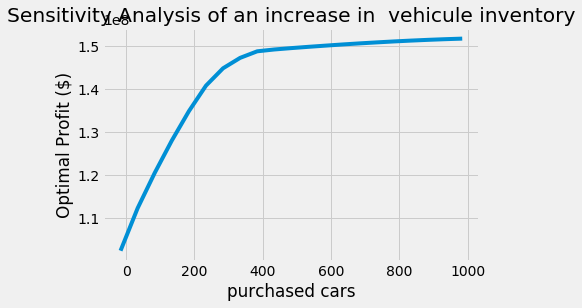

In [113]:
plots.plot(ev_increase, objs_sc)
plots.title('Sensitivity Analysis of an increase in  vehicule inventory')
plots.xlabel('purchased cars')
plots.ylabel('Optimal Profit ($)')

In [114]:
sensitivity_inventory(0)
no_change_value = 106901510.12

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.27567146e+08  2.69751802e+08  1.33e+03 3.64e-12  3.71e+06     0s
   1  -1.28492425e+09  4.61741279e+08  3.84e+02 5.39e+03  8.60e+05     0s
   2  -5.02928517e+08  4.02028246e+08  2.29e+01 9.53e+02  1.02e+05     0s
   3  -5.26753458e+07  2.4211141

In [115]:
sensitivity_inventory(-16)
minimum_feasible_value = 103433936.68

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.07s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.23562464e+08  2.69757227e+08  1.30e+03 3.64e-12  3.63e+06     0s
   1  -1.25309818e+09  4.57846183e+08  3.77e+02 5.40e+03  8.44e+05     0s
   2  -4.96363399e+08  3.98458721e+08  2.42e+01 9.61e+02  1.04e+05     0s
   3  -6.70478984e+07  2.4499749

In [116]:
sensitivity_inventory(350)
max_value = 147899398.09650716


Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 7e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   3.00690839e+08  2.69636059e+08  1.85e+03 3.64e-12  5.16e+06     0s
   1  -1.87460320e+09  5.34472523e+08  4.95e+02 5.47e+03  1.14e+06     0s
   2  -7.70963073e+08  4.60416215e+08  1.55e+01 8.36e+02  1.15e+05     0s
   3   7.31651628e+06  2.6768033

In [117]:
max_value - no_change_value

40997887.97650716

After testing the sensitivity of the profit by altering the vehicle inventory, we noticed two key insights. The first one is that our optimization would not be able to find a feasible solution for a decrease of more than 16 cars that are available for rental. This means that car2go will not be able to meet all of its daily constraint, more precisely its lower bound demand constraint, with less than 363 cars operating at all time. This is suboptimal as there is alot of room for risk. Car accidents or mechanic issues arrive frequently and it would be important to discuss with management if 16 cars  is enough to cover these risks. 

The second insight we can provide regarding the car inventory is as follow. Purchasing additional EV increases the optimal profit at a desirable rate until it flattens at the 350 cars mark.At this mark we are able to increase the overall annual profit by the nice sum of 40,997,888$. Considering the upper demand alternative in this case, the current number of vehicule will not capture the full amount of trips demanded by customers so there is room for increase profitability by making more cars available to customers. Now that it's clear that further investment in electronic vehicules is important the question remain what is the right amount. Management will have to assess capital budgeting capacity for this situation but it is worth noting that this specific variable is one variable which Car2Go can control and is aware of its outcome. Obviously it would no be a wise decision to purchase more that 350 cars at the current demand rate in order to avoid idle inventory and additional maintenance cost.

## b. Change in the total % of moving vehicules that will need to be charged at a given time. Initially we assumed the value to be 10%.

In [118]:
# this function takes as input the percentage change in the number of vehicules that will need to be repositioned as a function of the 
# number of trips to satisfy from any zipcode to anaother at a given time.
def sensitivity_battery(battery):
    model = Model('Car2go')

        # Decision Variables
    R = {} # number of EVs to reposition
    X = {} # number of customer trips satisfied
    W = {} # number of EVs available
    I = {} # number of EVs sent to charge
    O = {} # number of EVs released after fully charged
    C = {} # number of EVs/inventory in charging stations

    # number of EVs to reposition from one region to another
    # number of customer trips satisfied from one region to another
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                R[(i,j,t)] = model.addVar(lb = 0)
                X[(i,j,t)] = model.addVar(lb = 0)

    # number of EVs available in each region
    # at the beginning of each hour
    for i in np.arange(18):
        for t in np.arange(24):
            W[(i,t)] = model.addVar(lb = 0)

    # number of EVs sent from one region to charging stations to charge at any hour
    for i in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):
                I[(i,k,t)] = model.addVar(lb = 0)

    # number of EVs released from charging stations to another region at any hour            
    for j in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):            
                O[(k,j,t)] = model.addVar(lb = 0)

    # charging station inventory/number of EVs in each charging station
    # at the beginning of each hour
    for k in [3,7,18]:
        for t in np.arange(24):           
            C[(k,t)] = model.addVar(lb = 0)
            
    # constraints 

    # total number of EVs at any time constraint
    # EVs availabe plus EVs being charged in all charging stations should be the total number of EVs
    max_EV = {}
    for t in np.arange(24):
        max_EV[t] = model.addConstr(quicksum(W[(i,t)] for i in range(18)) + quicksum(C[(k,t)] for k in [3,7,18])
                                      == total_EV)


    
    # demand constraint 
    # be conservative by having +-30% bound
    demand_upper = {}
    demand_lower = {}
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                demand_upper[(i,j,t)] = model.addConstr(X[(i,j,t)] <= 1.3*avg_demand.get((i,j,t),0))
                demand_lower[(i,j,t)] = model.addConstr(X[(i,j,t)] >= 0.7*avg_demand.get((i,j,t),0))


    # charging station inventory constraint
    # number of EVs in each charging station should be the inventory from last period
    # plus the EVs sent to charge minus the EVs released after fully charged
    charging_inventory = {}
    for k in [3,7,18]:
        for t in np.arange(23):
            charging_inventory[(k,t+1)] = model.addConstr(C[(k,t+1)] == C[(k,t)] 
                                                          - quicksum(O[(k,j,t)] for j in range(18)) 
                                                          + quicksum(I[(i,k,t)] for i in range(18)) )

    # charging station inventory at midnight
    for k in [3,7,18]:
        charging_inventory[(k,0)] = model.addConstr(C[(k,0)] == C[(k,23)] 
                                                    - quicksum(O[(k,j,23)] for j in range(18)) 
                                                    + quicksum(I[(i,k,23)] for i in range(18)) )


    # availability of EVs constraint
    availability_EV = {}

    for i in np.arange(18):
        for t in np.arange(23):
            availability_EV[(i,t+1)] = model.addConstr(W[(i,t+1)] == W[(i,t)] 
                                                       - quicksum(X[(i,j,t)] for j in range(18)) 
                                                       + quicksum(X[(j,i,t)] for j in range(18))
                                                       - quicksum(R[(i,j,t)] for j in range(18))
                                                       + quicksum(R[(j,i,t)] for j in range(18))
                                                       - quicksum(I[(i,k,t)] for k in [3,7,18])
                                                       + quicksum(O[(k,i,t)] for k in [3,7,18]) )

    # available EVs at midnight
    for i in np.arange(18):
        availability_EV[(i,0)] = model.addConstr(W[(i,0)] == W[(i,23)] 
                                                 - quicksum(X[(i,j,23)] for j in range(18)) 
                                                 + quicksum(X[(j,i,23)] for j in range(18))
                                                 - quicksum(R[(i,j,23)] for j in range(18))
                                                 + quicksum(R[(j,i,23)] for j in range(18))
                                                 - quicksum(I[(i,k,23)] for k in [3,7,18])
                                                 + quicksum(O[(k,i,23)] for k in [3,7,18]) )

    # move 10% of EVs that customers drop off in any zip code to charging stations
    charging = {}
    for i in np.arange(18):
        for t in np.arange(24):
            charging[(i,t)] = model.addConstr(quicksum(I[(i,k,t)] for k in [3,7,18]) == 
                                              quicksum(X[(j,i,t)] for j in range(18))*(0.1*((1+(battery)/100))))


    # total EVs released constraint
    # the total EVs released should be equal to total EVs sent to charge four hours ago
    release = {}
    for k in [3,7,18]:
        for t in np.arange(20):
            release[(k,t)] = model.addConstr(quicksum(I[(i,k,t)] for i in range(18)) == 
                                             quicksum(O[(k,j,t+4)] for j in range(18)) )

    # for 8pm-11pm
    for k in [3,7,18]:
        release[(k,20)] = model.addConstr(quicksum(I[(i,k,20)] for i in range(18)) == 
                                          quicksum(O[(k,j,0)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,21)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,1)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,22)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,2)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,23)] = model.addConstr(quicksum(I[(i,k,23)] for i in range(18)) == 
                                          quicksum(O[(k,j,3)] for j in range(18)) )


            
    obj = 365 * (quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
    - quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min 
    - quicksum(I[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * labour_cost_per_min
    - quicksum(O[(k,j,t)]*duration_reposition.get((j,k,t),avg_time) for k in [3,7,18] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
    - quicksum(I[(i,k,t)] for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * cost_charging)
    - site_maintenance * 3
    - EV_maintenance * (total_EV)
    - depreciation
    # including the cost of purchasin a car2go which is coming from the average price of a smart car and then depreciated on a daily basis
        

    
    model.setObjective(obj, GRB.MAXIMIZE) 
    
    model.optimize()

    inv_change_model = model.ObjVal
    
    return inv_change_model


In [119]:
# calling the fucntion on the maximum increase feasible 
sensitivity_battery(4.65)

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.04s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.28966637e+08  2.69750206e+08  1.35e+03 3.64e-12  3.78e+06     0s
   1  -1.28573622e+09  4.64432725e+08  3.95e+02 5.27e+03  8.76e+05     0s
   2  -5.13976500e+08  4.03583119e+08  2.63e+01 9.44e+02  1.09e+05     0s
   3  -5.85243913e+07  2.4624399

101923039.60237245

In [120]:
# function that itterate through different possibilities of a change
scale_factor_sc_2 = np.arange(-9,5,0.25)
scale_factor_sc_2
objs_sc_2 = np.zeros(len(scale_factor_sc_2))

for i in np.arange(len(scale_factor_sc_2)):
    battery = scale_factor_sc_2[i]
    objs_sc_2[i] = sensitivity_battery(battery)

objs_sc_2

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [9e-02, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.06s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.24531543e+08  2.69755652e+08  1.28e+03 3.64e-12  3.57e+06     0s
   1  -1.26113243e+09  4.61531900e+08  3.70e+02 5.46e+03  8.49e+05     0s
   2  -4.31220124e+08  4.14508624e+08  2.68e+01 6.83e+02  1.02e+05     0s
   3  -4.25844370e+07  2.5043001

  22   1.13383324e+08  1.13383324e+08  2.52e-09 3.58e-10  1.54e-10     0s

Barrier solved model in 22 iterations and 0.21 seconds
Optimal objective 1.13383324e+08

Crossover log...

       0 DPushes remaining with DInf 9.8124815e-09                 0s

      57 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining with PInf 0.0000000e+00                 0s

  Push phase complete: Pinf 0.0000000e+00, Dinf 8.8557499e-09      0s

Iteration    Objective       Primal Inf.    Dual Inf.      Time
     104    1.1338332e+08   0.000000e+00   0.000000e+00      0s

Solved with barrier
Solved in 104 iterations and 0.26 seconds
Optimal objective  1.133833238e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [9e-02, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Pr

  14   1.12683921e+08  1.12728404e+08  1.24e-04 6.61e-03  2.88e+00     0s
  15   1.12700685e+08  1.12718634e+08  4.31e-05 2.58e-03  1.16e+00     0s
  16   1.12708215e+08  1.12713967e+08  9.87e-06 1.04e-03  3.70e-01     0s
  17   1.12710200e+08  1.12712286e+08  2.00e-06 4.72e-04  1.34e-01     0s
  18   1.12710709e+08  1.12710832e+08  4.97e-09 2.20e-05  7.83e-03     0s
  19   1.12710737e+08  1.12710758e+08  4.39e-09 4.99e-07  1.35e-03     0s
  20   1.12710746e+08  1.12710747e+08  4.99e-09 3.64e-10  7.60e-05     0s
  21   1.12710747e+08  1.12710747e+08  8.70e-09 3.42e-10  5.49e-08     0s
  22   1.12710747e+08  1.12710747e+08  6.16e-09 3.35e-10  2.78e-12     0s

Barrier solved model in 22 iterations and 0.23 seconds
Optimal objective 1.12710747e+08


Solved with dual simplex
Solved in 2551 iterations and 0.24 seconds
Optimal objective  1.127107467e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [9e-02, 1e+00]
  Objective ran

   8   1.07438402e+08  1.16763078e+08  4.40e-02 3.87e+00  6.14e+02     0s
   9   1.10027486e+08  1.13464655e+08  1.61e-02 9.19e-01  2.25e+02     0s
  10   1.11238937e+08  1.12659483e+08  5.76e-03 3.51e-01  9.27e+01     0s
  11   1.11735532e+08  1.12344353e+08  1.93e-03 1.62e-01  3.95e+01     0s
  12   1.11883675e+08  1.12170847e+08  9.53e-04 6.72e-02  1.86e+01     0s
  13   1.11969407e+08  1.12088071e+08  4.06e-04 2.22e-02  7.70e+00     0s
  14   1.12014304e+08  1.12058794e+08  1.40e-04 8.17e-03  2.88e+00     0s
  15   1.12035002e+08  1.12047349e+08  2.46e-05 2.78e-03  7.96e-01     0s
  16   1.12038445e+08  1.12043567e+08  6.14e-06 1.16e-03  3.29e-01     0s
  17   1.12039603e+08  1.12040171e+08  1.20e-06 3.39e-05  3.65e-02     0s
  18   1.12039925e+08  1.12039966e+08  8.26e-08 3.35e-10  2.65e-03     0s
  19   1.12039953e+08  1.12039954e+08  3.75e-08 3.64e-10  9.53e-06     0s
  20   1.12039954e+08  1.12039954e+08  1.99e-08 3.64e-10  1.55e-09     0s

Barrier solved model in 20 iterations

  11   1.11043617e+08  1.11621143e+08  1.86e-03 2.47e-01  3.76e+01     0s
  12   1.11174044e+08  1.11476757e+08  1.10e-03 1.01e-01  1.97e+01     0s
  13   1.11308861e+08  1.11404861e+08  3.23e-04 2.81e-02  6.24e+00     0s
  14   1.11348408e+08  1.11385192e+08  1.18e-04 9.96e-03  2.39e+00     0s
  15   1.11365147e+08  1.11377627e+08  3.19e-05 3.55e-03  8.07e-01     0s
  16   1.11368987e+08  1.11373724e+08  1.52e-05 6.28e-04  3.07e-01     0s
  17   1.11370415e+08  1.11373006e+08  9.10e-06 2.07e-04  1.68e-01     0s
  18   1.11372400e+08  1.11372595e+08  4.21e-07 1.15e-05  1.26e-02     0s
  19   1.11372542e+08  1.11372555e+08  2.47e-08 3.78e-10  8.15e-04     0s
  20   1.11372553e+08  1.11372553e+08  6.71e-08 3.86e-10  3.64e-05     0s
  21   1.11372553e+08  1.11372553e+08  2.39e-09 3.35e-10  1.87e-09     0s

Barrier solved model in 21 iterations and 0.20 seconds
Optimal objective 1.11372553e+08

Crossover log...

       0 DPushes remaining with DInf 7.5751814e-09                 0s

      5

   8   1.05358559e+08  1.15179457e+08  4.59e-02 6.36e+00  6.48e+02     0s
   9   1.08839152e+08  1.12662603e+08  1.27e-02 2.70e+00  2.50e+02     0s
  10   1.09782302e+08  1.11812583e+08  5.70e-03 1.47e+00  1.32e+02     0s
  11   1.10398582e+08  1.11112234e+08  1.59e-03 5.31e-01  4.63e+01     0s
  12   1.10562882e+08  1.10893148e+08  6.73e-04 2.25e-01  2.14e+01     0s
  13   1.10663014e+08  1.10758982e+08  1.75e-04 5.10e-02  6.20e+00     0s
  14   1.10691907e+08  1.10728552e+08  6.29e-05 1.82e-02  2.36e+00     0s
  15   1.10703075e+08  1.10717254e+08  2.51e-05 6.33e-03  9.14e-01     0s
  16   1.10705541e+08  1.10713265e+08  1.65e-05 2.15e-03  4.98e-01     0s
  17   1.10709756e+08  1.10711162e+08  3.30e-06 2.31e-04  9.06e-02     0s
  18   1.10710765e+08  1.10710886e+08  1.51e-07 8.53e-06  7.71e-03     0s
  19   1.10710832e+08  1.10710839e+08  6.69e-09 3.42e-10  4.08e-04     0s
  20   1.10710838e+08  1.10710838e+08  2.71e-08 3.64e-10  1.81e-05     0s
  21   1.10710838e+08  1.10710838e+08 

Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.26021479e+08  2.69753697e+08  1.30e+03 3.64e-12  3.64e+06     0s
   1  -1.27204930e+09  4.58741645e+08  3.77e+02 5.51e+03  8.50e+05     0s
   2  -4.89734496e+08  4.00707518e+08  1.99e+01 9.40e+02  9.66e+04     0s
   3  -6.59018969e+07  2.39496990e+08  4.58e+00 2.06e+02  2.55e+04     0s
   4   3.09402696e+07  1.89602821e+08  1.77e+00 1.14e+02  1.20e+04     0s
   5   6.91391734e+07  1.48764455e+08  7.86e-01 5.50e+01  5.70e+03     0s
   6   9.16337838e+07  1.28460774e+08  2.68e-01 2.86e+01  2.52e+03     0s
   7   9.97708670e+07  1.20024529e+08  1.25e-01 1.46e+01  1.36e+03     0s
   8   1.03885837e+08  1.15615023e+08  6.38e-02 7.85e+00  7.79e+02     0s
   9   1.07397167e+08  1.12981535e+08  2.34e-02 4.32e+00  3.68e+02     0s
  10   1.08434678e+08  1.11201985e+08  1.34e-02 1.78e+00  1.82e+02     0s
  11   1.09563795e+08  1.10439332e+08  3.47e-03 5.50e-01  5.73e+01     0s
  12   1.09818786e+08  1.10289415e+08 

   2  -4.91718181e+08  4.00959538e+08  2.03e+01 9.44e+02  9.75e+04     0s
   3  -5.68471991e+07  2.36961400e+08  4.31e+00 1.93e+02  2.44e+04     0s
   4   3.91955664e+07  1.81968920e+08  1.53e+00 1.02e+02  1.07e+04     0s
   5   7.73563692e+07  1.47100658e+08  5.51e-01 5.32e+01  4.89e+03     0s
   6   9.43701895e+07  1.24704762e+08  1.94e-01 2.30e+01  2.05e+03     0s
   7   1.00053431e+08  1.17363117e+08  1.05e-01 1.17e+01  1.16e+03     0s
   8   1.04438793e+08  1.13545066e+08  4.65e-02 5.83e+00  6.03e+02     0s
   9   1.07685980e+08  1.11013852e+08  1.27e-02 2.09e+00  2.18e+02     0s
  10   1.08671937e+08  1.10006777e+08  4.76e-03 7.20e-01  8.71e+01     0s
  11   1.09212756e+08  1.09733777e+08  9.46e-04 3.77e-01  3.37e+01     0s
  12   1.09321529e+08  1.09567536e+08  3.04e-04 1.88e-01  1.59e+01     0s
  13   1.09378512e+08  1.09442885e+08  5.96e-05 4.42e-02  4.15e+00     0s
  14   1.09389996e+08  1.09416968e+08  2.38e-05 1.71e-02  1.74e+00     0s
  15   1.09398478e+08  1.09402736e+08 


Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.26522810e+08  2.69753067e+08  1.31e+03 3.64e-12  3.66e+06     0s
   1  -1.27598842e+09  4.59719795e+08  3.80e+02 5.47e+03  8.54e+05     0s
   2  -4.93695054e+08  4.01197958e+08  2.07e+01 9.48e+02  9.83e+04     0s
   3  -6.24577765e+07  2.41425890e+08  4.56e+00 2.13e+02  2.55e+04     0s
   4   2.77629066e+07  1.87552055e+08  1.89e+00 1.12e+02  1.22e+04     0s
   5   6.76289156e+07  1.47629306e+08  8.21e-01 5.44e+01  5.75e+03     0s
   6   8.98243729e+07  1.26575030e+08  2.90e-01 2.76e+01  2.52e+03     0s
   7   9.81585287e+07  1.17979675e+08  1.38e-01 1.43e+01  1.34e+03     0s
   8   1.02476336e+08  1.13788392e+08  7.42e-02 7.84e+00  7.58e+02     0s
   9   1.062



Solved with dual simplex
Solved in 2469 iterations and 0.29 seconds
Optimal objective  1.083157732e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [7e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.26768836e+08  2.69752764e+08  1.32e+03 3.64e-12  3.67e+06     0s
   1  -1.27799972e+09  4.60198074e+08  3.81e+02 5.45e+03  8.55e+05     0s
 

  19   1.07670699e+08  1.07670716e+08  5.30e-10 9.86e-06  1.11e-03     0s
  20   1.07670702e+08  1.07670702e+08  4.68e-10 3.06e-10  8.47e-06     0s
  21   1.07670702e+08  1.07670702e+08  4.59e-10 3.20e-10  3.64e-11     0s

Barrier solved model in 21 iterations and 0.21 seconds
Optimal objective 1.07670702e+08

Crossover log...

       0 DPushes remaining with DInf 6.4925416e-09                 0s

      51 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining with PInf 0.0000000e+00                 0s

  Push phase complete: Pinf 0.0000000e+00, Dinf 7.4148829e-09      0s

Iteration    Objective       Primal Inf.    Dual Inf.      Time
     100    1.0767070e+08   0.000000e+00   0.000000e+00      0s

Solved with barrier
Solved in 100 iterations and 0.25 seconds
Optimal objective  1.076707021e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  

  16   1.07026816e+08  1.07034580e+08  8.59e-06 4.06e-03  4.99e-01     0s
  17   1.07029877e+08  1.07030750e+08  1.22e-06 1.87e-04  5.60e-02     0s
  18   1.07030458e+08  1.07030473e+08  5.23e-09 4.29e-10  9.90e-04     0s
  19   1.07030467e+08  1.07030467e+08  6.98e-10 3.78e-10  9.55e-06     0s
  20   1.07030467e+08  1.07030467e+08  4.07e-09 4.00e-10  7.32e-08     0s
  21   1.07030467e+08  1.07030467e+08  3.92e-07 3.46e-10  8.59e-12     0s

Barrier solved model in 21 iterations and 0.20 seconds
Optimal objective 1.07030467e+08

Crossover log...

       0 DPushes remaining with DInf 5.9750960e-09                 0s

      52 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining with PInf 0.0000000e+00                 0s

  Push phase complete: Pinf 0.0000000e+00, Dinf 5.1820166e-09      0s


Solved with dual simplex
Solved in 2325 iterations and 0.22 seconds
Optimal objective  1.070304671e+08
Optimize a model with 16584 rows, 18648 columns and 63288 non

  10   1.05191666e+08  1.07396555e+08  1.03e-02 1.51e+00  1.45e+02     0s
  11   1.05932263e+08  1.06835397e+08  3.50e-03 7.04e-01  5.93e+01     0s
  12   1.06171063e+08  1.06636457e+08  1.58e-03 3.80e-01  3.05e+01     0s
  13   1.06328784e+08  1.06467889e+08  3.68e-04 1.04e-01  9.06e+00     0s
  14   1.06361063e+08  1.06421851e+08  1.69e-04 3.70e-02  3.96e+00     0s
  15   1.06384742e+08  1.06403325e+08  3.59e-05 1.33e-02  1.21e+00     0s
  16   1.06389751e+08  1.06395950e+08  1.06e-05 3.95e-03  4.01e-01     0s
  17   1.06391903e+08  1.06393137e+08  1.13e-06 8.38e-04  7.96e-02     0s
  18   1.06392267e+08  1.06392323e+08  1.43e-08 3.47e-06  3.53e-03     0s
  19   1.06392296e+08  1.06392297e+08  1.74e-10 3.31e-10  4.68e-05     0s
  20   1.06392297e+08  1.06392297e+08  2.92e-10 3.67e-10  6.89e-11     0s

Barrier solved model in 20 iterations and 0.19 seconds
Optimal objective 1.06392297e+08

Crossover log...

       0 DPushes remaining with DInf 7.0087935e-09                 0s

      5

   7   9.54686863e+07  1.13954413e+08  1.42e-01 1.23e+01  1.26e+03     0s
   8   1.00072957e+08  1.10209663e+08  7.12e-02 6.31e+00  6.81e+02     0s
   9   1.04056684e+08  1.08018652e+08  1.33e-02 2.99e+00  2.60e+02     0s
  10   1.04886877e+08  1.06928999e+08  6.10e-03 1.59e+00  1.33e+02     0s
  11   1.05352317e+08  1.06201282e+08  2.46e-03 5.81e-01  5.53e+01     0s
  12   1.05549340e+08  1.05986738e+08  1.18e-03 3.02e-01  2.85e+01     0s
  13   1.05690906e+08  1.05835574e+08  3.08e-04 9.84e-02  9.39e+00     0s
  14   1.05724744e+08  1.05788765e+08  1.27e-04 4.03e-02  4.15e+00     0s
  15   1.05745608e+08  1.05760968e+08  2.20e-05 8.45e-03  9.91e-01     0s
  16   1.05749838e+08  1.05753763e+08  7.18e-06 1.28e-03  2.53e-01     0s
  17   1.05751933e+08  1.05752184e+08  5.27e-07 2.76e-10  1.61e-02     0s
  18   1.05752158e+08  1.05752161e+08  1.93e-08 4.00e-10  2.12e-04     0s

Barrier performed 18 iterations in 0.20 seconds
Barrier solve interrupted - model solved by another algorithm



   7   9.43195325e+07  1.13709915e+08  1.58e-01 1.24e+01  1.32e+03     0s
   8   9.91459026e+07  1.09283038e+08  7.62e-02 6.32e+00  6.84e+02     0s
   9   1.02558456e+08  1.07165228e+08  2.88e-02 3.14e+00  3.07e+02     0s
  10   1.03744138e+08  1.06158045e+08  1.46e-02 1.55e+00  1.61e+02     0s
  11   1.04648026e+08  1.05498495e+08  4.20e-03 5.21e-01  5.61e+01     0s
  12   1.04830523e+08  1.05347003e+08  2.44e-03 3.14e-01  3.40e+01     0s
  13   1.05016832e+08  1.05182139e+08  6.94e-04 8.22e-02  1.08e+01     0s
  14   1.05076386e+08  1.05142339e+08  2.40e-04 3.55e-02  4.31e+00     0s
  15   1.05095713e+08  1.05124230e+08  1.03e-04 1.44e-02  1.86e+00     0s
  16   1.05105704e+08  1.05115666e+08  3.03e-05 4.47e-03  6.49e-01     0s
  17   1.05109913e+08  1.05111424e+08  5.81e-06 2.92e-04  9.85e-02     0s
  18   1.05111008e+08  1.05111062e+08  1.24e-09 5.31e-06  3.42e-03     0s
  19   1.05111032e+08  1.05111034e+08  1.61e-09 3.86e-10  9.18e-05     0s
  20   1.05111033e+08  1.05111033e+08 

   4   1.81070488e+07  1.73540979e+08  2.30e+00 9.08e+01  1.22e+04     0s
   5   6.61620584e+07  1.42147507e+08  8.46e-01 4.82e+01  5.53e+03     0s
   6   8.72155641e+07  1.21604226e+08  2.96e-01 2.28e+01  2.38e+03     0s
   7   9.41285927e+07  1.13194226e+08  1.54e-01 1.22e+01  1.30e+03     0s
   8   9.89989036e+07  1.08649693e+08  7.28e-02 6.18e+00  6.52e+02     0s
   9   1.02952386e+08  1.06556895e+08  1.25e-02 2.90e+00  2.37e+02     0s
  10   1.03685913e+08  1.05563436e+08  5.74e-03 1.56e+00  1.23e+02     0s
  11   1.04185300e+08  1.04905859e+08  1.71e-03 6.22e-01  4.69e+01     0s
  12   1.04306184e+08  1.04656374e+08  9.15e-04 2.54e-01  2.28e+01     0s
  13   1.04422159e+08  1.04534243e+08  2.01e-04 8.71e-02  7.27e+00     0s
  14   1.04447173e+08  1.04499344e+08  7.10e-05 4.36e-02  3.38e+00     0s
  15   1.04460600e+08  1.04473667e+08  8.33e-06 1.12e-02  8.43e-01     0s
  16   1.04462721e+08  1.04465668e+08  2.07e-06 2.18e-03  1.90e-01     0s
  17   1.04463514e+08  1.04463756e+08 

   5   6.51354180e+07  1.41419294e+08  8.79e-01 4.73e+01  5.57e+03     0s
   6   8.59495717e+07  1.21689110e+08  3.21e-01 2.31e+01  2.49e+03     0s
   7   9.35574788e+07  1.13025408e+08  1.57e-01 1.26e+01  1.33e+03     0s
   8   9.83871210e+07  1.08076284e+08  7.36e-02 6.45e+00  6.55e+02     0s
   9   1.01530010e+08  1.05533950e+08  2.67e-02 2.51e+00  2.68e+02     0s
  10   1.02681142e+08  1.04678802e+08  1.24e-02 1.28e+00  1.33e+02     0s
  11   1.03435049e+08  1.04130724e+08  3.51e-03 4.40e-01  4.60e+01     0s
  12   1.03599144e+08  1.03941599e+08  1.92e-03 1.67e-01  2.27e+01     0s
  13   1.03731225e+08  1.03851340e+08  6.85e-04 4.58e-02  7.95e+00     0s
  14   1.03764953e+08  1.03834667e+08  3.96e-04 2.57e-02  4.61e+00     0s
  15   1.03787673e+08  1.03820877e+08  1.96e-04 8.82e-03  2.20e+00     0s
  16   1.03804703e+08  1.03816294e+08  5.68e-05 4.04e-03  7.63e-01     0s
  17   1.03809768e+08  1.03813318e+08  1.77e-05 9.79e-04  2.34e-01     0s
  18   1.03812229e+08  1.03812448e+08 


                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.28556598e+08  2.69750662e+08  1.35e+03 3.64e-12  3.76e+06     0s
   1  -1.29448624e+09  4.63632528e+08  3.86e+02 5.31e+03  8.63e+05     0s
   2  -5.12662179e+08  4.02516097e+08  2.52e+01 9.51e+02  1.07e+05     0s
   3  -5.69854879e+07  2.45287011e+08  4.95e+00 2.14e+02  2.60e+04     0s
   4   1.26707350e+07  1.73336362e+08  2.54e+00 9.01e+01  1.28e+04     0s
   5   6.44522092e+07  1.40683897e+08  9.01e-01 4.65e+01  5.59e+03     0s
   6   8.49808655e+07  1.21755598e+08  3.38e-01 2.35e+01  2.57e+03     0s
   7   9.32364431e+07  1.12891417e+08  1.54e-01 1.30e+01  1.34e+03     0s
   8   9.78546377e+07  1.07938129e+08  7.20e-02 6.18e+00  6.80e+02     0s
   9   1.01243398e+08  1.05770580e+08  1.95e-02 3.26e+00  2.99e+02     0s
  10   1.01999948e+08  1.04425074e+08  1.08e-02 1.62e+00  1.60e+02     0s
  11   1.02817686e+08  1.03646598e+08  2.32e-03 5.71e-01  5

   0   2.28777446e+08  2.69750415e+08  1.35e+03 3.64e-12  3.77e+06     0s
   1  -1.29084470e+09  4.64077992e+08  3.90e+02 5.29e+03  8.69e+05     0s
   2  -5.13278770e+08  4.03025702e+08  2.58e+01 9.47e+02  1.08e+05     0s
   3  -5.77959230e+07  2.45822278e+08  5.08e+00 2.12e+02  2.62e+04     0s
   4   8.78982826e+06  1.70129311e+08  2.72e+00 8.29e+01  1.30e+04     0s
   5   6.36183655e+07  1.39409695e+08  9.40e-01 4.34e+01  5.59e+03     0s
   6   8.40466577e+07  1.21904133e+08  3.63e-01 2.35e+01  2.66e+03     0s
   7   9.20945405e+07  1.12794344e+08  1.76e-01 1.29e+01  1.42e+03     0s
   8   9.66702377e+07  1.07300622e+08  8.72e-02 5.82e+00  7.23e+02     0s
   9   9.99805993e+07  1.04140276e+08  3.27e-02 2.05e+00  2.81e+02     0s
  10   1.01192619e+08  1.03326202e+08  1.61e-02 1.04e+00  1.43e+02     0s
  11   1.02145651e+08  1.02822930e+08  3.43e-03 3.50e-01  4.48e+01     0s
  12   1.02288276e+08  1.02636215e+08  1.99e-03 1.45e-01  2.31e+01     0s
  13   1.02432576e+08  1.02540077e+08 

  10   1.00356910e+08  1.03101780e+08  1.91e-02 1.49e+00  1.86e+02     0s
  11   1.00987502e+08  1.02245880e+08  1.04e-02 5.25e-01  9.23e+01     0s
  12   1.01122704e+08  1.01306647e+08  8.76e-03 3.13e-01  7.09e+01     0s
  13   1.01147749e+08 -9.18948443e+08  8.45e-03 9.77e-02  2.62e+02     0s
  14   1.01705963e+08  1.00683136e+08  2.16e-01 9.76e-02  2.69e+02     0s
  15   1.01786668e+08  9.94972156e+07  5.38e-02 7.78e-03  9.22e+00     0s
  16   1.01787338e+08 -2.48484686e+11  5.33e-02 3.69e-03  1.67e+04     0s
  17   2.98548686e+09  2.69750174e+08  2.10e+04 3.64e-12  5.81e+07     0s
  18   1.45680320e+09  2.73669467e+08  9.14e+03 6.39e+03  1.06e+07     0s
  19   4.20210489e+08  2.53428260e+08  1.40e+03 2.78e+03  1.44e+06     0s
  20   2.36869514e+08  2.02965502e+08  2.51e+02 3.39e-09  1.61e+05     0s

Barrier performed 20 iterations in 0.19 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 2426 iterations and 0.20 seconds
Infea

AttributeError: b"Unable to retrieve attribute 'ObjVal'"

Text(0, 0.5, 'Optimal Profit ($)')

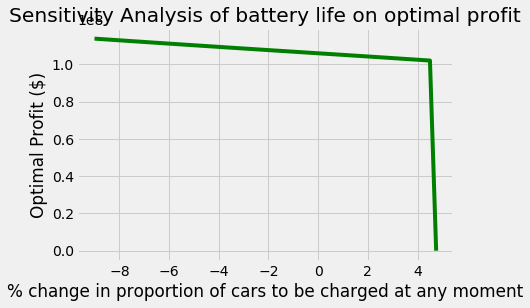

In [121]:
#plotting the result of all possibilities
plots.plot(scale_factor_sc_2, objs_sc_2, 'g')
plots.title('Sensitivity Analysis of battery life on optimal profit')
plots.xlabel('% change in proportion of cars to be charged at any moment')
plots.ylabel('Optimal Profit ($)')

Management, here is another interesting analysis. This time we are looking at the proportion of circulating cars that we will have to send to a charging station at any given time. Initially we assumed a 10% rate meaning that 10% of the vehicule in circulation will have to be taken to a charging station. But what if this rate is actually smaller, or perhaps larger ? If we decrease the proportion of cars to be send to charge we obviously have more cars available to meet demand and profit increases, no surprise here. What is interesting to note is what happens if the proportion of cars to charge increases. The optimal profit slightly decreases as less demand is satisfied to due decreasing available EV until we reach the 4.65% change and the optimal profit decreases drastically as there is no feasible solution or enough vehicule to meet the lower bound estimated demand. It is fair to allow a deviation from the 10% initially settled at a maximun of 14.25%, after which the daily constraints are no longer met and no solution is feasible. Therefore, it is important to manage the charging activities; possibilities can include but are not limited to upgrading the current battery life or monitoring the battery level of each vehicule and their importance in meeting future demand. 

## c. Change in expectation of the lower and upper bound of our demand estimate on an hourly basis

In [122]:
def sensitivity_demand(ub,lb):

        # Decision Variables
    R = {} # number of EVs to reposition
    X = {} # number of customer trips satisfied
    W = {} # number of EVs available
    I = {} # number of EVs sent to charge
    O = {} # number of EVs released after fully charged
    C = {} # number of EVs/inventory in charging stations

    model = Model('Car2go')

    # number of EVs to reposition from one region to another
    # number of customer trips satisfied from one region to another
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                R[(i,j,t)] = model.addVar(lb = 0)
                X[(i,j,t)] = model.addVar(lb = 0)

    # number of EVs available in each region
    # at the beginning of each hour
    for i in np.arange(18):
        for t in np.arange(24):
            W[(i,t)] = model.addVar(lb = 0)

    # number of EVs sent from one region to charging stations to charge at any hour
    for i in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):
                I[(i,k,t)] = model.addVar(lb = 0)

    # number of EVs released from charging stations to another region at any hour            
    for j in np.arange(18):
        for k in [3,7,18]:
            for t in np.arange(24):            
                O[(k,j,t)] = model.addVar(lb = 0)

    # charging station inventory/number of EVs in each charging station
    # at the beginning of each hour
    for k in [3,7,18]:
        for t in np.arange(24):           
            C[(k,t)] = model.addVar(lb = 0)
            
     # constraints 

    # total number of EVs at any time constraint
    # EVs availabe plus EVs being charged in all charging stations should be the total number of EVs
    max_EV = {}
    for t in np.arange(24):
        max_EV[t] = model.addConstr(quicksum(W[(i,t)] for i in range(18)) + quicksum(C[(k,t)] for k in [3,7,18])
                                      == total_EV)



    # demand constraint 
    # be conservative by having +-30% bound
    demand_upper = {}
    demand_lower = {}
    for i in np.arange(18):
        for j in np.arange(18):
            for t in np.arange(24):
                demand_upper[(i,j,t)] = model.addConstr(X[(i,j,t)] <= ub*avg_demand.get((i,j,t),0))
                demand_lower[(i,j,t)] = model.addConstr(X[(i,j,t)] >= lb*avg_demand.get((i,j,t),0))


    # charging station inventory constraint
    # number of EVs in each charging station should be the inventory from last period
    # plus the EVs sent to charge minus the EVs released after fully charged
    charging_inventory = {}
    for k in [3,7,18]:
        for t in np.arange(23):
            charging_inventory[(k,t+1)] = model.addConstr(C[(k,t+1)] == C[(k,t)] 
                                                          - quicksum(O[(k,j,t)] for j in range(18)) 
                                                          + quicksum(I[(i,k,t)] for i in range(18)) )

    # charging station inventory at midnight
    for k in [3,7,18]:
        charging_inventory[(k,0)] = model.addConstr(C[(k,0)] == C[(k,23)] 
                                                    - quicksum(O[(k,j,23)] for j in range(18)) 
                                                    + quicksum(I[(i,k,23)] for i in range(18)) )


    # availability of EVs constraint
    availability_EV = {}

    for i in np.arange(18):
        for t in np.arange(23):
            availability_EV[(i,t+1)] = model.addConstr(W[(i,t+1)] == W[(i,t)] 
                                                       - quicksum(X[(i,j,t)] for j in range(18)) 
                                                       + quicksum(X[(j,i,t)] for j in range(18))
                                                       - quicksum(R[(i,j,t)] for j in range(18))
                                                       + quicksum(R[(j,i,t)] for j in range(18))
                                                       - quicksum(I[(i,k,t)] for k in [3,7,18])
                                                       + quicksum(O[(k,i,t)] for k in [3,7,18]) )

    # available EVs at midnight
    for i in np.arange(18):
        availability_EV[(i,0)] = model.addConstr(W[(i,0)] == W[(i,23)] 
                                                 - quicksum(X[(i,j,23)] for j in range(18)) 
                                                 + quicksum(X[(j,i,23)] for j in range(18))
                                                 - quicksum(R[(i,j,23)] for j in range(18))
                                                 + quicksum(R[(j,i,23)] for j in range(18))
                                                 - quicksum(I[(i,k,23)] for k in [3,7,18])
                                                 + quicksum(O[(k,i,23)] for k in [3,7,18]) )

    # move 10% of EVs that customers drop off in any zip code to charging stations
    charging = {}
    for i in np.arange(18):
        for t in np.arange(24):
            charging[(i,t)] = model.addConstr(quicksum(I[(i,k,t)] for k in [3,7,18]) == 
                                              quicksum(X[(j,i,t)] for j in range(18))*0.1)


    # total EVs released constraint
    # the total EVs released should be equal to total EVs sent to charge four hours ago
    release = {}
    for k in [3,7,18]:
        for t in np.arange(20):
            release[(k,t)] = model.addConstr(quicksum(I[(i,k,t)] for i in range(18)) == 
                                             quicksum(O[(k,j,t+4)] for j in range(18)) )

    # for 8pm-11pm
    for k in [3,7,18]:
        release[(k,20)] = model.addConstr(quicksum(I[(i,k,20)] for i in range(18)) == 
                                          quicksum(O[(k,j,0)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,21)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,1)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,22)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                          quicksum(O[(k,j,2)] for j in range(18)) )
    for k in [3,7,18]:
        release[(k,23)] = model.addConstr(quicksum(I[(i,k,23)] for i in range(18)) == 
                                          quicksum(O[(k,j,3)] for j in range(18)) )   

    obj = 365 * (quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
    - quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min 
    - quicksum(I[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * labour_cost_per_min
    - quicksum(O[(k,j,t)]*duration_reposition.get((j,k,t),avg_time) for k in [3,7,18] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
    - quicksum(I[(i,k,t)] for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * cost_charging)
    - site_maintenance * 3
    - EV_maintenance * total_EV
    - depreciation

    
    model.setObjective(obj, GRB.MAXIMIZE) 
    
    model.optimize()

    inv_change_model = model.ObjVal
    
    return inv_change_model

In [123]:
demand_sensitivity_result = {}
for i in [1,1.1,1.2,1.3,1.5,1.8]:
    for j in [0.6,0.7,0.8,0.9,1]:
        try:           
            demand_sensitivity_result[(i,j)] = sensitivity_demand(i,j)
        except AttributeError as error:
            demand_sensitivity_result[(i,j)] = 0

Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 4e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.83087707e+08  2.01156927e+08  1.20e+03 3.64e-12  3.32e+06     0s
   1  -1.07263024e+09  3.72855349e+08  4.09e+02 7.58e+03  9.32e+05     0s
   2  -5.10359496e+08  3.42453854e+08  2.88e+01 1.16e+03  1.12e+05     0s
   3  -8.29241706e+07  1.8872249

 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.04485694e+08  2.30768163e+08  1.23e+03 3.64e-12  3.42e+06     0s
   1  -1.21836982e+09  4.06508922e+08  3.36e+02 8.14e+03  8.41e+05     0s
   2  -6.62207259e+08  3.71099116e+08  3.16e+01 1.20e+03  1.31e+05     0s
   3  -1.10678149e+08  2.14079841e+08  5.83e+00 1.45e+02  2.82e+04     0s
   4   4.20842847e+07  1.50574227e+08  1.16e+00 4.68e+01  7.98e+03     0s
   5   6.48098616e+07  1.25457513e+08  6.26e-01 2.35e+01  4.29e+03     0s
   6   7.72043687e+07  1.13926807e+08  3.74e-01 1.38e+01  2.55e+03     0s
   7   8.83605474e+07  1.07165265e+08  1.72e-01 7.02e+00  1.28e+03     0s
   8   9.39135984e+07  1.03789264e+08  8.33e-02 3.71e+00  6.64e+02     0s
   9   9.76710089e+07  1.01160186e+08  2.69e-02 1.02e+00  2.32e+02     0s
  10   9.87837944e+07  1.00605029e+08  1.32e-02 5.53e-01  1.21e+02     0s
  11   9.95388697e+07  1.00245937e+08  4.15

   4  -1.98626164e+08  1.27737825e+08  1.02e+01 1.14e+02  3.80e+04     0s
   5  -1.73849402e+08 -1.20905738e+08  9.33e+00 9.29e+01  3.53e+04     0s
   6  -1.53255967e+08 -5.37485279e+09  8.63e+00 6.42e+01  3.76e+04     0s
   7  -1.48345261e+08 -6.97196178e+12  8.47e+00 1.93e+01  9.21e+05     0s

Barrier performed 7 iterations in 0.12 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 1129 iterations and 0.13 seconds
Infeasible or unbounded model
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 4e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Fa

  RHS range        [1e+00, 4e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.08s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.27802846e+08  1.90561788e+08  1.43e+03 3.64e-12  3.97e+06     0s
   1  -1.40920372e+09  3.95839116e+08  4.03e+02 6.41e+03  9.48e+05     0s
   2  -5.62107890e+08  3.49284579e+08  3.29e+01 9.01e+02  1.21e+05     0s
   3  -1.64065208e+08  2.19241049e+08  1.17e+01 1.95e+02  4.18e+04     0s
   4  -1.36465596e+08  7.07478220e+07  1.04e+01 1.26e+02  3.65e+04     0s
   5  -9.19418148e+07 -4.05632048e+08  8.43e+00 8.43e+01  2.89e+04     0s

Ba

  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [9e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.05s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.42608152e+08  2.36453575e+08  1.41e+03 3.64e-12  3.92e+06     0s
   1  -1.35678065e+09  4.37726390e+08  4.09e+02 5.34e+03  9.11e+05     0s
   2  -4.64906274e+08  3.82987841e+08  2.77e+01 8.90e+02  1.06e+05     0s
   3  -9.53993679e+07  2.46360029e+08  8.24e+00 2.50e+02  3.36e+04     0s
   4  -7.61864841e+07  1.94150224e+08  7.36e+00 1.51e+02  2.71e+04     0s
   5  -3.

Optimal objective 1.13034378e+08

Crossover log...

       0 DPushes remaining with DInf 7.6563538e-09                 0s

      53 PPushes remaining with PInf 0.0000000e+00                 0s
       0 PPushes remaining with PInf 0.0000000e+00                 0s

  Push phase complete: Pinf 0.0000000e+00, Dinf 6.6625034e-09      0s

Iteration    Objective       Primal Inf.    Dual Inf.      Time
     104    1.1303438e+08   0.000000e+00   0.000000e+00      0s

Solved with barrier
Solved in 104 iterations and 0.31 seconds
Optimal objective  1.130343777e+08
Optimize a model with 16584 rows, 18648 columns and 63288 nonzeros
Coefficient statistics:
  Matrix range     [1e-01, 1e+00]
  Objective range  [5e+02, 6e+03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [8e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.06s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time:


Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15640 rows and 5625 columns
Presolve time: 0.11s
Presolved: 944 rows, 13023 columns, 31644 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 1.309e+04
 Factor NZ  : 4.636e+04 (roughly 6 MBytes of memory)
 Factor Ops : 2.614e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.19300909e+08  3.98304379e+08  1.46e+03 3.64e-12  4.11e+06     0s
   1  -1.38739671e+09  6.28927794e+08  4.91e+02 4.59e+03  1.06e+06     0s
   2  -3.91243798e+08  5.56312641e+08  3.62e+01 1.13e+03  1.29e+05     0s
   3  -4.91368894e+07  3.43615892e+08  8.00e+00 2.53e+02  3.63e+04     0s
   4   4.59861496e+07  1.97270918e+08  2.95e+00 5.99e+01  1.23e+04     0s
   5   8.98306855e+07  1.62776227e+08  9.98e-01 3.10e+01  5.38e+03     0s
   6   1.03767287e+08  1.43684350e+08

   2  -4.17869670e+08  5.33842220e+08  3.89e+01 1.07e+03  1.34e+05     0s
   3  -8.93564224e+07  3.41960775e+08  1.15e+01 2.94e+02  4.48e+04     0s
   4  -5.14211456e+07  2.20830585e+08  9.12e+00 1.14e+02  2.96e+04     0s
   5  -6.41172243e+06  1.18778877e+08  6.50e+00 4.29e+01  1.87e+04     0s
   6   1.27736882e+07  1.21460665e+07  5.49e+00 3.09e+01  1.49e+04     0s
   7   1.70384076e+07 -7.08789338e+09  5.29e+00 2.14e+01  2.27e+04     0s

Barrier performed 7 iterations in 0.12 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 1105 iterations and 0.13 seconds
Infeasible or unbounded model


In [124]:
to_graph = {}
for i in [1,1.1,1.2,1.3,1.5,1.8] :
    for j in [0.6,0.7,0.8,0.9,1]:    
        print("upper bound ", i,"lower bound", j, "profit: ", demand_sensitivity_result[(i,j)]) 
        if demand_sensitivity_result[(i,j)] !=0:
            to_graph[i] = demand_sensitivity_result[(i,j)]

upper bound  1 lower bound 0.6 profit:  95705006.15550365
upper bound  1 lower bound 0.7 profit:  0
upper bound  1 lower bound 0.8 profit:  0
upper bound  1 lower bound 0.9 profit:  0
upper bound  1 lower bound 1 profit:  0
upper bound  1.1 lower bound 0.6 profit:  99964407.35058261
upper bound  1.1 lower bound 0.7 profit:  0
upper bound  1.1 lower bound 0.8 profit:  0
upper bound  1.1 lower bound 0.9 profit:  0
upper bound  1.1 lower bound 1 profit:  0
upper bound  1.2 lower bound 0.6 profit:  103931143.94088194
upper bound  1.2 lower bound 0.7 profit:  102208886.84949414
upper bound  1.2 lower bound 0.8 profit:  0
upper bound  1.2 lower bound 0.9 profit:  0
upper bound  1.2 lower bound 1 profit:  0
upper bound  1.3 lower bound 0.6 profit:  107611149.74739225
upper bound  1.3 lower bound 0.7 profit:  105965506.53583534
upper bound  1.3 lower bound 0.8 profit:  0
upper bound  1.3 lower bound 0.9 profit:  0
upper bound  1.3 lower bound 1 profit:  0
upper bound  1.5 lower bound 0.6 profi

In [125]:
table_d = pd.Series(demand_sensitivity_result).rename_axis(['Upper Bound','Lower Bound']).reset_index(name='Profit')
table_d[table_d['Upper Bound']==1.0]
table_d[table_d['Profit']==table_d['Profit'].max()]


,Upper Bound,Lower Bound,Profit
25,1.8,0.6,1.238346e+08


This sensitivity analysis studies the impact of modifying the upper and lower bound of the demand satisfied on the profit. In our inital model, the upper bound was set to 1.3 and the lower bound to 0.7 as it seemed a reasonable estimation of how much the demand could vary from the estimated demand. However, the demand estimated is based on only one month of data and this demand could vary depending on the months.
Hence, we wanted to get insights on how the profit would be impact if Car2Go faced an increase or a decrease in the demand, keeping all other parameters unchanged. 
We analysed the impact with different combination of upper and lower bound (between 0.6 and 1.8) and when the combination was unfeasible, the profit was set to 0.

The first thing to note from the above results is that the optimal profit is achieved with the widest range, when the upper bound is set to 1.8 and the lower bound is set to 0.6. The profit is $\$123,834,588.43$ instead of $\$105,965,506.53$ in the original model. This shows that with a larger range, the model can adapt more effectively to changes in the demand and has more freedom to find the optimal profit.
We also note that, as we increase the lower bound above 0.7, the model becomes unfeasible. This suggests that if we force the model to satisfy a larger demand, the model won't find a solution given the current parameters and constraints. 

From this sensitivity, we can conclude that Car2Go should consider adjusting the proportion of demand satisfied from two zipcodes at a given time to a larger range. This would allow the model to adjust more effectively to the change in the daily demand and increase the optimal profit.  



# 5. Model Extensions

Instead of having fixed cost of maintenance cost, we added that 1% of EVs that customers drop off in any zip code to zip code 92113, 92123 to repair within the same period and it takes 6 hours to repair an EV before it can be released. We also assume that there is no capacity limitation for repairing station.

In [126]:
# Parameters

# average wage per minute in San Diego
labour_cost_per_min = 18/60
# total EVs estimated from dataset
total_EV = total_EV
# average travel time in total (use it when no data to reposition from i to j)
avg_time = trips['travel.times'].median()
# cost of charging a car, estimated at $2.64 full charge
cost_charging = 2.64
# cost of maintaining charging site per year
site_maintenance = 500
# cost of repairing an EV each time
cost_repairing = 100

In [127]:
# Decision Variables
R = {} # number of EVs to reposition
X = {} # number of customer trips satisfied
W = {} # number of EVs available
I = {} # number of EVs sent to charge
O = {} # number of EVs released after fully charged
C = {} # number of EVs/inventory in charging stations
E = {} # number of EVs sent to repair
L = {} # number of EVs released after repair
F = {} # number of EVs/inventory in repairing stations

model = Model('Car2go')

# number of EVs to reposition from one region to another
# number of customer trips satisfied from one region to another
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            R[(i,j,t)] = model.addVar(lb = 0)
            X[(i,j,t)] = model.addVar(lb = 0)

# number of EVs available in each region
# at the beginning of each hour
for i in np.arange(18):
    for t in np.arange(24):
        W[(i,t)] = model.addVar(lb = 0)

# number of EVs sent from one region to charging stations to charge at any hour
for i in np.arange(18):
    for k in [3,7,18]:
        for t in np.arange(24):
            I[(i,k,t)] = model.addVar(lb = 0)

# number of EVs released from charging stations to another region at any hour            
for j in np.arange(18):
    for k in [3,7,18]:
        for t in np.arange(24):            
            O[(k,j,t)] = model.addVar(lb = 0)
            
# charging station inventory/number of EVs in each charging station
# at the beginning of each hour
for k in [3,7,18]:
    for t in np.arange(24):           
        C[(k,t)] = model.addVar(lb = 0)

        
# number of EVs sent from one region to repairing stations at any hour
for i in np.arange(18):
    for k in [16,17]:
        for t in np.arange(24):
            E[(i,k,t)] = model.addVar(lb = 0)

# number of EVs released from repairing stations to another region at any hour            
for j in np.arange(18):
    for k in [16,17]:
        for t in np.arange(24):            
            L[(k,j,t)] = model.addVar(lb = 0)
            
# reparing station inventory/number of EVs in each repairing station
# at the beginning of each hour
for k in [16,17]:
    for t in np.arange(24):           
        F[(k,t)] = model.addVar(lb = 0)

In [128]:
# constraints 


# total number of EVs at any time constraint
# EVs availabe plus EVs being charged in all charging stations should be the total number of EVs
max_EV = {}
for t in np.arange(24):
    max_EV[t] = model.addConstr(quicksum(W[(i,t)] for i in range(18)) + quicksum(C[(k,t)] for k in [3,7,18])
                                + quicksum(F[(k,t)] for k in [16,17])
                                == total_EV)


    
# demand constraint 
# be conservative by having +-30% bound
demand_upper = {}
demand_lower = {}
for i in np.arange(18):
    for j in np.arange(18):
        for t in np.arange(24):
            demand_upper[(i,j,t)] = model.addConstr(X[(i,j,t)] <= 1.4*avg_demand.get((i,j,t),0))
            demand_lower[(i,j,t)] = model.addConstr(X[(i,j,t)] >= 0.6*avg_demand.get((i,j,t),0))
            


# charging station inventory constraint
# number of EVs in each charging station should be the inventory from last period
# plus the EVs sent to charge minus the EVs released after fully charged
charging_inventory = {}
for k in [3,7,18]:
    for t in np.arange(23):
        charging_inventory[(k,t+1)] = model.addConstr(C[(k,t+1)] == C[(k,t)] 
                                                    - quicksum(O[(k,j,t)] for j in range(18)) 
                                                    + quicksum(I[(i,k,t)] for i in range(18)) )

# charging station inventory at midnight
for k in [3,7,18]:
    charging_inventory[(k,0)] = model.addConstr(C[(k,0)] == C[(k,23)] 
                                                - quicksum(O[(k,j,23)] for j in range(18)) 
                                                + quicksum(I[(i,k,23)] for i in range(18)) )

# repairing station inventory constraint
repair_inventory = {}
for k in [16,17]:
    for t in np.arange(23):
        repair_inventory[(k,t+1)] = model.addConstr(F[(k,t+1)] == F[(k,t)] 
                                                    - quicksum(L[(k,j,t)] for j in range(18)) 
                                                    + quicksum(E[(i,k,t)] for i in range(18)) )

# charging station inventory at midnight
for k in [16,17]:
    repair_inventory[(k,0)] = model.addConstr(F[(k,0)] == F[(k,23)] 
                                              - quicksum(L[(k,j,23)] for j in range(18)) 
                                              + quicksum(E[(i,k,23)] for i in range(18)) )

    
# availability of EVs constraint
availability_EV = {}

for i in np.arange(18):
    for t in np.arange(23):
        availability_EV[(i,t+1)] = model.addConstr(W[(i,t+1)] == W[(i,t)] 
                                                   - quicksum(X[(i,j,t)] for j in range(18)) 
                                                   + quicksum(X[(j,i,t)] for j in range(18))
                                                   - quicksum(R[(i,j,t)] for j in range(18))
                                                   + quicksum(R[(j,i,t)] for j in range(18))
                                                   - quicksum(I[(i,k,t)] for k in [3,7,18])
                                                   + quicksum(O[(k,i,t)] for k in [3,7,18])
                                                   - quicksum(E[(i,k,t)] for k in [16,17])
                                                   + quicksum(L[(k,i,t)] for k in [16,17])
                                                  )

# available EVs at midnight
for i in np.arange(18):
    availability_EV[(i,0)] = model.addConstr(W[(i,0)] == W[(i,23)] 
                                             - quicksum(X[(i,j,23)] for j in range(18)) 
                                             + quicksum(X[(j,i,23)] for j in range(18))
                                             - quicksum(R[(i,j,23)] for j in range(18))
                                             + quicksum(R[(j,i,23)] for j in range(18))
                                             - quicksum(I[(i,k,23)] for k in [3,7,18])
                                             + quicksum(O[(k,i,23)] for k in [3,7,18])
                                             - quicksum(E[(i,k,23)] for k in [16,17])
                                             + quicksum(L[(k,i,23)] for k in [16,17]))


# move 1% of EVs that customers drop off in any zip code to repairing stations
repairing = {}
for i in np.arange(18):
    for t in np.arange(24):
        repairing[(i,t)] = model.addConstr(quicksum(E[(i,k,t)] for k in [16,17]) == 
                                           quicksum(X[(j,i,t)] for j in range(18))*0.01) 
        
# move 10% of EVs that customers drop off in any zip code to charging stations
charging = {}
for i in np.arange(18):
    for t in np.arange(24):
        charging[(i,t)] = model.addConstr(quicksum(I[(i,k,t)] for k in [3,7,18]) == 
                                          quicksum(X[(j,i,t)] for j in range(18))*0.1)


# total EVs released constraint
# the total EVs released should be equal to total EVs sent to charge four hours ago
release = {}
for k in [3,7,18]:
    for t in np.arange(20):
        release[(k,t)] = model.addConstr(quicksum(I[(i,k,t)] for i in range(18)) == 
                                         quicksum(O[(k,j,t+4)] for j in range(18)) )

# for 8pm-11pm
for k in [3,7,18]:
    release[(k,20)] = model.addConstr(quicksum(I[(i,k,20)] for i in range(18)) == 
                                      quicksum(O[(k,j,0)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,21)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                      quicksum(O[(k,j,1)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,22)] = model.addConstr(quicksum(I[(i,k,21)] for i in range(18)) == 
                                      quicksum(O[(k,j,2)] for j in range(18)) )
for k in [3,7,18]:
    release[(k,23)] = model.addConstr(quicksum(I[(i,k,23)] for i in range(18)) == 
                                      quicksum(O[(k,j,3)] for j in range(18)) )
    


# total EVs released from repairing station constraint
# the total EVs released should be equal to total EVs sent to charge six hours ago
release_repair = {}
for k in [16,17]:
    for t in np.arange(18):
        release_repair[(k,t)] = model.addConstr(quicksum(E[(i,k,t)] for i in range(18)) == 
                                                quicksum(L[(k,j,t+6)] for j in range(18)) )

# for 6pm-11pm
for k in [16,17]:
    release_repair[(k,18)] = model.addConstr(quicksum(E[(i,k,18)] for i in range(18)) == 
                                             quicksum(L[(k,j,0)] for j in range(18)) )
for k in [16,17]:
    release_repair[(k,19)] = model.addConstr(quicksum(E[(i,k,19)] for i in range(18)) == 
                                             quicksum(L[(k,j,1)] for j in range(18)) )
for k in [16,17]:
    release_repair[(k,20)] = model.addConstr(quicksum(E[(i,k,20)] for i in range(18)) == 
                                             quicksum(L[(k,j,2)] for j in range(18)) )
for k in [16,17]:
    release_repair[(k,21)] = model.addConstr(quicksum(E[(i,k,21)] for i in range(18)) == 
                                             quicksum(L[(k,j,3)] for j in range(18)) )
for k in [16,17]:
    release_repair[(k,22)] = model.addConstr(quicksum(E[(i,k,22)] for i in range(18)) == 
                                             quicksum(L[(k,j,4)] for j in range(18)) )
for k in [16,17]:
    release_repair[(k,23)] = model.addConstr(quicksum(E[(i,k,23)] for i in range(18)) == 
                                             quicksum(L[(k,j,5)] for j in range(18)) )


    
    

In [129]:
# objective function
# number of trips satisfied times the price paid adjusted to average travel times from each i to j at each h
# number of repositioning times the average travel times from each i to j at each h then times wage per minute
# number of sending EVs from each i to charging station and releasing them to each j at each h times wage per minute
# number of sending EVs from each i to charging station at each h times the cost of full charging
# EV charging station maintenance
# EV maintenance
obj = 365 * (quicksum(X[(i,j,t)]*price.get((i,j,t),0) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24))
- quicksum(R[(i,j,t)]*duration_reposition.get((i,j,t),avg_time) for i in np.arange(18) for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min 
- quicksum(I[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * labour_cost_per_min
- quicksum(O[(k,j,t)]*duration_reposition.get((j,k,t),avg_time) for k in [3,7,18] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
- quicksum(I[(i,k,t)] for i in np.arange(18) for k in [3,7,18] for t in np.arange(24)) * cost_charging
- quicksum(E[(i,k,t)]*duration_reposition.get((i,k,t),avg_time) for i in np.arange(18) for k in [16,17] for t in np.arange(24)) * labour_cost_per_min
- quicksum(L[(k,j,t)]*duration_reposition.get((k,j,t),avg_time) for k in [16,17] for j in np.arange(18) for t in np.arange(24)) * labour_cost_per_min
- quicksum(E[(i,k,t)] for i in np.arange(18) for k in [16,17] for t in np.arange(24)) * cost_repairing)
- site_maintenance * 3



model.setObjective(obj, GRB.MAXIMIZE)  

In [130]:
model.optimize()

Optimize a model with 17112 rows, 20424 columns and 77256 nonzeros
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [5e+02, 4e+04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [6e-01, 5e+02]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15706 rows and 5782 columns
Presolve time: 0.06s
Presolved: 1406 rows, 14642 columns, 39477 nonzeros

Ordering time: 0.00s

Barrier statistics:
 AA' NZ     : 2.032e+04
 Factor NZ  : 6.728e+04 (roughly 7 MBytes of memory)
 Factor Ops : 4.813e+06 (less than 1 second per iteration)
 Threads    : 3

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0  -1.79227913e+09  3.09878709e+08  1.45e+03 3.64e-12  3.78e+06     0s
   1  -1.92514249e+09  7.45375321e+08  4.74e+02 8.24e+02  8.85e+05     0s
   2  -5.68465924e+08  5.03970569e+08  1.21e+02 9.95e+01  2.33e+05     0s
   3  -4.37004531e+07  3.317567

In [131]:
base_model = model.ObjVal
print("The optimal solution will result in a profit of:", "$", base_model) 

The optimal solution will result in a profit of: $ 93664951.06781392


#### Insights:

When we make the maintenance/repair cost of EVs variable instead of just giving it a number, the optimal profit decreases. This model is more realistic as it considers the repairing stations and take the labour cost of moving EVs to these repairing stations into account.
Other than this model, there are several interesting thoughts we have on how to modify our model to tackle other problems. Instead of having 10% of EVs dropped off sent to charge, the distance left that can be driven for each EV can be monitored. When the distance left available to drive is lower than certain amount, the EV needs to be sent to the charging station. This model would be more complicated since we need to monitor each EV and have the information on the distance customers travelled. But it would be interesting since it's more realistic than the previous models.

# 6. Conclusion

**General conclusions from model, sensitivity analyses and managerial implications**

In conclusion, given all the assumptions, parameters and constraints associated with fixed and variable costs, EV availability, level of demand and location choice,  the maximum computed profit realizable of car2go San Diego is 160,261,141.6 dollarswithout taking the issue of charging stations into account. With the constraint of public chargers, the company then generates an optimal profit of 106,901,510.1 dollars. Even though the company is still generating a profit, the growth seems to be stagnant due to a high level of uncertainties arises from resource scarcity, demand fluctuations and EV allocation complexities. 

Different sensitivity analyses were conducted to compute the maximum profit attainable under each scenario. In the first sensitivity analysis, we test the sensitivity of the overall profit to a change in the amount of cars available. After increasing the inventory of smart cars by 50, the sensitivity model gave us an optimal profit of 139,467,120.66 dollars. This is equivalent to a 13.0% decrease. As a result, we suggest the management of car2go to increase the efficiency of EV reposition rather than purchasing too many new cars. Because even if we only purchase smart cars as new car, each car still costs $17000, which is a cost that’s hard to be compensated by car2go’s current uncertain demand.

Our second sensitivity analysis presents a change in the total % of moving vehicles that will need to be charged at a given time. Initially we set the value to be 10%. After increasing the inventory of smart cars, the sensitivity model gave us an optimal profit of 138,273,218.3 dollars. This is equivalent to a 13.7% decrease. Therefore, it is evident that car2go management needs to alternate the charging process of all vehicles more efficiently because this factor is directly associated with the company’s ability of satisfying customer demand at all given time. 

As for the third sensitivity analysis, we analyze demand sensitivity by changing our expectation of the lower and upper bound of our demand estimate on an hourly basis. For example, demand throughout the week might fluctuates by +10% or -10%. Since demand is directly associated to car2go’s business profit, we should always implement more marketing and operational strategies to secure the current demand while expanding our future demand by increasing customer base and customer travel frequencies. Furthermore, we recommend car2go to alternate other factors associated to profit at the mean time such as increase demand by using promotional and marketing strategies, or decrease costs by ultalize its EVs and employees more efficiently.


**Limitation of model and future work**

There is a limitation of our model with respect to the parking fee. Our models does not take parking fee into account since we do not have any information related to it. However the parking fee is actually a main cost for Car2go, as well as a main competitive advantage it has, compared to other car sharing companies. As we known, Car2go do not charge their customers for parking, and they allow customers to park anywhere legally, which increases its convenience level and thus improve the customers’ user experience. However, instead of costing money on building Car2go’s own parking lots in their service region like other companies Hertz and Enterprise, Car2go does need to pay the parking fee for their customers to the government. Accordingly, it will be more insightful if our model can compare the cost between building up own parking lots and continue paying the parking fee for customers, and to see how these two ways have different impacts on customer’s demand.